<a href="https://colab.research.google.com/github/juanserrano90/sophieML/blob/main/sophieML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.__version__

'1.25.2'

In [ ]:
!cp drive/MyDrive/Tesis/utils.py .
!cp drive/MyDrive/Tesis/add_feature2.py .

In [ ]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]
        print(len(df))
    return df

# **HD 185144 (K0V)**



## Lectura de datos de observaciones

In [ ]:
columnas_ccf = ['file_ccf','target','ccf_rv','ccf_fwhm','ccf_contrast','ccf_span','berv','cal_ext_sn0','cal_ext_sn1','cal_ext_sn2','cal_ext_sn3','cal_ext_sn4','cal_ext_sn5','cal_ext_sn6','cal_ext_sn7','cal_ext_sn8','cal_ext_sn9','cal_ext_sn10','cal_ext_sn11','cal_ext_sn12','cal_ext_sn13','cal_ext_sn14','cal_ext_sn15','cal_ext_sn16','cal_ext_sn17','cal_ext_sn18','cal_ext_sn19','cal_ext_sn20','cal_ext_sn21','cal_ext_sn22','cal_ext_sn23','cal_ext_sn24','cal_ext_sn25','cal_ext_sn26','cal_ext_sn27','cal_ext_sn28','cal_ext_sn29','cal_ext_sn30','cal_ext_sn31','cal_ext_sn32','cal_ext_sn33','cal_ext_sn34','cal_ext_sn35','cal_ext_sn36','cal_ext_sn37','cal_ext_sn38','date_start','bjd']
columnas_e2ds = ['file_e2ds','target','modo','shutter_time','ins_adcang','ins_adcnum','temp1_min','temp1_max','temp3_min','temp3_max','pres1_min','pres1_max','pres2_min','pres2_max','date_start','date_end','targ_radvel','airm_end','airm_start','tel_alt','guid_seeing','guid_sky_level','guid_alpha','guid_alpha_rms','guid_delta','guid_delta_rms','senti_text','senti_humi','senti_seeing','senti_tciel','senti_mag','bjd','targ_alpha','targ_delta','drift_rv','drift_nbcosmic','drift_rflux']

ccf = pd.read_table('drive/MyDrive/Tesis/dataset_ccf.dat', sep='\s+', names=columnas_ccf)
e2ds = pd.read_table('drive/MyDrive/Tesis/dataset_e2ds.dat', sep='\s+', names=columnas_e2ds)

#dfits ccf: 'HIERARCH OHP TARG NAME' 'HIERARCH OHP DRS CCF RV' 'HIERARCH OHP DRS CCF FWHM' 'HIERARCH OHP DRS CCF CONTRAST' 'HIERARCH OHP DRS CCF SPAN' 'HIERARCH OHP DRS BERV' 'HIERARCH OHP DRS CAL EXT SN0' 'HIERARCH OHP DRS CAL EXT SN1' 'HIERARCH OHP DRS CAL EXT SN2' 'HIERARCH OHP DRS CAL EXT SN3' 'HIERARCH OHP DRS CAL EXT SN4' 'HIERARCH OHP DRS CAL EXT SN5' 'HIERARCH OHP DRS CAL EXT SN6' 'HIERARCH OHP DRS CAL EXT SN7' 'HIERARCH OHP DRS CAL EXT SN8' 'HIERARCH OHP DRS CAL EXT SN9' 'HIERARCH OHP DRS CAL EXT SN10' 'HIERARCH OHP DRS CAL EXT SN11' 'HIERARCH OHP DRS CAL EXT SN12' 'HIERARCH OHP DRS CAL EXT SN13' 'HIERARCH OHP DRS CAL EXT SN14' 'HIERARCH OHP DRS CAL EXT SN15' 'HIERARCH OHP DRS CAL EXT SN16' 'HIERARCH OHP DRS CAL EXT SN17' 'HIERARCH OHP DRS CAL EXT SN18' 'HIERARCH OHP DRS CAL EXT SN19' 'HIERARCH OHP DRS CAL EXT SN20' 'HIERARCH OHP DRS CAL EXT SN21' 'HIERARCH OHP DRS CAL EXT SN22' 'HIERARCH OHP DRS CAL EXT SN23' 'HIERARCH OHP DRS CAL EXT SN24' 'HIERARCH OHP DRS CAL EXT SN25' 'HIERARCH OHP DRS CAL EXT SN26' 'HIERARCH OHP DRS CAL EXT SN27' 'HIERARCH OHP DRS CAL EXT SN28' 'HIERARCH OHP DRS CAL EXT SN29' 'HIERARCH OHP DRS CAL EXT SN30' 'HIERARCH OHP DRS CAL EXT SN31' 'HIERARCH OHP DRS CAL EXT SN32' 'HIERARCH OHP DRS CAL EXT SN33' 'HIERARCH OHP DRS CAL EXT SN34' 'HIERARCH OHP DRS CAL EXT SN35' 'HIERARCH OHP DRS CAL EXT SN36' 'HIERARCH OHP DRS CAL EXT SN37' 'HIERARCH OHP DRS CAL EXT SN38' 'HIERARCH OHP OBS DATE START' 'HIERARCH OHP DRS BJD'
#dfits e2ds: 'HIERARCH OHP TARG NAME' 'HIERARCH OHP INS FIBER' 'HIERARCH OHP CCD DIT' 'HIERARCH OHP INS ADCANG' 'HIERARCH OHP INS ADCNUM' 'HIERARCH OHP INS TEMP1 MIN' 'HIERARCH OHP INS TEMP1 MAX' 'HIERARCH OHP INS TEMP3 MIN' 'HIERARCH OHP INS TEMP3 MAX' 'HIERARCH OHP INS PRES1 MIN' 'HIERARCH OHP INS PRES1 MAX' 'HIERARCH OHP INS PRES2 MIN' 'HIERARCH OHP INS PRES2 MAX' 'HIERARCH OHP OBS DATE START' 'HIERARCH OHP OBS DATE END' 'HIERARCH OHP TARG RADVEL' 'HIERARCH OHP TEL AIRM END' 'HIERARCH OHP TEL AIRM START' 'HIERARCH OHP TEL ALT' 'HIERARCH OHP GUID SEEING' 'HIERARCH OHP GUID SKY LEVEL' 'HIERARCH OHP GUID ALPHA MEAN' 'HIERARCH OHP GUID ALPHA RMS' 'HIERARCH OHP GUID DELTA MEAN' 'HIERARCH OHP GUID DELTA RMS' 'HIERARCH OHP SENTI TEXT' 'HIERARCH OHP SENTI HUMI' 'HIERARCH OHP SENTI SEEING' 'HIERARCH OHP SENTI TCIEL' 'HIERARCH OHP SENTI MAG' 'HIERARCH OHP DRS BJD' 'HIERARCH OHP TARG ALPHA' 'HIERARCH OHP TARG DELTA' 'HIERARCH OHP DRS DRIFT RV' 'HIERARCH OHP DRS DRIFT NBCOS' 'HIERARCH OHP DRS DRIFT RFLUX'

In [ ]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   file_ccf      749 non-null    object 
 1   target        749 non-null    object 
 2   ccf_rv        749 non-null    float64
 3   ccf_fwhm      749 non-null    float64
 4   ccf_contrast  749 non-null    float64
 5   ccf_span      749 non-null    float64
 6   berv          749 non-null    float64
 7   cal_ext_sn0   749 non-null    float64
 8   cal_ext_sn1   749 non-null    float64
 9   cal_ext_sn2   749 non-null    float64
 10  cal_ext_sn3   749 non-null    float64
 11  cal_ext_sn4   749 non-null    float64
 12  cal_ext_sn5   749 non-null    float64
 13  cal_ext_sn6   749 non-null    float64
 14  cal_ext_sn7   749 non-null    float64
 15  cal_ext_sn8   749 non-null    float64
 16  cal_ext_sn9   749 non-null    float64
 17  cal_ext_sn10  749 non-null    float64
 18  cal_ext_sn11  749 non-null    

In [ ]:
# Del archivo que tiene los errores estimados en rv voy a leer solo esa columna
names=['file_ccf','target','ccf_rv','ccf_rv_error','ccf_fwhm','ccf_contrast','ccf_span','berv','cal_ext_sn0','cal_ext_sn1','cal_ext_sn2','cal_ext_sn3','cal_ext_sn4','cal_ext_sn5','cal_ext_sn6','cal_ext_sn7','cal_ext_sn8','cal_ext_sn9','cal_ext_sn10','cal_ext_sn11','cal_ext_sn12','cal_ext_sn13','cal_ext_sn14','cal_ext_sn15','cal_ext_sn16','cal_ext_sn17','cal_ext_sn18','cal_ext_sn19','cal_ext_sn20','cal_ext_sn21','cal_ext_sn22','cal_ext_sn23','cal_ext_sn24','cal_ext_sn25','cal_ext_sn26','cal_ext_sn27','cal_ext_sn28','cal_ext_sn29','cal_ext_sn30','cal_ext_sn31','cal_ext_sn32','cal_ext_sn33','cal_ext_sn34','cal_ext_sn35','cal_ext_sn36','cal_ext_sn37','cal_ext_sn38','date_start','bjd']
ccf_error = pd.read_table('drive/MyDrive/Tesis/dataset_ccf_error.dat',sep='\s+',names=names,usecols=['ccf_rv_error'])
ccf_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ccf_rv_error  749 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


Voy a borrar las **columnas repetidas**, para luego juntar ambas tablas y la columna de errores.

In [ ]:
e2ds_drop = e2ds.drop(columns=['target', 'bjd'])
ccf_drop = ccf.drop(columns=['date_start'])

In [ ]:
dataset_preliminar = pd.concat([ccf_drop,ccf_error,e2ds_drop],axis=1)

In [ ]:
copia_dp = dataset_preliminar.copy()

In [ ]:
for i, val in enumerate(dataset_preliminar.date_start):
  copia_dp['date_start'][i] = val[0:10]

In [ ]:
copia_dp.groupby('date_start').count().sort_values('file_ccf', ascending=False)

,file_ccf,target,ccf_rv,ccf_fwhm,ccf_contrast,ccf_span,berv,cal_ext_sn0,cal_ext_sn1,cal_ext_sn2,...,senti_text,senti_humi,senti_seeing,senti_tciel,senti_mag,targ_alpha,targ_delta,drift_rv,drift_nbcosmic,drift_rflux
date_start,,,,,,,,,,,,,,,,,,,,,
2019-11-27,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
2019-12-04,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2019-11-28,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2019-08-26,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
2019-08-27,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-08,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2019-08-09,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2019-08-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


(24.0, 28.0)

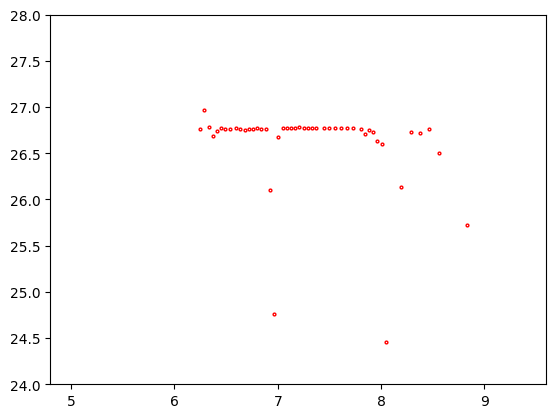

In [ ]:
plt.plot((copia_dp.bjd - 2458815)*24, copia_dp.ccf_rv, 'o',
         markersize=2, markerfacecolor='None', markeredgecolor='red')
plt.xlim((58815.2-58815)*24,(58815.4-58815)*24)
plt.ylim(24,28)

## Lectura de temperaturas y cleaning

Creo un dataframe de las tablas de **temperaturas extraidas** de SOPHIE para cada observación del dataset. Columnas 0 y 1 de fecha y hora, 2 a 31 de temperaturas y presion (22 y 23). Las medidas originales son cada **6 minutos**, en general la diferencia de tiempo entre la medida y el tiempo en el que comienza la observación es de 2 o 3 minutos maximo.

In [ ]:
# columns=['fecha','colonne 1','colonne 2','colonne 3','colonne 4','colonne 5','colonne 6','colonne 7','colonne 8','colonne 9','colonne 10','colonne 11','colonne 12','colonne 13','colonne 14','colonne 15','colonne 16','colonne 17','colonne 18','colonne 19','colonne 20','colonne 21','colonne 22','colonne 23','colonne 24','colonne 25','colonne 26','colonne 27','colonne 28','colonne 29','colonne 30','colonne 31']
temperaturas = pd.read_csv('drive/MyDrive/Tesis/temperaturas_extraidas.csv')

In [ ]:
# Agreguemos estas features al dataset
# Pero antes dropeo las columnas que no sirven
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']
temperaturas_drop = temperaturas.drop(labels=no_sirven, axis=1)

In [ ]:
# Antes de concatener los dataframes voy a limpiar un poco los datos de temperatura,
# ya que hay muchos missing values que tienen valor 0, los quiero reemplazar por la mediana
# primero reemplazo los valores nulos por NaN
from sklearn.impute import SimpleImputer

temperaturas_drop_2 = temperaturas_drop.replace(to_replace=0, value=np.nan)
#temperaturas_drop_2.info()
imputer = SimpleImputer(strategy='median')
imputer.fit(temperaturas_drop_2)
#imputer.statistics_
X = imputer.transform(temperaturas_drop_2)
#type(X)
temperaturas_drop_limpio= pd.DataFrame(X, columns=temperaturas_drop.columns, index=temperaturas_drop.index)
#temperaturas_drop_limpio.head()

In [ ]:
# Ahora sí concateno los dos dataframes
dataset = pd.concat([dataset_preliminar,temperaturas_drop_limpio],axis=1)
dataset.info()
# 112 columnas!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Columns: 112 entries, file_ccf to colonne 31
dtypes: float64(103), int64(3), object(6)
memory usage: 655.5+ KB


Separo en dos datasets según el **modo**:

In [ ]:
dataset_HR = dataset.loc[dataset['modo'] == 'HR']
dataset_HE = dataset.loc[dataset['modo'] == 'HE']

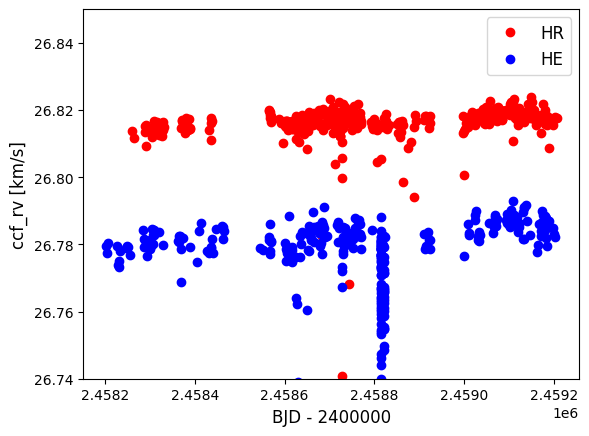

In [ ]:
plt.plot(dataset_HR.bjd, dataset_HR.ccf_rv, 'o', color='red')
plt.plot(dataset_HE.bjd, dataset_HE.ccf_rv, 'o', color='blue')
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv [km/s]', fontsize=12)
plt.ylim(26.74,26.85)
plt.legend(['HR', 'HE'], fontsize=12)

In [ ]:
len(dataset_HR)

383

## Targets y outliers

In [ ]:
# cuantos puntos tenemos?
len(dataset_HR.ccf_rv)

383

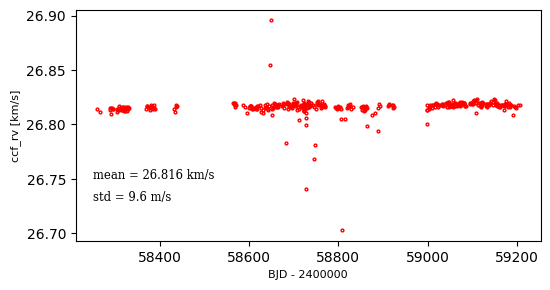

In [ ]:
# visualizemos los datos de vr
plt.figure(figsize=(6,3))
plt.plot(dataset_HR.bjd - 2400000, dataset_HR.ccf_rv, 'o',
         markersize=2, markerfacecolor='None', markeredgecolor='red')
plt.xlabel('BJD - 2400000', fontsize=8)
plt.ylabel('ccf_rv [km/s]', fontsize=8)
plt.text(58250, 26.750, 'mean = '+str(round(dataset_HR.ccf_rv.mean(),3))+' km/s',
         fontsize='small', fontfamily='serif')
plt.text(58250, 26.730, 'std = '+str(round(1e3*dataset_HR.ccf_rv.std(),1))+' m/s',
         fontsize='small', fontfamily='serif')
#plt.savefig('drive/MyDrive/Tesis/targets.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
# plt.rcParams['figure.figsize'] = [2, 2]
# plt.rcParams['figure.dpi'] = 100
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.8)

# plt.rcParams['figure.figsize'] = [8, 12.5]
# plt.rcParams['figure.dpi'] = 300

# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.6)

# plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams['figure.dpi'] = 300

# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.4)

#plt.rcParams['figure.figsize'] = [7, 4]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : True})
# sns.set_context("paper", font_scale=1.0)

In [ ]:
mpl.rcParams["figure.figsize"] = (6, 4)
# mpl.rcParams["figure.dpi"] = 300
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

Text(0.5, 0, 'senti_seeing')

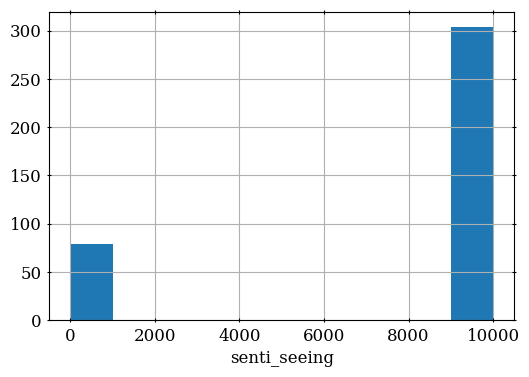

In [ ]:
dataset_HR['senti_seeing'].hist(bins=10)
plt.xlabel('senti_seeing')

Recortemos los outliers que se separan más de 20 m/s de la media. (0.02 km/s)

In [ ]:
print(len(dataset_HR))
# cond = np.abs(dataset_HR.ccf_rv - dataset_HR.ccf_rv.mean()) < 0.0052  #346
# cond = np.abs(dataset_HR.ccf_rv - dataset_HR.ccf_rv.mean()) < 0.00765       #367
cond = np.abs(dataset_HR.ccf_rv - dataset_HR.ccf_rv.mean()) < 0.02 #2*dataset_HR.ccf_rv.std() #0.02      #375

# Q1 = dataset_HR.ccf_rv.quantile(0.25) # first quartile
# Q3 = dataset_HR.ccf_rv.quantile(0.75) # third quartile
# IQR = Q3 - Q1 # interquartile range
# cond = ~np.logical_or(dataset_HR.ccf_rv < (Q1 - 1.5*IQR), dataset_HR.ccf_rv > (Q3 + 1.5*IQR))
dataset_HR_limpio = dataset_HR.loc[cond]
print(len(dataset_HR_limpio))

383
375


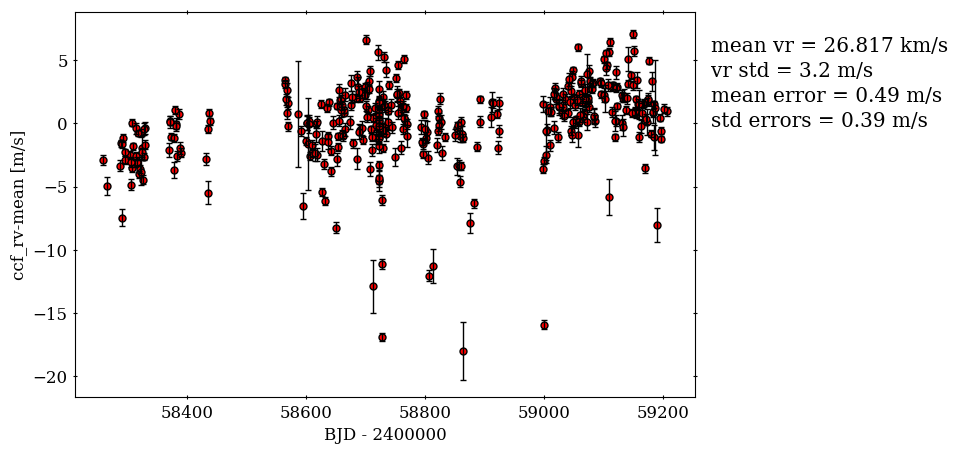

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset_HR_limpio.bjd - 2400000, 1e3*(dataset_HR_limpio.ccf_rv-dataset_HR_limpio.ccf_rv.mean()), 'o',
         ms=5.0, mfc='red', mec='black')
plt.errorbar(dataset_HR_limpio.bjd - 2400000, 1e3*(dataset_HR_limpio.ccf_rv-dataset_HR_limpio.ccf_rv.mean()),
             yerr=dataset_HR_limpio.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv-mean [m/s]', fontsize=12)
plt.figtext(0.92, 0.8,'mean vr = '+str(round(dataset_HR_limpio.ccf_rv.mean(),3))+' km/s', fontsize='large')
plt.figtext(0.92, 0.75,'vr std = '+str(round(1e3*dataset_HR_limpio.ccf_rv.std(),1))+' m/s', fontsize='large')
plt.figtext(0.92, 0.70,'mean error = '+str(round(dataset_HR_limpio.ccf_rv_error.mean(),2))+' m/s', fontsize='large')
plt.figtext(0.92, 0.65,'std errors = '+str(round(dataset_HR_limpio.ccf_rv_error.std(),2))+' m/s', fontsize='large')
#plt.savefig('drive/MyDrive/Tesis/targets_2.png',dpi=400,bbox_inches='tight')
plt.show()

## Feature engineering

In [ ]:
# Arreglemos los valores malos
# dropeo las columnas de tipo object para poder usar el SimpleImputer
# y senti_seeing, colonne 23 y colonne 24 que no sirven (muchos valores nulos)
columnas_no = ['file_ccf','target','date_start','date_end','file_e2ds',
               'modo','senti_seeing','colonne 23', 'colonne 24']
dataset_HR_limpio_drop = dataset_HR_limpio.drop(labels=columnas_no,axis=1)

In [ ]:
# #print(len(dataset_HR_limpio_drop.columns))
# conj = dataset_HR_limpio_drop.columns[:35]
# conj2 = dataset_HR_limpio_drop.columns[35:70]
# conj3 = dataset_HR_limpio_drop.columns[70:103]

In [ ]:
# axs = dataset_HR_limpio_drop.hist(column=conj2, bins=15)
# for ax in axs.flatten():
#     ax.tick_params(axis='both', which='major', pad=1)
# #plt.savefig('drive/MyDrive/Tesis/feature_histograms3.png', dpi=400, bbox_inches='tight')
# plt.show()

In [ ]:
cols = ['guid_sky_level', 'senti_tciel', 'senti_text', 'senti_mag', 'senti_humi', 'temp1_min', 'temp1_max', 'temp3_min', 'temp3_max', 'pres2_min', 'pres2_max', 'pres1_min', 'pres1_max']
for i in cols:
  print(i, len(dataset_HR_limpio_drop[(dataset_HR_limpio_drop[i]==0) | (dataset_HR_limpio_drop[i]==9999)]))

guid_sky_level 2
senti_tciel 28
senti_text 28
senti_mag 28
senti_humi 30
temp1_min 1
temp1_max 1
temp3_min 1
temp3_max 1
pres2_min 59
pres2_max 58
pres1_min 1
pres1_max 1


In [ ]:
# voy a limpiar primero los temp y pres, reemplazar los valores malos por la mediana de:
# temp1_min, temp1_max, temp3_min, temp3_max, pres2_min,
# pres2_max, senti_tciel, senti_text, senti_mag, senti_humi
dataset_HR_limpio_drop.loc[dataset_HR_limpio_drop.guid_sky_level <= 0, 'guid_sky_level'] = 0
cleaning = dataset_HR_limpio_drop.replace(to_replace={'guid_sky_level':0, 'senti_tciel': 9999, 'senti_text': 9999, 'senti_mag': 9999, 'senti_humi': 9999, 'temp1_min': 0,'temp1_max': 0,'temp3_min': 0,'temp3_max': 0,'pres2_min': 0,'pres2_max': 0,'pres1_min': 0,'pres1_max': 0}, value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(cleaning)
X = imputer.transform(cleaning)
dataset_HR_limpio_2= pd.DataFrame(X, columns=dataset_HR_limpio_drop.columns, index=dataset_HR_limpio_drop.index)

#dataset_HR_limpio_2.hist(bins=20,figsize=(16,30),grid=False)
#plt.show()

In [ ]:
len(dataset_HR_limpio_2.columns)

103

In [ ]:
# HISTOGRAMAS PARA TESIS

In [ ]:
histos = dataset_HR_limpio_2.drop(labels=['ccf_rv'], axis=1)
print(len(histos.columns))
conj = histos.columns[:35]
conj2 = histos.columns[35:70]
conj3 = histos.columns[70:103]

102


In [ ]:
# plt.rcParams['figure.figsize'] = [10, 5]
# plt.rcParams['figure.figsize'] = [8, 12.5]
# plt.rcParams['figure.dpi'] = 300

# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.6)

In [ ]:
# axs = histos.hist(column=conj3, bins=15)
# for ax in axs.flatten():
#     ax.tick_params(axis='both', which='major', pad=1)
# #plt.savefig('drive/MyDrive/Tesis/feature_histograms3.png', dpi=400, bbox_inches='tight')
# plt.show()

In [ ]:
# correlaciones para tesis

In [ ]:
len(dataset_HR_limpio_2.columns)

103

In [ ]:
# drop los que no van
forcorr = dataset_HR_limpio_2.drop(labels=['ccf_rv', 'pres2_min', 'pres2_max', 'senti_text', 'senti_humi', 'senti_tciel', 'senti_mag', 'ccf_rv_error'], axis=1)
tforcorr = dataset_HR_limpio_2['ccf_rv']-dataset_HR_limpio_2['ccf_rv'].mean()

# plt.figure(figsize=(10,10))
# sns.heatmap(forcorr.corr(), annot=False, xticklabels=True, yticklabels=True, cmap='coolwarm')
#plt.savefig('drive/MyDrive/Tesis/features_corr.png', dpi=400, bbox_inches='tight')

Para las columnas temp1_max,temp3_max,pres1_max,pres2_max. Las voy a reemplazar por la diferencia (max-min).

In [ ]:
# columnas que van a reemplazar a las max
temp1 = dataset_HR_limpio_2.temp1_max-dataset_HR_limpio_2.temp1_min
temp2 = dataset_HR_limpio_2.temp3_max-dataset_HR_limpio_2.temp3_min
temp3 = dataset_HR_limpio_2.pres1_max-dataset_HR_limpio_2.pres1_min
temp4 = dataset_HR_limpio_2.pres2_max-dataset_HR_limpio_2.pres2_min
temp5 = dataset_HR_limpio_2.airm_end-dataset_HR_limpio_2.airm_start
# hago el reemplazo pero en una copia del dataframe
dataset_final = dataset_HR_limpio_2.copy()
dataset_final.temp1_max = temp1
dataset_final.temp3_max = temp2
dataset_final.pres1_max = temp3
dataset_final.pres2_max = temp4
dataset_final.airm_end = temp5
# y modifico los nombres de esas columnas
dataset_final.rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'},inplace=True)
# dataset_final.head()

# reemplazo la columna 'guid_sky_level' por su logaritmo porque tiene una cola muy larga
# la columna tenía 2 valores nulos y 3 valores negativos (ya reemplazados por mediana)
# NO CORRER DOS VECES
log_sky=np.log(dataset_final['guid_sky_level'])
dataset_final['guid_sky_level'] = log_sky
#plt.plot(dataset_final.guid_sky_level,'o')

## Features p/color effect

In [ ]:
# # vamos a definir nuevas features que serán todos las combinaciones
# # posibles de ratios y diferencias entre s/n orders
# ratios = {}
# diff = {}
# sn_orders = dataset_final.drop(labels=dataset_final.columns[~dataset_final.columns.str.contains('cal_ext')], axis=1)
# for i in sn_orders.columns:
#   for j in sn_orders.columns:
#     if i != j:
#       ratios[i[8:]+'/'+j[8:]] = np.corrcoef(np.asarray(dataset_final[i])/np.asarray(dataset_final[j]),np.asarray(dataset_final.ccf_rv))[0,1]
#       #if int(i[10:]) < int(j[10:]):
#       diff[i[8:]+'-'+j[8:]] = np.corrcoef(np.asarray(dataset_final[i])-np.asarray(dataset_final[j]),np.asarray(dataset_final.ccf_rv))[0,1]

In [ ]:
# sorted_ratios = dict(sorted(ratios.items(), key=lambda item: item[1], reverse=True))
# sorted_diff = dict(sorted(diff.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# from itertools import islice
# def take(n, iterable):
#     return list(islice(iterable, n))
# take(10, sorted_ratios.items())

In [ ]:
# np.corrcoef(np.asarray(dataset_final['cal_ext_sn13']),np.asarray(dataset_final['cal_ext_sn4'])-np.asarray(dataset_final['cal_ext_sn7']))[0,1]

In [ ]:
# # para ver la correlacion entre los distintos diff o ratios
# for i in sn_orders.columns:
#   for j in sn_orders.columns:
#     if i != j:
#       b = np.corrcoef(np.asarray(dataset_final[i])-np.asarray(dataset_final[j]),np.asarray(dataset_final.ccf_rv))[0,1]
#       a = np.corrcoef(np.asarray(dataset_final[i])-np.asarray(dataset_final[j]),np.asarray(dataset_final['cal_ext_sn8'])-np.asarray(dataset_final['cal_ext_sn0']))[0,1]
#       c = np.corrcoef(np.asarray(dataset_final[i])-np.asarray(dataset_final[j]),np.asarray(dataset_final['cal_ext_sn36'])-np.asarray(dataset_final['cal_ext_sn33']))[0,1]
#       if np.abs(a) < 0.80 and np.abs(c) < 0.80 and np.abs(b) > 0.34:
#         print(a,c, i+'-'+j, b)

In [ ]:
# take(10, sorted_diff.items())

In [ ]:
# nuevas nuevas nuevas
dataset_final['sn0/2'] = dataset_final['cal_ext_sn0']/dataset_final['cal_ext_sn2']
dataset_final['sn7-8'] = dataset_final['cal_ext_sn7'] - dataset_final['cal_ext_sn8']
dataset_final['sn14/16'] = dataset_final['cal_ext_sn14']/dataset_final['cal_ext_sn16']
dataset_final['sn0-1'] = dataset_final['cal_ext_sn0']-dataset_final['cal_ext_sn1']
dataset_final['sn8/9'] = dataset_final['cal_ext_sn8']/dataset_final['cal_ext_sn9']
dataset_final['sn6-4'] = dataset_final['cal_ext_sn6']-dataset_final['cal_ext_sn4']
dataset_final['sn0/27'] = dataset_final['cal_ext_sn0']/dataset_final['cal_ext_sn27']

dataset_final['sn11-2'] = dataset_final['cal_ext_sn11']-dataset_final['cal_ext_sn2']
dataset_final['sn23/12'] = dataset_final['cal_ext_sn23']/dataset_final['cal_ext_sn12']
dataset_final['sn26-37'] = dataset_final['cal_ext_sn26']-dataset_final['cal_ext_sn37']
dataset_final['sn22/34'] = dataset_final['cal_ext_sn22']/dataset_final['cal_ext_sn34']
dataset_final['sn17-19'] = dataset_final['cal_ext_sn17']-dataset_final['cal_ext_sn19']
dataset_final['sn2-8'] = dataset_final['cal_ext_sn2'] - dataset_final['cal_ext_sn8']
dataset_final['sn32/33'] = dataset_final['cal_ext_sn32']/dataset_final['cal_ext_sn33']
dataset_final['sn12/34'] = dataset_final['cal_ext_sn12']/dataset_final['cal_ext_sn34']
dataset_final['sn13-38'] = dataset_final['cal_ext_sn13'] - dataset_final['cal_ext_sn38']
dataset_final['sn5/33'] = dataset_final['cal_ext_sn5']/dataset_final['cal_ext_sn33']
dataset_final['sn30-33'] = dataset_final['cal_ext_sn30'] - dataset_final['cal_ext_sn33']
dataset_final['sn22/33'] = dataset_final['cal_ext_sn22']/dataset_final['cal_ext_sn33']
dataset_final['airm_ratio'] = dataset_HR_limpio_2.airm_end/dataset_HR_limpio_2.airm_start
dataset_final.head()

,ccf_rv,ccf_fwhm,ccf_contrast,ccf_span,berv,cal_ext_sn0,cal_ext_sn1,cal_ext_sn2,cal_ext_sn3,cal_ext_sn4,...,sn22/34,sn17-19,sn2-8,sn32/33,sn12/34,sn13-38,sn5/33,sn30-33,sn22/33,airm_ratio
3,26.818338,6.629007,32.515128,-0.004500,-3.378533,27.217438,30.211032,40.031847,47.879584,49.651771,...,0.766513,-4.102068,-12.062123,1.010533,0.502717,-48.235526,0.363526,-3.973715,0.797233,0.992481
5,26.816720,6.605542,33.256707,-0.002333,1.067076,39.145858,42.815348,55.685507,65.742347,67.883910,...,0.782665,-4.414682,-13.393181,1.013452,0.531643,-50.902635,0.404610,-5.226323,0.811466,1.007634
7,26.818222,6.598772,33.826751,-0.001833,4.443330,98.393529,106.430344,136.452653,159.333240,164.094319,...,0.803617,-8.634429,-27.975749,1.015962,0.558139,-98.966809,0.437594,-8.765525,0.831584,1.000000
8,26.816438,6.607021,33.108574,-0.004333,3.392627,36.443890,39.894443,51.892596,61.021032,63.143047,...,0.767285,-4.365983,-12.275369,1.011082,0.513435,-54.842766,0.392347,-5.434859,0.797662,1.000000
10,26.815866,6.612548,33.624212,0.001333,-2.825179,76.080527,82.997800,107.371664,126.904197,130.456093,...,0.791580,-8.158783,-26.066682,1.013988,0.541543,-93.212783,0.408648,-8.442256,0.819169,1.008197


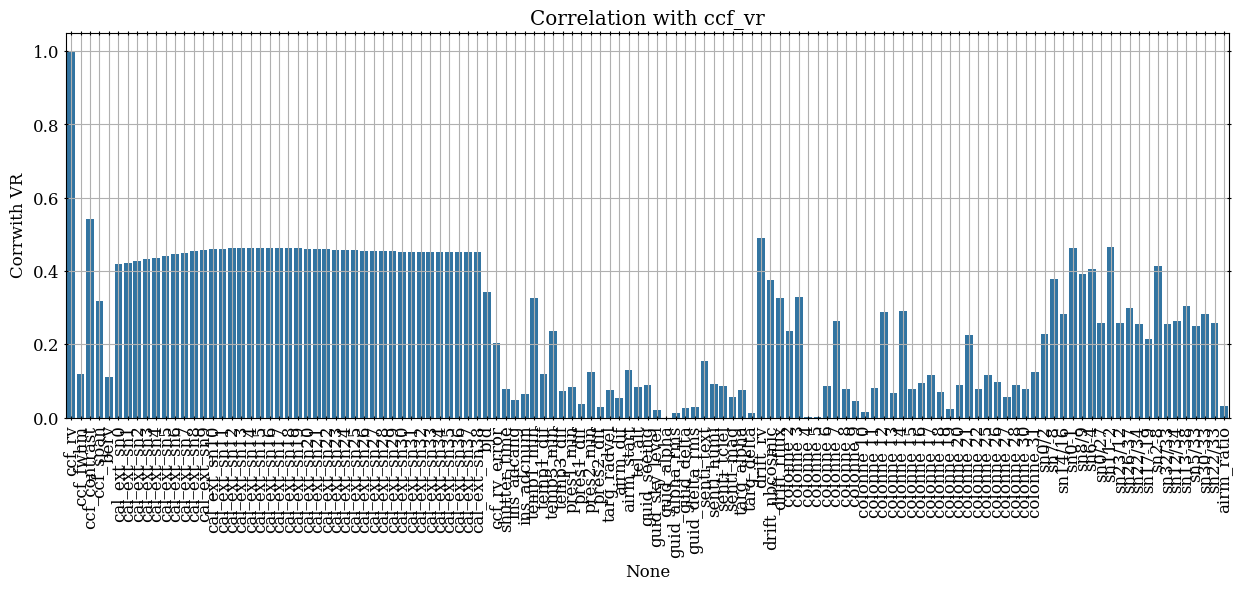

In [ ]:
corr_HR_VR_2 = dataset_final.corrwith(other=dataset_final.ccf_rv)
asd2=corr_HR_VR_2.abs()
f, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=asd2.index, y=asd2.values)
plt.xticks(rotation='vertical')
plt.ylabel('Corrwith VR')
plt.title('Correlation with ccf_vr')
plt.grid(True)
#plt.savefig('drive/MyDrive/Tesis/corr_vr.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
#dataset_final.hist(bins=20,figsize=(30,16),grid=False)
#plt.savefig('drive/MyDrive/Tesis/histo.png',dpi=400,bbox_inches='tight')
#plt.show()

## Features estelares

In [ ]:
# Teff=5246, Fe/H=-0.19, logg=4.530 valenti et al 2005
# teff=5215+-40, fe/h=-0.28, logg=4.58 morris et al 2019
dataset_final['teff'] = 5246
dataset_final['fe/h'] = -0.19
dataset_final['logg'] = 4.530

In [ ]:
# # remove outliers?
# rem_out = []
# print(len(dataset_final))
# dataset_final = remove_outliers(dataset_final, dataset_final.drop(labels=columnas_no_1 + columnas_no_2, axis=1).columns, 4)

## Drop final y definición de X y t

In [ ]:
# version con features selection con LassoLars cortando en coef mayores a 1e-5
# probemos incluir ccf_fwhm y ccf_span y ccf_contrast y targ_radvel, los saco de columnas_no_1
columnas_no_1 = ['ccf_rv', 'ccf_rv_error', 'targ_alpha', 'targ_delta', 'pres2_min',
                 'pres2_dif', 'senti_humi', 'senti_tciel', 'senti_mag', 'senti_text', 'bjd']

# nueva prueba
columnas_no_2 = ['sn11-2', 'colonne 2', 'sn22/33',
                'cal_ext_sn3', 'sn23/12',
                'cal_ext_sn5', 'cal_ext_sn6', 'cal_ext_sn8',
                'cal_ext_sn9', 'cal_ext_sn11', 'cal_ext_sn12',
                'cal_ext_sn13', 'cal_ext_sn14', 'cal_ext_sn15', 'cal_ext_sn16',
                'cal_ext_sn17', 'cal_ext_sn18', 'cal_ext_sn19', 'cal_ext_sn20',
                'cal_ext_sn22', 'cal_ext_sn23', 'cal_ext_sn24',
                'cal_ext_sn25', 'cal_ext_sn26', 'cal_ext_sn27', 'cal_ext_sn28',
                'cal_ext_sn29', 'cal_ext_sn30', 'cal_ext_sn31', 'cal_ext_sn32',
                'cal_ext_sn33', 'cal_ext_sn34', 'cal_ext_sn35', 'cal_ext_sn36',
                'cal_ext_sn37', 'cal_ext_sn4', 'cal_ext_sn21', 'cal_ext_sn2',
                'ins_adcang', 'temp3_min', 'guid_sky_level', 'guid_delta_rms',
                'colonne 4', 'colonne 6',
                'sn32/33', 'fe/h', 'colonne 21',
                'guid_alpha', 'guid_delta', 'drift_nbcosmic',
                'sn26-37', 'logg', 'sn2-8',
                'temp1_dif', 'temp3_dif', 'cal_ext_sn10',
                'cal_ext_sn38', 'sn13-38',
                'cal_ext_sn0', 'airm_start',
                'cal_ext_sn1', 'colonne 11', 'sn14/16',
                'ccf_fwhm', 'teff', 'ccf_span',
                'tel_alt', 'temp1_min', 'pres1_min', 'airm_ratio',
                'colonne 13', 'colonne 15',
                'colonne 14', 'colonne 20',
                'colonne 28', 'colonne 9', 'sn8/9',
                'colonne 22', 'colonne 5',
                'colonne 8', 'colonne 12', 'colonne 10', 'sn12/34',
                'sn0/2', 'sn0-1', 'targ_radvel', 'sn5/33', 'colonne 31',
                'sn7-8', 'sn0/27', 'sn22/34'] #'cal_ext_sn7', 'sn0/27', 'sn17-19', 'sn30-33' # por alto vif esta linea
                #]
# # FINAL
# columnas_no_2 = ['ccf_span', 'sn11-2', 'sn22/33',
#                 'cal_ext_sn2', 'cal_ext_sn3', 'sn0-1', 'sn23/12',
#                 'cal_ext_sn5', 'cal_ext_sn6', 'cal_ext_sn8',
#                 'cal_ext_sn9', 'cal_ext_sn11', 'cal_ext_sn12',
#                 'cal_ext_sn13', 'cal_ext_sn14', 'cal_ext_sn15', 'cal_ext_sn16',
#                 'cal_ext_sn17', 'cal_ext_sn18', 'cal_ext_sn19', 'cal_ext_sn20',
#                 'cal_ext_sn22', 'cal_ext_sn23', 'cal_ext_sn24',
#                 'cal_ext_sn25', 'cal_ext_sn26', 'cal_ext_sn27', 'cal_ext_sn28',
#                 'cal_ext_sn29', 'cal_ext_sn30', 'cal_ext_sn31', 'cal_ext_sn32',
#                 'cal_ext_sn33', 'cal_ext_sn34', 'cal_ext_sn35', 'cal_ext_sn36',
#                 'cal_ext_sn37', 'cal_ext_sn4', 'cal_ext_sn7', 'cal_ext_sn21',
#                 'ins_adcang', 'temp3_min',
#                 'guid_alpha', 'guid_delta', 'drift_nbcosmic',
#                 'sn26-37', 'logg', 'airm_dif', 'sn2-8', 'sn12/34',
#                 'temp1_dif', 'temp3_dif', 'cal_ext_sn10',
#                 'cal_ext_sn38', 'guid_seeing', 'sn13-38',
#                 'cal_ext_sn0', 'sn5/33', 'airm_start',
#                 'cal_ext_sn1', 'sn0/27', 'sn6-4', 'sn8/9', 'ins_adcnum',
#                 'airm_dif', 'targ_radvel', 'ccf_fwhm', 'teff',
#                 'tel_alt', 'temp1_min', 'pres1_min', 'berv', 'airm_ratio', 'shutter_time', 'guid_alpha_rms', # esta fila son de la seleccion anterior
#                 'colonne 7', 'colonne 16', 'colonne 17', 'colonne 13', 'colonne 15',
#                 'colonne 30', 'colonne 14', 'colonne 20', 'colonne 21', 'colonne 25',
#                 'colonne 27', 'colonne 28', 'colonne 19', 'colonne 26',
#                 'colonne 18', 'colonne 22', 'colonne 2', 'colonne 3', 'colonne 5',
#                 'colonne 8', 'colonne 9', 'colonne 10', 'colonne 11', 'colonne 12' #saqué bjd y agregué drift_rflux
#                 ]


dataset_final_drop = dataset_final.drop(labels=columnas_no_1 + columnas_no_2, axis=1)
bjd1 = dataset_final['bjd'] - 2400000

t = dataset_final.ccf_rv
t = t - t.mean()
X = dataset_final_drop.copy()

# definamos los WEIGHTS a partir de ccf_rv_error
weight = (645/375)/(dataset_final.ccf_rv_error/1e3)**2   #ccf_rv_error esta en m/s, lo paso a km/s antes
print(X.columns)
print(len(X.columns))
print(len(t))

Index(['ccf_contrast', 'berv', 'cal_ext_sn7', 'shutter_time', 'ins_adcnum',
       'pres1_dif', 'airm_dif', 'guid_seeing', 'guid_alpha_rms', 'drift_rv',
       'drift_rflux', 'colonne 3', 'colonne 7', 'colonne 16', 'colonne 17',
       'colonne 18', 'colonne 19', 'colonne 25', 'colonne 26', 'colonne 27',
       'colonne 30', 'sn6-4', 'sn17-19', 'sn30-33'],
      dtype='object')
24
375


In [ ]:
features_finales = ['drift_rv', 'ccf_contrast', 'colonne 3', 'sn22/34', 'sn0/27', 'cal_ext_sn7', 'sn6-4',
                   'sn17-19', 'sn30-33', 'colonne 17', 'colonne 7', 'colonne 26', 'sn7-8', 'drift_rflux',
                   'colonne 27', 'colonne 19', 'colonne 19', 'berv', 'colonne 16', 'colonne 30', 'guid_alpha_rms',
                   'shutter_time', 'colonne 18', 'guid_seeing', 'colonne 25', 'pres1_dif', 'ins_adcnum']
print(len(features_finales))

27


In [ ]:
# g = sns.PairGrid(X, vars=most_important, corner=True)
# g.map_diag(sns.histplot)
# g.map_lower(sns.scatterplot)
# g.add_legend()

In [ ]:
# len(X)

In [ ]:
# Xasd = remove_outliers(X, X.columns, 3)

In [ ]:
# len(Xasd)

In [ ]:
# g = sns.PairGrid(Xasd, vars=X.columns, corner=True)
# g.map_diag(sns.histplot)
# g.map_lower(sns.scatterplot)
# g.add_legend()

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split
# w_train, w_test = train_test_split(weight, test_size = 0.2, random_state = 420)
# X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=420)

# #para visualizacion
# dataset_final_train, dataset_final_test = train_test_split(dataset_final, test_size=0.2, random_state=420)
# print(len(X_train), len(X_test))

# #para visualizar los sets test y train de labels
# plt.plot(t_train,'o',label='train')
# plt.plot(t_test,'o',label='test')
# plt.legend(loc='best')
# #plt.ylim(26.790,26.840)
# plt.show()

# HD89269 (G4V)

In [ ]:
# Lectura
ccf_89269 = pd.read_table('drive/MyDrive/Tesis/dataset_ccf_hd89269.dat', sep='\s+', names=names)
e2ds_89269 = pd.read_table('drive/MyDrive/Tesis/dataset_e2ds_hd89269.dat', sep='\s+', names=columnas_e2ds)
print(len(ccf_89269))

346


In [ ]:
e2ds_89269_drop = e2ds_89269.drop(columns=['target', 'bjd'])
ccf_89269_drop = ccf_89269.drop(columns=['date_start'])

# concateno
dataset_preliminar_89269 = pd.concat([ccf_89269_drop, e2ds_89269_drop],axis=1)

In [ ]:
temperaturas2 = pd.read_csv('drive/MyDrive/Tesis/temperaturas_extraidas_2.csv')
#temperaturas2.info()

In [ ]:
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']
temperaturas2_drop = temperaturas2.drop(labels=no_sirven,axis=1)
#temperaturas2_drop.info()

In [ ]:
# vistazo rapido a los datos de temperatura
# temperaturas2_drop.hist(bins=20,figsize=(16,30),grid=False)
# plt.show()

In [ ]:
#sacamos los datos de 2021 por ahora. (no tenemos las temperaturas tampoco)
cond = dataset_preliminar_89269.date_start.str.contains('2021', regex=False)
dataset_89269_no2021 = dataset_preliminar_89269.loc[-cond]

In [ ]:
from sklearn.impute import SimpleImputer

temperaturas2_drop_2 = temperaturas2_drop.replace(to_replace=0,value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(temperaturas2_drop_2)
X_2 = imputer.transform(temperaturas2_drop_2)
temperaturas2_drop_limpio= pd.DataFrame(X_2, columns=temperaturas2_drop.columns,index=temperaturas2_drop.index)

In [ ]:
dataset2 = pd.concat([temperaturas2_drop_limpio,dataset_89269_no2021.set_index(temperaturas2_drop.index)],axis=1)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 112 entries, colonne 2 to drift_rflux
dtypes: float64(103), int64(3), object(6)
memory usage: 179.5+ KB


In [ ]:
dataset2_HR = dataset2.loc[dataset2['modo'] == 'HR']
dataset2_HE = dataset2.loc[dataset2['modo'] == 'HE']
print(len(dataset2_HR),len(dataset2_HE))

174 31


## Targets y outliers

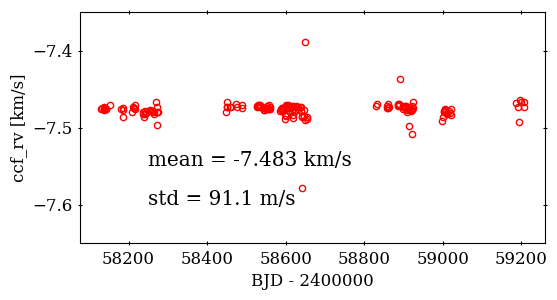

In [ ]:
# visualizemos los datos de vr
plt.figure(figsize=(6,3))
plt.plot(dataset2_HR.bjd - 2400000, dataset2_HR.ccf_rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='red')
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv [km/s]', fontsize=12)
plt.ylim(-7.65,-7.35)
plt.text(58250, -7.55, 'mean = '+str(round(dataset2_HR.ccf_rv.mean(),3))+' km/s',
         fontsize='large', fontfamily='serif')
plt.text(58250, -7.6, 'std = '+str(round(1e3*dataset2_HR.ccf_rv.std(),1))+' m/s',
         fontsize='large', fontfamily='serif')
#plt.savefig('drive/MyDrive/Tesis/targets.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
print(len(dataset2_HR))
# cond = np.abs(dataset2_HR.ccf_rv - dataset2_HR.ccf_rv.mean()) < 0.02

Q1 = dataset2_HR.ccf_rv.quantile(0.25) # first quartile
Q3 = dataset2_HR.ccf_rv.quantile(0.75) # third quartile
IQR = Q3 - Q1 # interquartile range
cond = ~np.logical_or(dataset2_HR.ccf_rv < (Q1 - 2.5*IQR), dataset2_HR.ccf_rv > (Q3 + 2.5*IQR))
dataset2_HR_limpio = dataset2_HR.loc[cond]
print(len(dataset2_HR_limpio))

174
167


In [ ]:
dataset2_HR_limpio.ccf_rv.std()*1e3

5.085646133048155

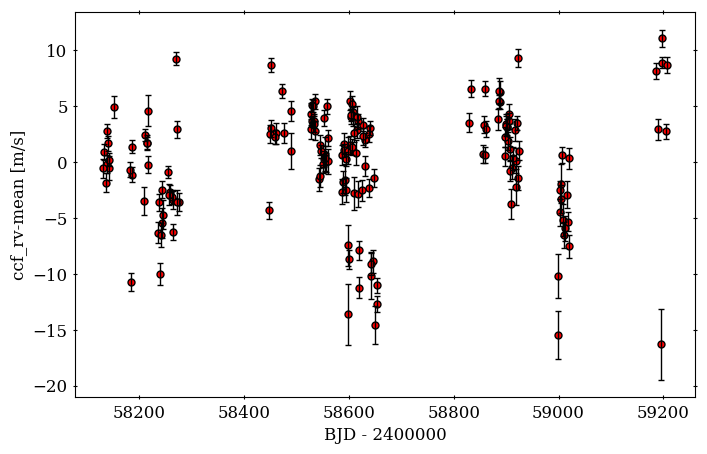

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset2_HR_limpio.bjd - 2400000, 1e3*(dataset2_HR_limpio.ccf_rv-dataset2_HR_limpio.ccf_rv.mean()), 'o',
         ms=5.0, mfc='red', mec='black')
plt.errorbar(dataset2_HR_limpio.bjd - 2400000, 1e3*(dataset2_HR_limpio.ccf_rv-dataset2_HR_limpio.ccf_rv.mean()),
             yerr=dataset2_HR_limpio.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv-mean [m/s]', fontsize=12)
plt.show()

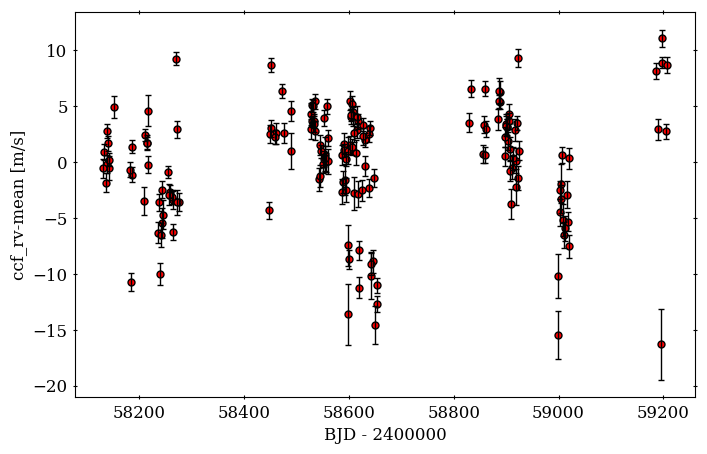

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset2_HR_limpio.bjd - 2400000, 1e3*(dataset2_HR_limpio.ccf_rv-dataset2_HR_limpio.ccf_rv.mean()), 'o',
         ms=5.0, mfc='red', mec='black')
plt.errorbar(dataset2_HR_limpio.bjd - 2400000, 1e3*(dataset2_HR_limpio.ccf_rv-dataset2_HR_limpio.ccf_rv.mean()),
             yerr=dataset2_HR_limpio.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv-mean [m/s]', fontsize=12)
plt.show()

In [ ]:
columnas_no = ['file_ccf','target','date_start','date_end','file_e2ds',
               'modo','senti_seeing','colonne 23', 'colonne 24']
dataset2_HR_limpio_drop = dataset2_HR_limpio.drop(labels=columnas_no,axis=1)

In [ ]:
corr_HR_VR = dataset2_HR_limpio_drop.corrwith(other=dataset2_HR_limpio_drop['ccf_rv'])
corr_matrix = dataset2_HR_limpio_drop.corr(method='spearman')
# print('Spearman coefficient:')
# print(corr_matrix.ccf_rv.abs().sort_values(ascending=False)[0:11])
print('Pearson coefficient:')
print(corr_HR_VR.abs().sort_values(ascending=False)[0:10])

Pearson coefficient:
ccf_rv         1.000000
cal_ext_sn0    0.728517
cal_ext_sn1    0.720843
cal_ext_sn2    0.718339
cal_ext_sn3    0.709098
cal_ext_sn4    0.696190
cal_ext_sn5    0.690700
cal_ext_sn7    0.677586
cal_ext_sn6    0.676862
cal_ext_sn8    0.658892
dtype: float64


In [ ]:
# dataset2_HR_limpio_drop.hist(bins=20,figsize=(16,30),grid=False)
# plt.show()

In [ ]:
cols = ['guid_sky_level', 'senti_tciel', 'senti_text', 'senti_mag', 'senti_humi', 'temp1_min',
        'temp1_max', 'temp3_min', 'temp3_max', 'pres2_min', 'pres2_max', 'pres1_min', 'pres1_max']
for i in cols:
  print(i, len(dataset2_HR_limpio_drop[(dataset2_HR_limpio_drop[i]==0) | (dataset2_HR_limpio_drop[i]==9999)]))

guid_sky_level 0
senti_tciel 70
senti_text 70
senti_mag 70
senti_humi 72
temp1_min 0
temp1_max 0
temp3_min 0
temp3_max 0
pres2_min 74
pres2_max 74
pres1_min 0
pres1_max 0


## Feature Engineering

In [ ]:
dataset2_HR_limpio_drop.loc[dataset2_HR_limpio_drop.guid_sky_level <= 0, 'guid_sky_level'] = 0

cleaning = dataset2_HR_limpio_drop.replace(to_replace={'guid_sky_level':0, 'senti_text': 9999, 'senti_mag': 9999, 'temp1_min': 0,'temp1_max': 0,'temp3_min': 0,'temp3_max': 0,'pres2_min': 0,'pres2_max': 0,'pres1_min': 0,'pres1_max': 0}, value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(cleaning)
X_3 = imputer.transform(cleaning)
dataset2_HR_limpio_2 = pd.DataFrame(X_3, columns=dataset2_HR_limpio_drop.columns,index=dataset2_HR_limpio_drop.index)
dataset2_HR_limpio_22 = dataset2_HR_limpio_2.copy()

In [ ]:
# drop los que no van
# para correlaciones de la tesis
forcorr2 = dataset2_HR_limpio_22.drop(labels=['ccf_rv', 'pres2_min', 'pres2_max', 'senti_text', 'senti_humi', 'senti_tciel', 'senti_mag', 'ccf_rv_error'], axis=1)
tforcorr2 = dataset2_HR_limpio_22['ccf_rv']-dataset2_HR_limpio_22['ccf_rv'].mean()

# plt.figure(figsize=(10,10))
# sns.heatmap(forcorr.corr(), annot=False, xticklabels=True, yticklabels=True, cmap='coolwarm')
# #plt.savefig('drive/MyDrive/Tesis/features_corr.png', dpi=400, bbox_inches='tight')

In [ ]:
# print(len(dataset2_HR_limpio_22))
# dataset2_HR_limpio_22 = dataset2_HR_limpio_22.loc[dataset2_HR_limpio_22['senti_humi'] < 1000]
# print(len(dataset2_HR_limpio_22))
# dataset2_HR_limpio_22 = dataset2_HR_limpio_22.loc[dataset2_HR_limpio_22['senti_tciel'] < 1000]
# print(len(dataset2_HR_limpio_22))

In [ ]:
# columnas que van a reemplazar a las max
temp1 = dataset2_HR_limpio_22.temp1_max-dataset2_HR_limpio_22.temp1_min
temp2 = dataset2_HR_limpio_22.temp3_max-dataset2_HR_limpio_22.temp3_min
temp3 = dataset2_HR_limpio_22.pres1_max-dataset2_HR_limpio_22.pres1_min
temp4 = dataset2_HR_limpio_22.pres2_max-dataset2_HR_limpio_22.pres2_min
temp5 = dataset2_HR_limpio_22.airm_end-dataset2_HR_limpio_22.airm_start
# hago el reemplazo pero en una copia del dataframe
dataset2_final = dataset2_HR_limpio_22.copy()
dataset2_final.temp1_max = temp1
dataset2_final.temp3_max = temp2
dataset2_final.pres1_max = temp3
dataset2_final.pres2_max = temp4
dataset2_final.airm_end = temp5
# y modifico los nombres de esas columnas
dataset2_final.rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'},inplace=True)
# NO CORRER DOS VECES
log_sky=np.log(dataset2_final['guid_sky_level'])
dataset2_final['guid_sky_level'] = log_sky

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
# nuevas nuevas
dataset2_final['sn0/2'] = dataset2_final['cal_ext_sn0']/dataset2_final['cal_ext_sn2']
dataset2_final['sn7-8'] = dataset2_final['cal_ext_sn7'] - dataset2_final['cal_ext_sn8']
dataset2_final['sn14/16'] = dataset2_final['cal_ext_sn14']/dataset2_final['cal_ext_sn16']
dataset2_final['sn0-1'] = dataset2_final['cal_ext_sn0']-dataset2_final['cal_ext_sn1']
dataset2_final['sn8/9'] = dataset2_final['cal_ext_sn8']/dataset2_final['cal_ext_sn9']
dataset2_final['sn6-4'] = dataset2_final['cal_ext_sn6']-dataset2_final['cal_ext_sn4']
dataset2_final['sn0/27'] = dataset2_final['cal_ext_sn0']/dataset2_final['cal_ext_sn27']

dataset2_final['sn11-2'] = dataset2_final['cal_ext_sn11']-dataset2_final['cal_ext_sn2']
dataset2_final['sn23/12'] = dataset2_final['cal_ext_sn23']/dataset2_final['cal_ext_sn12']
dataset2_final['sn26-37'] = dataset2_final['cal_ext_sn26']-dataset2_final['cal_ext_sn37']
dataset2_final['sn22/34'] = dataset2_final['cal_ext_sn22']/dataset2_final['cal_ext_sn34']
dataset2_final['sn17-19'] = dataset2_final['cal_ext_sn17']-dataset2_final['cal_ext_sn19']
dataset2_final['sn2-8'] = dataset2_final['cal_ext_sn2'] - dataset2_final['cal_ext_sn8']
dataset2_final['sn32/33'] = dataset2_final['cal_ext_sn32']/dataset2_final['cal_ext_sn33']
dataset2_final['sn12/34'] = dataset2_final['cal_ext_sn12']/dataset2_final['cal_ext_sn34']
dataset2_final['sn13-38'] = dataset2_final['cal_ext_sn13'] - dataset2_final['cal_ext_sn38']
dataset2_final['sn5/33'] = dataset2_final['cal_ext_sn5']/dataset2_final['cal_ext_sn33']
dataset2_final['sn30-33'] = dataset2_final['cal_ext_sn30'] - dataset2_final['cal_ext_sn33']
dataset2_final['sn22/33'] = dataset2_final['cal_ext_sn22']/dataset2_final['cal_ext_sn33']
dataset2_final['airm_ratio'] = dataset2_HR_limpio_2.airm_end/dataset2_HR_limpio_2.airm_start
dataset2_final.head()

,colonne 2,colonne 3,colonne 4,colonne 5,colonne 6,colonne 7,colonne 8,colonne 9,colonne 10,colonne 11,...,sn22/34,sn17-19,sn2-8,sn32/33,sn12/34,sn13-38,sn5/33,sn30-33,sn22/33,airm_ratio
0,20.449,20.206,18.209,20.497,18.974,18.448,20.471,20.366,20.682,20.235,...,0.822973,-7.419789,-13.846121,1.007624,0.566168,-42.498391,0.441406,-4.238993,0.846398,1.024390
1,20.456,20.208,20.144,20.514,19.450,19.023,20.484,20.400,20.699,20.270,...,0.820968,-4.608315,-8.123886,1.008417,0.571191,-27.899086,0.455774,-2.413432,0.843992,1.000000
2,20.459,20.211,20.454,20.514,19.449,19.049,20.488,20.406,20.701,20.280,...,0.818133,-4.879825,-8.575300,1.008762,0.567116,-30.009868,0.451203,-2.786026,0.841483,1.009615
3,20.437,20.188,20.801,20.500,19.943,18.270,20.472,20.406,20.675,20.292,...,0.848972,-7.465184,-12.555039,1.014336,0.620980,-32.347666,0.504394,-3.640609,0.869758,0.990476
4,20.449,20.206,19.886,20.509,19.570,19.010,20.479,20.398,20.695,20.267,...,0.819103,-6.612964,-11.157814,1.009752,0.572089,-38.259453,0.456059,-3.727293,0.841779,0.990654


## Features estelares

In [ ]:
# Teff=5586, Fe/H=-0.20, logg=4.440
dataset2_final['teff'] = 5586
dataset2_final['fe/h'] = -0.20
dataset2_final['logg'] = 4.440

In [ ]:
dataset2_final = dataset2_final[dataset_final.columns]

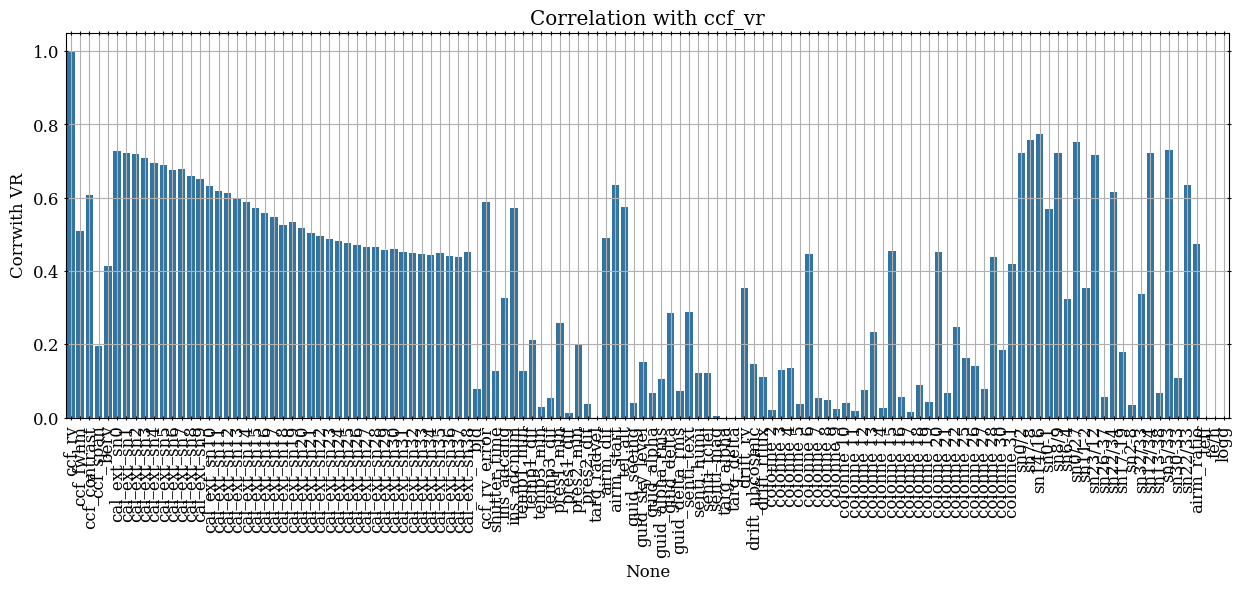

In [ ]:
corr_HR_VR_2 = dataset2_final.corrwith(other=dataset2_final.ccf_rv)
asd2=corr_HR_VR_2.abs()
f, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=asd2.index, y=asd2.values)
plt.xticks(rotation='vertical')
plt.ylabel('Corrwith VR')
plt.title('Correlation with ccf_vr')
plt.grid(True)
#plt.savefig('drive/MyDrive/Tesis/corr_vr.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
# dataset2_final = remove_outliers(dataset2_final, dataset2_final.drop(labels=columnas_no_1 + columnas_no_2, axis=1).columns, 4)

## Drop final

In [ ]:
dataset2_final_drop = dataset2_final.drop(labels=columnas_no_1 + columnas_no_2,axis=1)
bjd2 = dataset2_final['bjd'] - 2400000

t2 = dataset2_final.ccf_rv
t2 = t2 - t2.mean()
X2 = dataset2_final_drop.copy()

# definamos los WEIGHTS a partir de ccf_rv_error
weight2 = (645/167)/(dataset2_final.ccf_rv_error/1e3)**2   #ccf_rv_error esta en m/s, lo paso a km/s antes

# features que quedaron
print(X2.columns)
print(len(X2.columns))
print(len(t2))

Index(['ccf_contrast', 'berv', 'cal_ext_sn7', 'shutter_time', 'ins_adcnum',
       'pres1_dif', 'airm_dif', 'guid_seeing', 'guid_alpha_rms', 'drift_rv',
       'drift_rflux', 'colonne 3', 'colonne 7', 'colonne 16', 'colonne 17',
       'colonne 18', 'colonne 19', 'colonne 25', 'colonne 26', 'colonne 27',
       'colonne 30', 'sn6-4', 'sn17-19', 'sn30-33'],
      dtype='object')
24
167


In [ ]:
# # Split
# w2_train, w2_test = train_test_split(weight2, test_size = 0.2, random_state = 420)
# X2_train, X2_test, t2_train, t2_test = train_test_split(X2, t2, test_size=0.2, random_state=420)
# print(len(X2_train), len(X2_test))

# # para visualizacion
# dataset2_final_train, dataset2_final_test = train_test_split(dataset2_final, test_size=0.2, random_state=420)
# # para visualizar los sets test y train de labels
# plt.plot(t2_train,'o',label='train')
# plt.plot(t2_test,'o',label='test')
# plt.legend(loc='best')
# plt.show()

#HD9407 (G6.5V)

In [ ]:
# Lectura
ccf_9407 = pd.read_table('drive/MyDrive/Tesis/dataset_ccf_hd9407.dat', sep='\s+', names=names)
e2ds_9407 = pd.read_table('drive/MyDrive/Tesis/dataset_e2ds_hd9407.dat', sep='\s+', names=columnas_e2ds)
print(len(ccf_9407))

171


In [ ]:
e2ds_9407_drop = e2ds_9407.drop(columns=['target', 'bjd'])
ccf_9407_drop = ccf_9407.drop(columns=['date_start'])
dataset_preliminar_9407 = pd.concat([ccf_9407_drop, e2ds_9407_drop],axis=1)

In [ ]:
temperaturas4 = pd.read_csv('drive/MyDrive/Tesis/temperaturas_extraidas_hd9407.csv')
#temperaturas4.info()

In [ ]:
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']
temperaturas4_drop = temperaturas4.drop(labels=no_sirven,axis=1)
#temperaturas4_drop.info()

In [ ]:
#vistazo rapido a los datos de temperatura
# temperaturas4_drop.hist(bins=20,figsize=(16,30),grid=False)
# plt.show()

In [ ]:
# colonne 23 y 24 no sirven

In [ ]:
#sacamos los datos de 2021 por ahora. (no tenemos las temperaturas tampoco)
print(len(dataset_preliminar_9407))
cond = dataset_preliminar_9407.date_start.str.contains('2021', regex=False)
dataset_9407_no2021 = dataset_preliminar_9407.loc[-cond]
print(len(dataset_9407_no2021))

171
171


In [ ]:
from sklearn.impute import SimpleImputer

temperaturas4_drop_2 = temperaturas4_drop.replace(to_replace=0,value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(temperaturas4_drop_2)
X_6 = imputer.transform(temperaturas4_drop_2)
temperaturas4_drop_limpio= pd.DataFrame(X_6, columns=temperaturas4_drop.columns,index=temperaturas4_drop.index)


In [ ]:
dataset4 = pd.concat([temperaturas4_drop_limpio,dataset_9407_no2021.set_index(temperaturas4_drop.index)],axis=1)
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 112 entries, colonne 2 to drift_rflux
dtypes: float64(103), int64(3), object(6)
memory usage: 149.8+ KB


In [ ]:
dataset4_HR = dataset4.loc[dataset4['modo'] == 'HR']
dataset4_HE = dataset4.loc[dataset4['modo'] == 'HE']
print(len(dataset4_HR),len(dataset4_HE))

105 66


## Targets y outliers

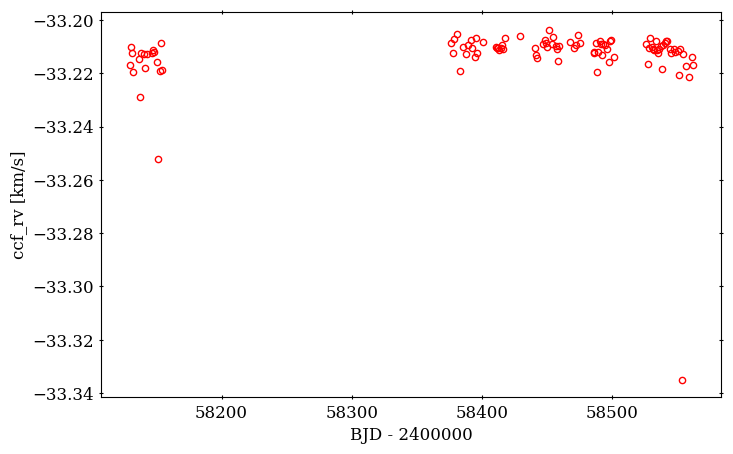

In [ ]:
# visualizemos los datos de vr
plt.figure(figsize=(8,5))
plt.plot(dataset4_HR.bjd - 2400000, dataset4_HR.ccf_rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='red')
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv [km/s]', fontsize=12)
#plt.ylim(-33.23,-33.20)
# plt.text(58250, 26.750, 'mean = '+str(round(dataset2_HR.ccf_rv.mean(),3))+' km/s',
#          fontsize='large', fontfamily='serif')
# plt.text(58250, 26.730, 'std = '+str(round(1e3*dataset2_HR.ccf_rv.std(),1))+' m/s',
#          fontsize='large', fontfamily='serif')
#plt.savefig('drive/MyDrive/Tesis/targets.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
print(len(dataset4_HR))
cond = np.abs(dataset4_HR.ccf_rv - dataset4_HR.ccf_rv.mean()) < 0.02

# Q1 = dataset4_HR.ccf_rv.quantile(0.25) # first quartile
# Q3 = dataset4_HR.ccf_rv.quantile(0.75) # third quartile
# IQR = Q3 - Q1 # interquartile range
# cond = ~np.logical_or(dataset4_HR.ccf_rv < (Q1 - 1.5*IQR), dataset4_HR.ccf_rv > (Q3 + 1.5*IQR))
dataset4_HR_limpio = dataset4_HR.loc[cond]
print(len(dataset4_HR_limpio))

105
103


In [ ]:
dataset4_HR_limpio.ccf_rv.std()*1e3

4.024374216633185

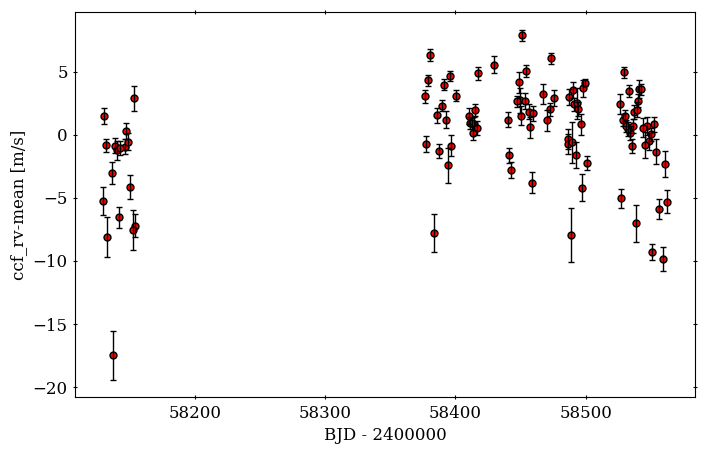

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset4_HR_limpio.bjd - 2400000, 1e3*(dataset4_HR_limpio.ccf_rv-dataset4_HR_limpio.ccf_rv.mean()), 'o',
         ms=5.0, mfc='red', mec='black')
plt.errorbar(dataset4_HR_limpio.bjd - 2400000, 1e3*(dataset4_HR_limpio.ccf_rv-dataset4_HR_limpio.ccf_rv.mean()),
             yerr=dataset4_HR_limpio.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv-mean [m/s]', fontsize=12)
plt.show()

In [ ]:
columnas_no = ['file_ccf','target','date_start','date_end','file_e2ds',
               'modo','senti_seeing','colonne 23', 'colonne 24']
dataset4_HR_limpio_drop = dataset4_HR_limpio.drop(labels=columnas_no,axis=1)

In [ ]:
# dataset4_HR_limpio_drop.hist(bins=20,figsize=(16,30),grid=False)
# plt.show()

In [ ]:
# las features de SENTI tienen ~mitad de valores malos
# pres2 tiene cerca de 50 valores nulos

In [ ]:
# dataset4_HR_limpio_drop.hist(figsize=(30,30))

In [ ]:
cols = ['guid_sky_level', 'senti_tciel', 'senti_text', 'senti_mag', 'senti_humi', 'temp1_min',
        'temp1_max', 'temp3_min', 'temp3_max', 'pres2_min', 'pres2_max', 'pres1_min', 'pres1_max']
for i in cols:
  print(i, len(dataset4_HR_limpio_drop[(dataset4_HR_limpio_drop[i]==0) | (dataset4_HR_limpio_drop[i]==9999)]))

guid_sky_level 0
senti_tciel 46
senti_text 46
senti_mag 46
senti_humi 46
temp1_min 0
temp1_max 0
temp3_min 0
temp3_max 0
pres2_min 56
pres2_max 56
pres1_min 0
pres1_max 0


## Feature engineering

In [ ]:
dataset4_HR_limpio_drop.loc[dataset4_HR_limpio_drop.guid_sky_level <= 0, 'guid_sky_level'] = 0
cleaning = dataset4_HR_limpio_drop.replace(to_replace={'guid_sky_level':0}, value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(cleaning)
X_7 = imputer.transform(cleaning)
dataset4_HR_limpio_22 = pd.DataFrame(X_7, columns=dataset4_HR_limpio_drop.columns,index=dataset4_HR_limpio_drop.index)
dataset4_new = dataset4_HR_limpio_22.copy()
dataset4_HR_limpio_2 = dataset4_HR_limpio_22.copy()

In [ ]:
# drop los que no van
# para correlaciones de la tesis
tforcorr4 = dataset4_HR_limpio_2['ccf_rv']-dataset4_HR_limpio_2['ccf_rv'].mean()
forcorr4 = dataset4_HR_limpio_2.drop(labels=['ccf_rv', 'pres2_min', 'pres2_max', 'senti_text', 'senti_humi', 'senti_tciel', 'senti_mag', 'ccf_rv_error'], axis=1)

# plt.figure(figsize=(10,10))
# sns.heatmap(forcorr.corr(), annot=False, xticklabels=True, yticklabels=True, cmap='coolwarm')
# #plt.savefig('drive/MyDrive/Tesis/features_corr.png', dpi=400, bbox_inches='tight')

In [ ]:
# print(len(dataset4_HR_limpio_2))
# dataset4_HR_limpio_2 = dataset4_HR_limpio_2.loc[dataset4_HR_limpio_2['senti_humi'] < 1000]
# print(len(dataset4_HR_limpio_2))
# dataset4_HR_limpio_2 = dataset4_HR_limpio_2.loc[dataset4_HR_limpio_2['senti_tciel'] < 1000]
# print(len(dataset4_HR_limpio_2))

In [ ]:
# columnas que van a reemplazar a las max
temp1 = dataset4_HR_limpio_2.temp1_max-dataset4_HR_limpio_2.temp1_min
temp2 = dataset4_HR_limpio_2.temp3_max-dataset4_HR_limpio_2.temp3_min
temp3 = dataset4_HR_limpio_2.pres1_max-dataset4_HR_limpio_2.pres1_min
temp4 = dataset4_HR_limpio_2.pres2_max-dataset4_HR_limpio_2.pres2_min
temp5 = dataset4_HR_limpio_2.airm_end-dataset4_HR_limpio_2.airm_start
# hago el reemplazo pero en una copia del dataframe
dataset4_final = dataset4_HR_limpio_2.copy()
dataset4_final.temp1_max = temp1
dataset4_final.temp3_max = temp2
dataset4_final.pres1_max = temp3
dataset4_final.pres2_max = temp4
dataset4_final.airm_end = temp5
# y modifico los nombres de esas columnas
dataset4_final.rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'},inplace=True)
# NO CORRER DOS VECES
log_sky=np.log(dataset4_final['guid_sky_level'])
dataset4_final['guid_sky_level'] = log_sky

In [ ]:
# nuevas nuevas
dataset4_final['sn0/2'] = dataset4_final['cal_ext_sn0']/dataset4_final['cal_ext_sn2']
dataset4_final['sn7-8'] = dataset4_final['cal_ext_sn7'] - dataset4_final['cal_ext_sn8']
dataset4_final['sn14/16'] = dataset4_final['cal_ext_sn14']/dataset4_final['cal_ext_sn16']
dataset4_final['sn0-1'] = dataset4_final['cal_ext_sn0']-dataset4_final['cal_ext_sn1']
dataset4_final['sn8/9'] = dataset4_final['cal_ext_sn8']/dataset4_final['cal_ext_sn9']
dataset4_final['sn6-4'] = dataset4_final['cal_ext_sn6']-dataset4_final['cal_ext_sn4']
dataset4_final['sn0/27'] = dataset4_final['cal_ext_sn0']/dataset4_final['cal_ext_sn27']

dataset4_final['sn11-2'] = dataset4_final['cal_ext_sn11']-dataset4_final['cal_ext_sn2']
dataset4_final['sn23/12'] = dataset4_final['cal_ext_sn23']/dataset4_final['cal_ext_sn12']
dataset4_final['sn26-37'] = dataset4_final['cal_ext_sn26']-dataset4_final['cal_ext_sn37']
dataset4_final['sn22/34'] = dataset4_final['cal_ext_sn22']/dataset4_final['cal_ext_sn34']
dataset4_final['sn17-19'] = dataset4_final['cal_ext_sn17']-dataset4_final['cal_ext_sn19']
dataset4_final['sn2-8'] = dataset4_final['cal_ext_sn2'] - dataset4_final['cal_ext_sn8']
dataset4_final['sn32/33'] = dataset4_final['cal_ext_sn32']/dataset4_final['cal_ext_sn33']
dataset4_final['sn12/34'] = dataset4_final['cal_ext_sn12']/dataset4_final['cal_ext_sn34']
dataset4_final['sn13-38'] = dataset4_final['cal_ext_sn13'] - dataset4_final['cal_ext_sn38']
dataset4_final['sn5/33'] = dataset4_final['cal_ext_sn5']/dataset4_final['cal_ext_sn33']
dataset4_final['sn30-33'] = dataset4_final['cal_ext_sn30'] - dataset4_final['cal_ext_sn33']
dataset4_final['sn22/33'] = dataset4_final['cal_ext_sn22']/dataset4_final['cal_ext_sn33']
dataset4_final['airm_ratio'] = dataset4_HR_limpio_2['airm_end']/dataset4_HR_limpio_2['airm_start']
dataset4_final.head()

,colonne 2,colonne 3,colonne 4,colonne 5,colonne 6,colonne 7,colonne 8,colonne 9,colonne 10,colonne 11,...,sn22/34,sn17-19,sn2-8,sn32/33,sn12/34,sn13-38,sn5/33,sn30-33,sn22/33,airm_ratio
0,20.424,20.184,18.927,20.484,20.135,17.984,20.459,20.371,20.665,20.216,...,0.843522,-11.178448,-18.830422,1.021275,0.612247,-47.009013,0.493819,-4.035957,0.869557,1.0
1,20.432,20.185,19.759,20.486,20.232,18.076,20.461,20.382,20.666,20.231,...,0.839171,-10.364220,-17.104422,1.021094,0.606776,-44.541304,0.487825,-3.969044,0.866179,1.0
2,20.444,20.188,20.664,20.495,19.944,18.295,20.468,20.402,20.674,20.295,...,0.842375,-10.904341,-16.055509,1.016389,0.610591,-45.721853,0.489018,-4.980919,0.864724,1.0
3,20.433,20.185,20.894,20.490,20.304,18.046,20.465,20.392,20.668,20.250,...,0.840349,-7.938797,-13.387284,1.020629,0.610183,-34.344826,0.492722,-3.582910,0.866824,1.0
4,20.442,20.195,19.075,20.495,19.603,18.310,20.470,20.390,20.678,20.253,...,0.834388,-6.166988,-9.165389,1.015999,0.597481,-27.730269,0.474697,-2.859328,0.856377,1.0


## Features estelares

In [ ]:
# Teff=5657, Fe/H=-0.020 logg=4.480
dataset4_final['teff'] = 5657
dataset4_final['fe/h'] = 0.020
dataset4_final['logg'] = 4.480

In [ ]:
dataset4_final = dataset4_final[dataset_final.columns]

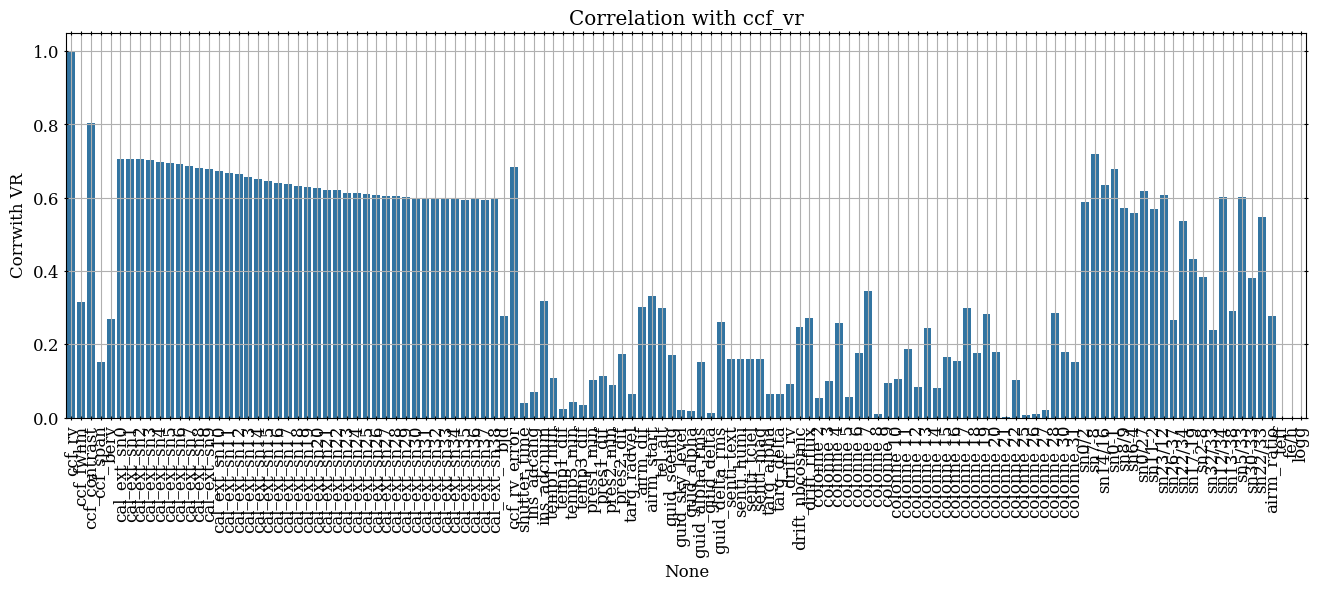

In [ ]:
corr_HR_VR_4 = dataset4_final.corrwith(other=dataset4_final.ccf_rv)
asd4=corr_HR_VR_4.abs()
f, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x=asd4.index, y=asd4.values)
plt.xticks(rotation='vertical')
plt.ylabel('Corrwith VR')
plt.title('Correlation with ccf_vr')
plt.grid(True)
#plt.savefig('drive/MyDrive/Tesis/corr_vr.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
# dataset4_final = remove_outliers(dataset4_final, dataset4_final.drop(labels=columnas_no_1 + columnas_no_2, axis=1).columns, 4)

## Drop final

In [ ]:
dataset4_final_drop = dataset4_final.drop(labels=columnas_no_1 + columnas_no_2,axis=1)
bjd4 = dataset4_final['bjd'] - 2400000

t4 = dataset4_final.ccf_rv
t4 = t4 - t4.mean()
X4 = dataset4_final_drop.copy()

weight4 = (645/103)/(dataset4_final.ccf_rv_error/1e3)**2

# features que quedaron
print(X4.columns)
print(len(X4.columns))
print(len(t4))

Index(['ccf_contrast', 'berv', 'cal_ext_sn7', 'shutter_time', 'ins_adcnum',
       'pres1_dif', 'airm_dif', 'guid_seeing', 'guid_alpha_rms', 'drift_rv',
       'drift_rflux', 'colonne 3', 'colonne 7', 'colonne 16', 'colonne 17',
       'colonne 18', 'colonne 19', 'colonne 25', 'colonne 26', 'colonne 27',
       'colonne 30', 'sn6-4', 'sn17-19', 'sn30-33'],
      dtype='object')
24
103


In [ ]:
# # Split
# w4_train, w4_test = train_test_split(weight4, test_size = 0.2, random_state = 420)
# X4_train, X4_test, t4_train, t4_test = train_test_split(X4, t4, test_size=0.2, random_state=420)
# print(len(X4_train), len(X4_test))
# # para visualizacion
# dataset4_final_train, dataset4_final_test = train_test_split(dataset4_final, test_size=0.2, random_state=420)
# # para visualizar los sets test y train de labels
# plt.plot(t4_train,'o',label='train')
# plt.plot(t4_test,'o',label='test')
# plt.legend(loc='best')
# plt.show()

# Union de datasets

In [ ]:
# tenemos que juntar los X_train, X_test, t_train, t_test, weight
# X_train__ = pd.concat([X_train, X2_train, X4_train])
# X_test_ = pd.concat([X_test, X2_test, X4_test])
# t_train_ = pd.concat([t_train, t2_train, t4_train])
# t_test_ = pd.concat([t_test, t2_test, t4_test])
# w_train_ = pd.concat([w_train, w2_train, w4_train])
# w_test_ = pd.concat([w_test, w2_test, w4_test])

# listo para entrenar
t_ = pd.concat([t, t2, t4], ignore_index=True)
X_ = pd.concat([X, X2, X4], ignore_index=True)
weight_ = pd.concat([weight, weight2, weight4], ignore_index=True)

# # para correlaciones generales
# X_feature = pd.concat([dataset_final_train, dataset2_final_train, dataset4_final_train])
# X_feature_test = pd.concat([dataset_final_test, dataset2_final_test, dataset4_final_test])
# all_feature2 = X_feature.copy()
data1 = dataset_final.copy()
data2 = dataset2_final.copy()
data4 = dataset4_final.copy()
data1['Estrella'] = 'HD 185144'
data2['Estrella'] = 'HD 89269'
data4['Estrella'] = 'HD 9407'
dataset_final_ = pd.concat([data1, data2, data4], ignore_index=True)
# plots para tesis con outliers
rv_originales = pd.concat([dataset_HR, dataset2_HR, dataset4_HR], ignore_index=True)

X_feature = pd.concat([dataset_final, dataset2_final, dataset4_final], ignore_index=True)
dataset_final_['ccf_rv'] = t_*1e3
dataset_final_['bjd'] = dataset_final_['bjd']-2450000

In [ ]:
# esto es para remover todas las muestras que tengan un 5-sigma outlier en los 2 features mas importantes
sigma = 3
t_ = t_[(np.abs(stats.zscore(X_[['drift_rv', 'cal_ext_sn7']])) < sigma).all(axis=1)]
weight_ = weight_[(np.abs(stats.zscore(X_[['drift_rv', 'cal_ext_sn7']])) < sigma).all(axis=1)]
dataset_final_ = dataset_final_[(np.abs(stats.zscore(X_[['drift_rv', 'cal_ext_sn7']])) < sigma).all(axis=1)]
X_feature = X_feature[(np.abs(stats.zscore(X_[['drift_rv', 'cal_ext_sn7']])) < sigma).all(axis=1)]
X_ = X_[(np.abs(stats.zscore(X_[['drift_rv', 'cal_ext_sn7']])) < sigma).all(axis=1)]
len(X_)

635

In [ ]:
print(len(X), len(X2), len(X4), len(X_), len(t_))

375 167 103 635 635


In [ ]:
# junto = pd.concat([X_,t_, weight_], axis=1)

In [ ]:
# Dispersiones iniciales
print((dataset_HR.ccf_rv-dataset_HR.ccf_rv.mean()).std()*1e3)
print((dataset2_HR.ccf_rv-dataset2_HR.ccf_rv.mean()).std()*1e3)
print((dataset4_HR.ccf_rv-dataset4_HR.ccf_rv.mean()).std()*1e3)

9.62025260057732
91.10277633313213
13.25845424072955


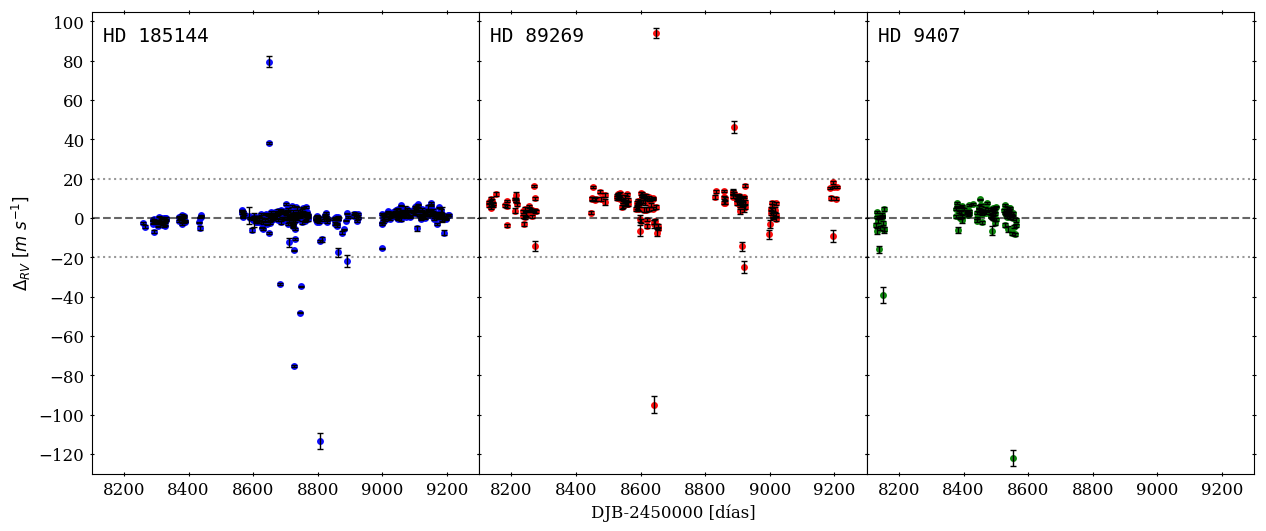

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
plt.subplots_adjust(wspace=0)
axs[0].plot(dataset_HR.bjd -2450000, 1e3*(dataset_HR.ccf_rv-dataset_HR.ccf_rv.mean()), 'o', color='blue', markersize=4, alpha=0.9)
axs[0].errorbar(x=dataset_HR.bjd -2450000, y=1e3*(dataset_HR.ccf_rv-dataset_HR.ccf_rv.mean()), yerr=dataset_HR.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

axs[1].plot(dataset2_HR.bjd -2450000, 1e3*(dataset2_HR.ccf_rv-dataset2_HR.ccf_rv.mean()), 'o', color='red', markersize=4, alpha=0.9)
axs[1].errorbar(x=dataset2_HR.bjd -2450000, y=1e3*(dataset2_HR.ccf_rv-dataset2_HR.ccf_rv.mean()), yerr=dataset2_HR.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

axs[2].plot(dataset4_HR.bjd -2450000, 1e3*(dataset4_HR.ccf_rv-dataset4_HR.ccf_rv.mean()), 'o', color='green', markersize=4, alpha=0.9)
axs[2].errorbar(x=dataset4_HR.bjd -2450000, y=1e3*(dataset4_HR.ccf_rv-dataset4_HR.ccf_rv.mean()), yerr=dataset4_HR.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

axs[0].annotate('HD 185144', xy=(8135,90), fontsize=14, fontfamily='monospace')
axs[1].annotate('HD 89269', xy=(8135,90), fontsize=14, fontfamily='monospace')
axs[2].annotate('HD 9407', xy=(8135,90), fontsize=14, fontfamily='monospace')

axs[0].hlines(0, 8100, 9300, colors='k', linestyles='--', alpha=0.6)
axs[1].hlines(0, 8100, 9300, colors='k', linestyles='--', alpha=0.6)
axs[2].hlines(0, 8100, 9300, colors='k', linestyles='--', alpha=0.6)

axs[0].hlines(-20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)
axs[1].hlines(-20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)
axs[2].hlines(-20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)
axs[0].hlines(20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)
axs[1].hlines(20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)
axs[2].hlines(20, 8100, 9300, colors='k', linestyles=':', alpha=0.4)

axs[0].set_ylim(-130,105)
axs[0].set_xlim(8100, 9300)
axs[0].set(ylabel='$\Delta_{RV} \ [m~s^{-1}]$')
axs[1].set(xlabel='DJB-2450000 [días]')
axs[0].set_yticks(np.arange(-120,101,20))
#plt.savefig('drive/MyDrive/Tesis/original_rvs.png', dpi=400, bbox_inches='tight')
plt.show()

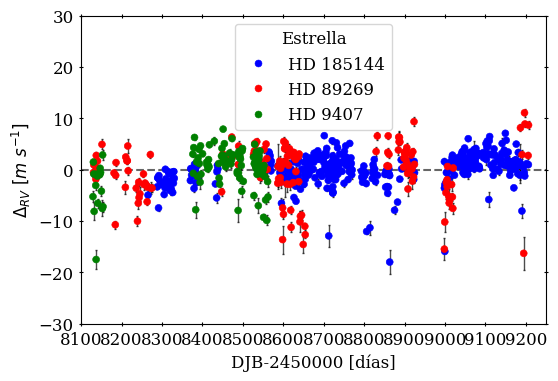

In [ ]:
# plt.rcParams['figure.figsize'] = [15, 6]
# plt.rcParams['figure.dpi'] = 300
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.4)
plt.hlines(0, 8100, 9300, colors='k', linestyles='--', alpha=0.6)
plt.errorbar(dataset_final_.bjd, dataset_final_.ccf_rv, yerr=dataset_final_.ccf_rv_error,
             fmt=' ', ecolor='black', elinewidth=1.0, capsize=1, alpha=0.7, barsabove=False, zorder=-100)
sns.scatterplot(data=dataset_final_, x='bjd', y='ccf_rv', hue='Estrella', marker='o',
                s=25, edgecolor='face', alpha=1.0, legend='brief', palette=['blue', 'red', 'green'], zorder=100)

#plt.title('Conjunto de entrenamiento')
plt.xlabel('DJB-2450000 [días]')
plt.ylabel('$\Delta_{RV} \ [m~s^{-1}]$')
plt.ylim(-30,30)
plt.xlim(8100, 9250)
plt.xticks(np.arange(8100, 9250, 100))
#plt.savefig('drive/MyDrive/Tesis/train_data.png', dpi=400, bbox_inches='tight')
plt.show()

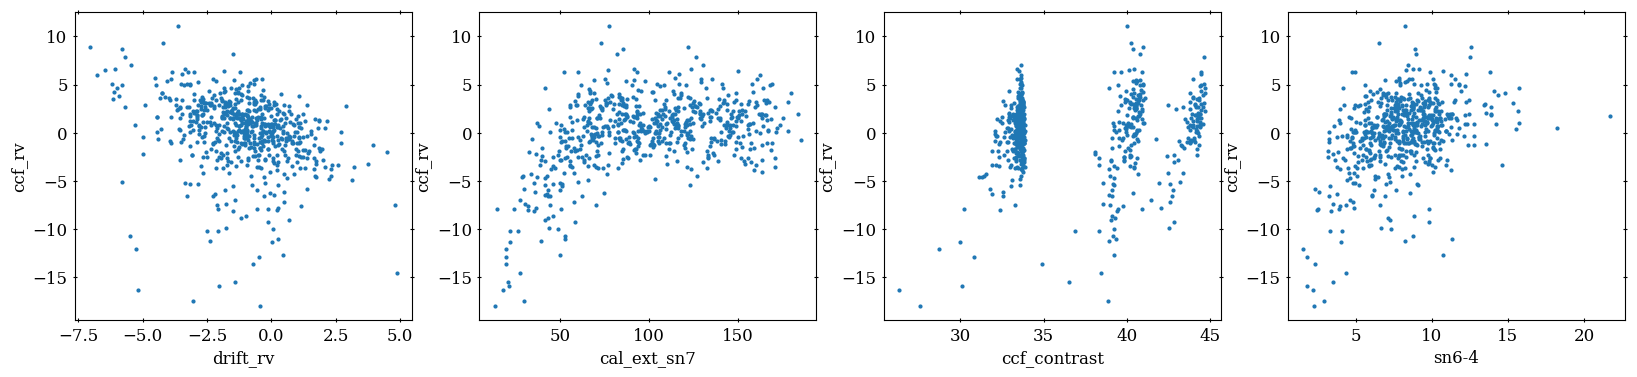

In [ ]:
# plot RVs vs features importantes
fig, axes = plt.subplots(1, 4, figsize=(20,4))
fimpo = ['drift_rv', 'cal_ext_sn7', 'ccf_contrast', 'sn6-4']
for i in range(4):
  axes[i].plot(dataset_final_[fimpo[i]], dataset_final_['ccf_rv'], 'o', ms=2)
  axes[i].set_xlabel(fimpo[i])
  axes[i].set_ylabel('ccf_rv')

In [ ]:
dataset_final_.bjd.max()-2400000

-2390793.37613646

## Correlaciones

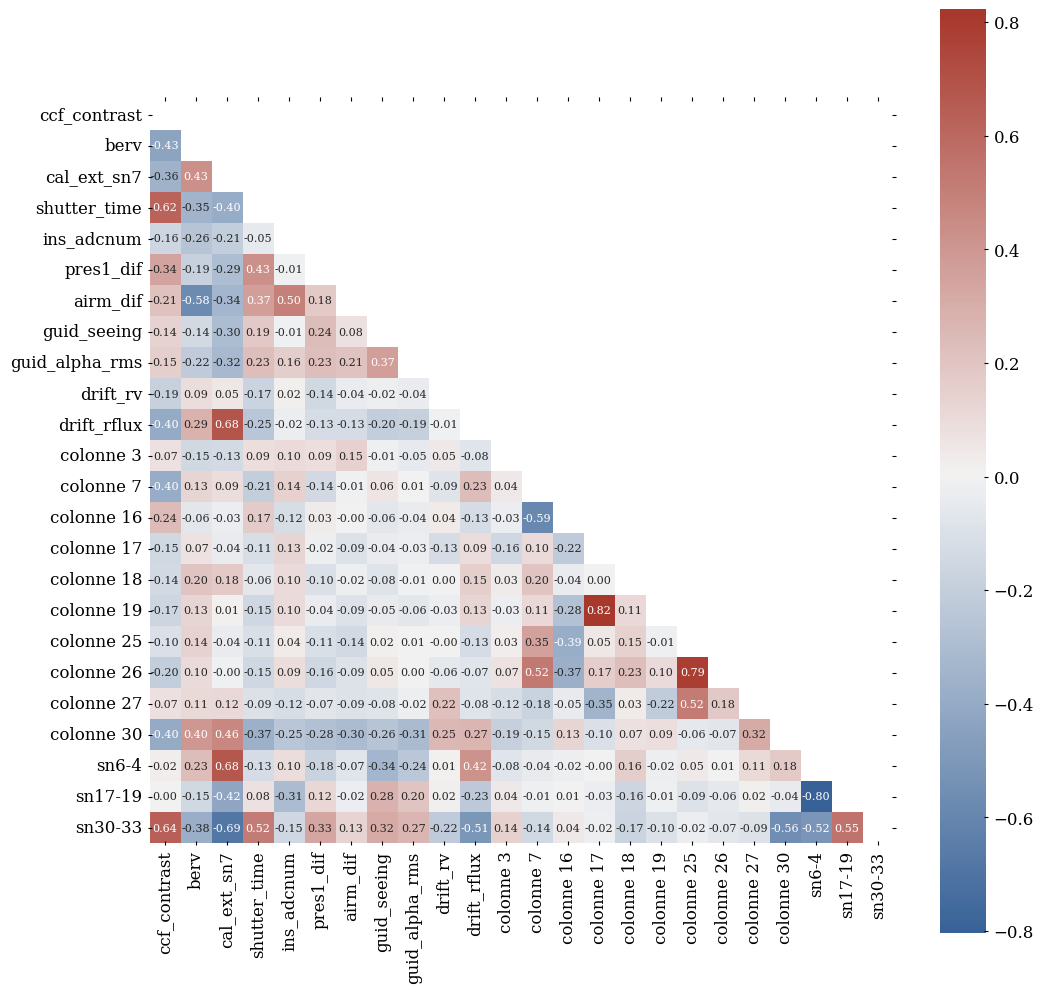

In [ ]:
# plt.rcParams['figure.figsize'] = [6, 6]
# plt.rcParams['figure.dpi'] = 200

# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.4)
fig, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
cor = X_.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap, ax=ax, annot_kws={"size": 8})

plt.show()

In [ ]:
asd = dataset_final_.drop(labels=columnas_no_1+columnas_no_2, axis=1)
# asd = asd[['drift_rv','ccf_contrast','colonne 3','sn22/34','sn0/27','cal_ext_sn7','sn6-4','sn17-19','sn30-33',
#      'colonne 17','colonne 7','colonne 26','sn7-8','drift_rflux','colonne 27', 'colonne 19',
#      'berv','colonne 16','colonne 30','guid_alpha_rms','shutter_time','colonne 18','guid_seeing','colonne 25','pres1_dif','ins_adcnum']]

corr = X_.corrwith(other=t_)
corr = pd.DataFrame(corr)
#corr = dataset_final_.drop(labels=columnas_no_1+columnas_no_2, axis=1).corrwith(other=t_) # solo las que entran
#corr = dataset_final_.drop(labels=['ccf_rv', 'ccf_rv_error'], axis=1).corrwith(other=t_) # TODO 119
print('Pearson')
print(corr[0].abs().sort_values(ascending=False)[0:10])
print('n_features:', len(dataset_final_.columns))

Pearson
cal_ext_sn7    0.435115
sn6-4          0.397740
ins_adcnum     0.331216
airm_dif       0.327354
drift_rv       0.294993
berv           0.274725
drift_rflux    0.228070
sn17-19        0.227756
sn30-33        0.151020
colonne 17     0.140254
Name: 0, dtype: float64
n_features: 127


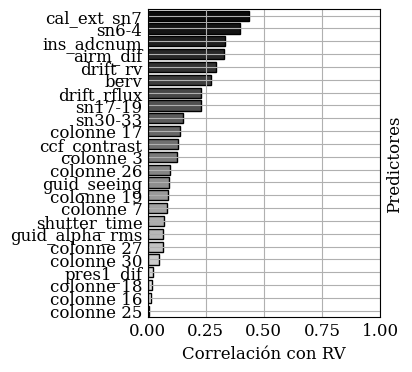

In [ ]:
# plt.rcParams['figure.figsize'] = [4, 8]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : False, 'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False})
# sns.set_context("paper", font_scale=0.8)


a = corr[0].abs()
f, ax = plt.subplots(figsize=(3,4))
sns.barplot(x=a.sort_values(ascending=False).values, y=a.sort_values(ascending=False).index, color='black', edgecolor='k', orient='h', palette='gist_gray', ax=ax)
#plt.xticks(rotation='vertical')
#plt.xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_ylabel('Predictores')
ax.yaxis.set_label_position("right")
plt.xlabel('Correlación con RV')
plt.xlim(0,1)
plt.grid()
ax.tick_params(axis='both', which='both', left=False, bottom=False, top=False, right=False, pad=2)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
#plt.savefig('drive/MyDrive/Tesis/corr_vr_final.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# # PARA TESIS PRIMERA CORRELACION
forcorrfinal = pd.concat([forcorr, forcorr2, forcorr4], ignore_index=True)
tforcorrfinal =pd.concat([tforcorr, tforcorr2, tforcorr4], ignore_index=True)

# plt.figure(figsize=(10,10))
# sns.heatmap(forcorrfinal.corr(), annot=False, xticklabels=True, yticklabels=True, cmap='coolwarm')
# plt.savefig('drive/MyDrive/Tesis/features_corr.png', dpi=400, bbox_inches='tight')

In [ ]:
# CORRELACION CON VR
forcorrfinal2 = forcorrfinal.drop(labels=['cal_ext_sn1', 'cal_ext_sn2', 'cal_ext_sn3', 'cal_ext_sn4',
       'cal_ext_sn5', 'cal_ext_sn6', 'cal_ext_sn7', 'cal_ext_sn8',
       'cal_ext_sn9', 'cal_ext_sn10', 'cal_ext_sn11', 'cal_ext_sn12',
       'cal_ext_sn13', 'cal_ext_sn14', 'cal_ext_sn15', 'cal_ext_sn16',
       'cal_ext_sn17', 'cal_ext_sn18', 'cal_ext_sn19', 'cal_ext_sn20',
       'cal_ext_sn21', 'cal_ext_sn22', 'cal_ext_sn23', 'cal_ext_sn24',
       'cal_ext_sn25', 'cal_ext_sn26', 'cal_ext_sn27', 'cal_ext_sn28',
       'cal_ext_sn29', 'cal_ext_sn30', 'cal_ext_sn31', 'cal_ext_sn32',
       'cal_ext_sn33', 'cal_ext_sn34', 'cal_ext_sn35', 'cal_ext_sn36',
       'cal_ext_sn37', 'cal_ext_sn38'], axis=1)

corr = forcorrfinal2.corrwith(other=tforcorrfinal)
print('Pearson')
print(corr.abs().sort_values(ascending=False)[0:15])

Pearson
cal_ext_sn0    0.417139
airm_end       0.377852
airm_start     0.367846
drift_rv       0.363390
tel_alt        0.346444
ins_adcnum     0.317572
berv           0.258468
drift_rflux    0.208687
bjd            0.193794
colonne 3      0.184660
temp1_max      0.184285
temp1_min      0.183268
pres1_max      0.152154
pres1_min      0.151930
colonne 22     0.146905
dtype: float64


In [ ]:
# plt.rcParams['figure.figsize'] = [8, 12.5]
# plt.rcParams['figure.dpi'] = 300

# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.4)

In [ ]:
# # CORRELACION DE LAS SN CON VR PARA CADA ESTRELLA
# lab = ['ccf_fwhm', 'ccf_contrast', 'ccf_span', 'berv',
#        'bjd', 'shutter_time', 'ins_adcang',
#        'ins_adcnum', 'temp1_min', 'temp1_max', 'temp3_min', 'temp3_max',
#        'pres1_min', 'pres1_max', 'targ_radvel', 'airm_end', 'airm_start',
#        'tel_alt', 'guid_seeing', 'guid_sky_level', 'guid_alpha',
#        'guid_alpha_rms', 'guid_delta', 'guid_delta_rms', 'targ_alpha',
#        'targ_delta', 'drift_rv', 'drift_nbcosmic', 'drift_rflux', 'colonne 2',
#        'colonne 3', 'colonne 4', 'colonne 5', 'colonne 6', 'colonne 7',
#        'colonne 8', 'colonne 9', 'colonne 10', 'colonne 11', 'colonne 12',
#        'colonne 13', 'colonne 14', 'colonne 15', 'colonne 16', 'colonne 17',
#        'colonne 18', 'colonne 19', 'colonne 20', 'colonne 21', 'colonne 22',
#        'colonne 25', 'colonne 26', 'colonne 27', 'colonne 28', 'colonne 30',
#        'colonne 31']
# color1 = forcorr.drop(labels=lab, axis=1)
# color2 = forcorr2.drop(labels=lab, axis=1)
# color4 = forcorr4.drop(labels=lab, axis=1)

# fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
# plt.subplots_adjust(wspace=0)
# corr_1 = color1.corrwith(other=tforcorr).abs()
# corr_2 = color2.corrwith(other=tforcorr2).abs()
# corr_4 = color4.corrwith(other=tforcorr4).abs()

# axs[0].bar(corr_2.index, corr_2.values, color='red', edgecolor='k')
# axs[1].bar(corr_4.index, corr_4.values, color='green', edgecolor='k')
# axs[2].bar(corr_1.index, corr_1.values, color='blue', edgecolor='k')
# axs[0].set_ylim(0,1)
# axs[0].set_ylabel('Pearson')
# axs[0].set_xticks(['cal_ext_sn0', 'cal_ext_sn2',
#        'cal_ext_sn4', 'cal_ext_sn6',
#        'cal_ext_sn8', 'cal_ext_sn10',
#        'cal_ext_sn12', 'cal_ext_sn14',
#        'cal_ext_sn16', 'cal_ext_sn18',
#        'cal_ext_sn20', 'cal_ext_sn22',
#        'cal_ext_sn24', 'cal_ext_sn26',
#        'cal_ext_sn28', 'cal_ext_sn30',
#        'cal_ext_sn32', 'cal_ext_sn34',
#        'cal_ext_sn36', 'cal_ext_sn38'])
# axs[0].set_xticklabels(['sn0', 'sn2', 'sn4', 'sn6', 'sn8', 'sn10', 'sn12', 'sn14', 'sn16', 'sn18', 'sn20',
#                           'sn22', 'sn24', 'sn26', 'sn28', 'sn30', 'sn32', 'sn34', 'sn36', 'sn38'])
# axs[0].tick_params(axis='x', which='both', labelrotation=90)
# axs[1].tick_params(axis='both', which='both', labelrotation=90, right=False, left=False, top=False, bottom=True)
# axs[2].tick_params(axis='both', which='both', labelrotation=90, right=False, left=False, top=False, bottom=True)

# axs[0].annotate('HD 89269', xy=('cal_ext_sn0', 0.9), fontsize=14, fontfamily='monospace')
# axs[0].annotate('G4 V', xy=('cal_ext_sn0', 0.85), fontsize=14, fontfamily='monospace')

# axs[1].annotate('HD 9407', xy=('cal_ext_sn0', 0.9), fontsize=14, fontfamily='monospace')
# axs[1].annotate('G6.5 V', xy=('cal_ext_sn0', 0.85), fontsize=14, fontfamily='monospace')

# axs[2].annotate('HD 185144', xy=('cal_ext_sn0', 0.9), fontsize=14, fontfamily='monospace')
# axs[2].annotate('K0 V', xy=('cal_ext_sn0', 0.85), fontsize=14, fontfamily='monospace')
# #plt.savefig('drive/MyDrive/Tesis/SNR_correlations.png', dpi=400, bbox_inches='tight')
# plt.show()

## VIF

In [ ]:
from utils import vif
# La funcion VIF la corro sobre el X_train
columns = X_.columns
X_vif = pd.DataFrame(X_, columns=columns)
# aplico vif a los datos de train y lo guardo en result
result = vif(X_vif)

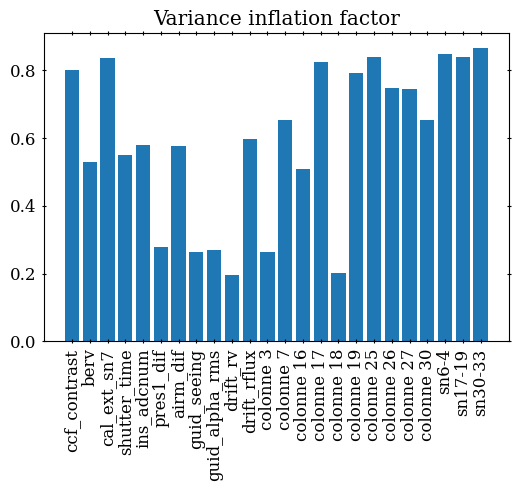

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Variance inflation factor')
keys = result[0].keys()
values = result[0].values()
plt.bar(keys, values)
plt.xticks(rotation='vertical')
#plt.xlim(37,96)
plt.show()

In [ ]:
count = 0
for v,k in zip(values, keys):
  if v > 0.90:
    print(k,' = ', v)
    count += 1
print('total =', count)

total = 0


In [ ]:
correlaciones = {}
for i,k in zip(result[1].keys(),result[1].values()):
  index=np.argsort(np.abs(result[1][i][1]))[::-1]
  correlaciones[i] = [result[1][i][0][index], result[1][i][1][index]]

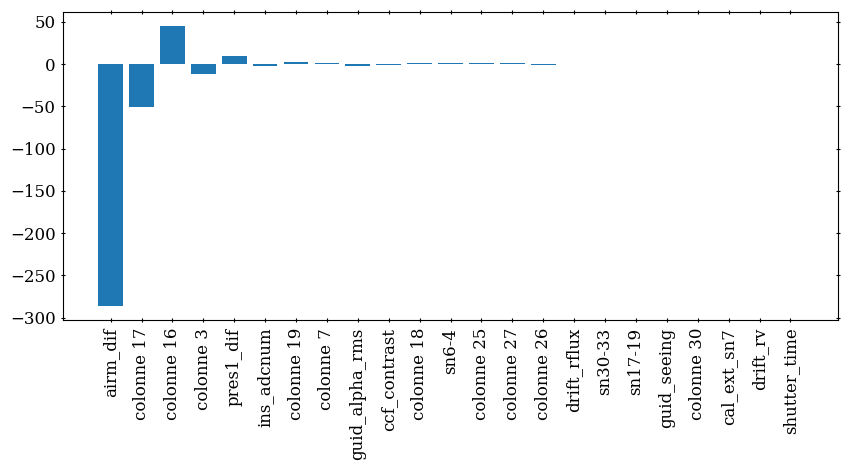

In [ ]:
feature='berv'
plt.figure(figsize=(10,4))
plt.bar(correlaciones[feature][0], correlaciones[feature][1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def check_vif(X, feature, limite):
    X_nuevo = pd.concat([X, feature], axis=1)
    vifs = vif(X_nuevo)
    keys = vifs[0].keys()
    values = vifs[0].values()
    salida = {}
    count = 0
    for v,k in zip(values, keys):
        if v > limite:
            count += 1
            salida[k] = v
    if count >= 2:
        return print('No agregar el feature:  (VIF > '+str(limite)+')', salida)
    else:
        return print('Se puede agregar')

# for i in columnas_no_2:
#   check_vif(X_,X_feature[i],0.85)

In [ ]:
#check_vif(X_, dataset_final_['colonne 10'], 0.86)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# NO CORRER DOS VECES
scaler = StandardScaler()
#scaler = RobustScaler()
X_train_ = scaler.fit_transform(X_)
print(len(X_train_))
# X_test_ = scaler.transform(X_test_)
#scaler.scale_

635


In [ ]:
# # queremos saber el coeficiente de escala del drift_rv
# print(scaler.feature_names_in_[8])
# print(scaler.scale_[8])

# **Entrenamiento de algoritmos**

## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# # final TESIS
# params = {'n_estimators': 700,
#           'learning_rate': 0.09,
#           'max_depth': 3,
#           'max_features': 11,
#           'min_samples_split': 5,
#           'min_samples_leaf': 1,
#           'validation_fraction': 0.1,
#           'n_iter_no_change': 5,
#           'subsample': 0.83,
#           'tol': 1e-10,
#           'random_state': 10
#           }

# nueva prueba porque saqué outliers en drift_rv y sn7
params = {'n_estimators': 700,
          'learning_rate': 0.09,
          'max_depth': 4,
          'max_features': 7,
          'min_samples_split': 2,
          'min_samples_leaf': 1,
          'validation_fraction': 0.1,
          'n_iter_no_change': 5,
          'subsample': 0.83,
          'tol': 1e-10,
          'random_state': 10
          }

gradb = GradientBoostingRegressor(**params)
gradb.fit(X_train_, t_, sample_weight=weight_)
y_train = gradb.predict(X_train_)

print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
print('labels(std) : {:.4f} m/s'.format(1e3*t_.std()))
print('SCORE [R2]: {:.3f}'.format(gradb.score(X_train_,t_,sample_weight=weight_)))

RMSE (train): 1.3284 m/s
WRMSE (train): 1.0768 m/s
labels(std) : 3.7707 m/s
SCORE [R2]: 0.874


In [ ]:
print(y_train.mean()*1e3, y_train.std()*1e3)

-0.005225398047550833 3.106758711112377


In [ ]:
print('n_estimators:', gradb.n_estimators_)

n_estimators: 63


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold

cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

predict = cross_val_score(gradb, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error', fit_params={'sample_weight':weight_})
#predict2 = cross_val_score(gradb, X_train_, t_, cv=cvs, scoring='r2', fit_params={'sample_weight':weight_})

print('wrmse:', np.sqrt(-np.mean(predict))*1e3)
print(np.sqrt(-predict.min())*1e3, np.sqrt(-predict.max())*1e3)
print(np.sqrt(-predict)*1e3)

# print('r2:', np.mean(predict2))
# print(predict2.min(), predict2.max())

wrmse: 2.220116803470811
2.646969036893372 1.7511021896328651
[1.75110219 2.18815095 2.64696904 2.10552084 2.63235384 1.90687087
 2.15475301]


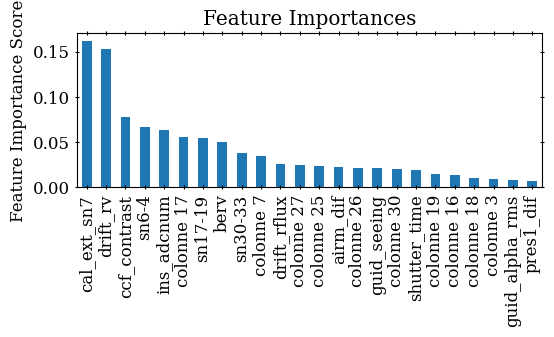

In [ ]:
plt.figure(figsize=(6,2))
feat_imp = pd.Series(gradb.feature_importances_, X_.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
importantes = list(feat_imp.keys())[:5]

In [ ]:
# #ultimo
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

# gradb = GradientBoostingRegressor(random_state=10)
# param_grid = {
#               'n_estimators': [700],
#               'learning_rate': [0.05, 0.07, 0.09, 1.0, 1.2, 1.4, 1.6],
#               'loss': ['squared_error'],
#               'min_samples_split': [2, 5], #[2], #[0.23],
#               'min_samples_leaf':  [1, 2],
#               'max_depth': [2, 3, 4], #[2,3,4], #[2,3,4,5],
#               'subsample': [0.83, 1.0],
#               'validation_fraction': [0.1],
#               'n_iter_no_change': [5],
#               'max_features':  [5, 7, 11, 13, 'auto'], #, 5, 7, 11, 13, 17, 21], #, 15, 17, 21, 23, 25, 'auto'],
#               'tol': [1e-10]
#               #'ccp_alpha': np.arange(0,0.05,0.001)
#               }

# gradb_s = GridSearchCV(gradb, param_grid, cv=cvs, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)
# gradb_s.fit(X_train_, t_, sample_weight=weight_)
# print(gradb_s.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, gradb_s.predict(X_train_),sample_weight=weight_))))
# print('best score:', 1e3*(np.sqrt(-gradb_s.best_score_)))

In [ ]:
# params = {'n_estimators': 700,
#           'learning_rate': 0.09,
#           'max_depth': 3,
#           'max_features': 11,
#           'min_samples_split': 5,
#           'min_samples_leaf': 1,
#           'validation_fraction': 0.1,
#           'n_iter_no_change': 5,
#           'subsample': 0.83,
#           'tol': 1e-10,
#           'random_state': 10
#           }


In [ ]:
# #ultimo? ultimo?
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

# gradb = GradientBoostingRegressor(random_state=10)
# param_grid = {
#               'n_estimators': [100],
#               'learning_rate': [0.1],
#               'loss': ['squared_error'],
#               'min_samples_split': [3],
#               'min_samples_leaf':  [30],
#               'max_depth': [2,3,4],
#               'subsample': [1.0],
#               'validation_fraction': [0.1],
#               'n_iter_no_change': [None],
#               'max_features':  ['sqrt'],
#               'tol': [1e-10]
#               }

# gradb_s = GridSearchCV(gradb, param_grid, cv=cvs, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)
# gradb_s.fit(X_train_, t_, sample_weight=weight_)
# print(gradb_s.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, gradb_s.predict(X_train_),sample_weight=weight_))))
# print('best score:', 1e3*(np.sqrt(-gradb_s.best_score_)))

## Polynomial GB

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(interaction_only=True, degree=2)

# params = {'n_estimators': 200,
#           'learning_rate': 0.08,
#           'max_depth': 4,
#           'max_features': 11,
#           'min_samples_split': 2,
#           'min_samples_leaf': 5,
#           'validation_fraction': 0.1,
#           'n_iter_no_change': 5,
#           'subsample': 0.83,
#           'tol': 1e-10,
#           'random_state': 10
#           }


# gradb = GradientBoostingRegressor(**params)

# X_train_poly = poly.fit_transform(X_train_)
# gradb.fit(X_train_poly, t_, sample_weight=weight_)

# y_train = gradb.predict(X_train_poly)

# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('labels(std) : {:.4f} m/s'.format(1e3*t_.std()))
# print('SCORE [R2]: {:.3f}'.format(gradb.score(X_train_poly,t_,sample_weight=weight_)))


In [ ]:
# print(y_train.mean()*1e3, y_train.std()*1e3)
# print('n_estimators:', gradb.n_estimators_)

In [ ]:
# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

# modelo = Pipeline([('poly', PolynomialFeatures(interaction_only=True, degree=2)),
#                     ('regression', GradientBoostingRegressor(**params))
#                     ])

# predict = cross_val_score(modelo, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error')
# #predict = cross_val_score(modelo, X_train_, t_, cv=cvs)
# print(np.sqrt(-np.mean(predict))*1e3)
# print(np.sqrt(-predict.min())*1e3, np.sqrt(-predict.max())*1e3)
# print(np.sqrt(-predict)*1e3)

In [ ]:
# plt.figure(figsize=(6,2))
# feat_imp = pd.Series(gradb.feature_importances_, poly_names).sort_values(ascending=False)
# feat_imp[:8].plot(kind='bar', figsize=(4,2))
# plt.ylabel('Feature Importance Score')
# importantes = list(feat_imp.keys())[:8]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=7)

# modelo = Pipeline([('poly', PolynomialFeatures()),
#                     ('regression', GradientBoostingRegressor(random_state=10))
#                     ])
# param_grid = {'poly__degree': [2], 'poly__interaction_only': [True],
#               'regression__n_estimators': [200],
#               'regression__learning_rate': [0.05, 0.08, 1, 1.1, 1.3],
#               'regression__loss': ['squared_error'],
#               'regression__min_samples_split': [1, 2, 3],
#               'regression__min_samples_leaf':  [5, 10, 15, 20, 30, 40],
#               'regression__max_depth': [2,3,4],
#               'regression__subsample': [1.0],
#               'regression__validation_fraction': [0.1],
#               'regression__n_iter_no_change': [None],
#               'regression__max_features':  ['sqrt'],
#               'regression__tol': [1e-10]}


# gradb_s = GridSearchCV(modelo, param_grid, cv=skf.split(X_train_, dataset_final_.teff), n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', return_train_score=True)
# gradb_s.fit(X_train_, t_, regression__sample_weight=weight_)
# print(gradb_s.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, gradb_s.predict(X_train_),sample_weight=weight_))))
# print('best score:', 1e3*(np.sqrt(-gradb_s.best_score_)))

## **Polynomial LassoLars Regression**

In [ ]:
# Lasso Lars
from sklearn.linear_model import LinearRegression, HuberRegressor, LassoLars
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, degree=2)
pr = LassoLars(fit_intercept=False, alpha=6.508504252126063e-05)

X_train_poly = poly.fit_transform(X_train_)
pr.fit(X_train_poly, t_)
y_train = pr.predict(X_train_poly)
print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
print('SCORE [R2]: {:.3f}'.format(pr.score(X_train_poly,t_, sample_weight=weight_)))  # R2 scoring
print('Dispersion del set:', (1e3*t_).std())

RMSE (train): 1.7977 m/s
WRMSE (train): 1.6137 m/s
SCORE [R2]: 0.717
Dispersion del set: 3.7707426842482468


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

modelo = Pipeline([('poly', PolynomialFeatures(interaction_only=True, degree=2)),
                    ('regression', LassoLars(fit_intercept=False, alpha=7.1863e-5))
                    ])

predict = cross_val_score(modelo, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error')
#predict = cross_val_score(modelo, X_train_, t_, cv=cvs)
print(np.sqrt(-np.mean(predict))*1e3)
print(np.sqrt(-predict.min())*1e3, np.sqrt(-predict.max())*1e3)
print(np.sqrt(-predict)*1e3)

2.325626643411714
2.7079112490708144 1.7875453929296676
[1.78754539 2.62675995 2.70791125 2.04330716 2.66234001 1.79457159
 2.43888492]


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=7)
# modelo = Pipeline([('poly', PolynomialFeatures()),
#                     ('regression', LassoLars(fit_intercept=False))
#                     ])

# params = {'poly__degree': [2], 'poly__interaction_only': [True], 'regression__alpha': np.linspace(0.000001,0.0001,2000)}

# lasso_gs = GridSearchCV(modelo, params, cv=skf.split(X_train_, dataset_final_.teff), verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# lasso_gs.fit(X_train_, t_)
# print(lasso_gs.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, lasso_gs.predict(X_train_), sample_weight=weight_))))
# print(1e3*np.sqrt(-lasso_gs.best_score_))

In [ ]:
# Veamos qué selección de features hace el lasso
poly_names = poly.get_feature_names_out(X_.columns)
coef = pr.coef_
lasso_coef = {}
for i,j in zip(poly_names,coef):
  if abs(j)>1e-4:
    lasso_coef[i] = abs(j)
    #print(i)
print(len(lasso_coef))

40


In [ ]:
print(lasso_coef.keys())

dict_keys(['1', 'ccf_contrast', 'berv', 'cal_ext_sn7', 'ins_adcnum', 'drift_rv', 'colonne 7', 'colonne 26', 'sn6-4', 'ccf_contrast shutter_time', 'ccf_contrast ins_adcnum', 'ccf_contrast colonne 25', 'ccf_contrast colonne 30', 'ccf_contrast sn30-33', 'berv cal_ext_sn7', 'berv colonne 7', 'berv colonne 18', 'berv colonne 30', 'berv sn17-19', 'cal_ext_sn7 ins_adcnum', 'cal_ext_sn7 airm_dif', 'cal_ext_sn7 sn6-4', 'cal_ext_sn7 sn30-33', 'shutter_time colonne 26', 'shutter_time sn6-4', 'ins_adcnum colonne 7', 'ins_adcnum sn17-19', 'pres1_dif colonne 18', 'pres1_dif sn6-4', 'airm_dif colonne 7', 'airm_dif sn17-19', 'guid_seeing guid_alpha_rms', 'guid_alpha_rms colonne 17', 'guid_alpha_rms sn17-19', 'colonne 7 colonne 26', 'colonne 17 colonne 19', 'colonne 19 colonne 26', 'colonne 26 colonne 27', 'colonne 27 colonne 30', 'sn6-4 sn30-33'])


In [ ]:
# ordenemoslos de mayor a menor
sorted_coef = dict(sorted(lasso_coef.items(), key=lambda item: item[1], reverse=True))
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))
sort = take(10, sorted_coef.items())
sort

[('drift_rv', 0.0009871491419609865),
 ('cal_ext_sn7', 0.0009310035187779375),
 ('berv cal_ext_sn7', 0.0009161089856208965),
 ('ccf_contrast sn30-33', 0.0007857134766506575),
 ('berv sn17-19', 0.0006316872721229111),
 ('cal_ext_sn7 sn6-4', 0.0005817069895282155),
 ('ccf_contrast colonne 30', 0.0005194203826950724),
 ('cal_ext_sn7 ins_adcnum', 0.0004910550385604325),
 ('sn6-4', 0.0004134006951769622),
 ('berv colonne 7', 0.00040184539192059126)]

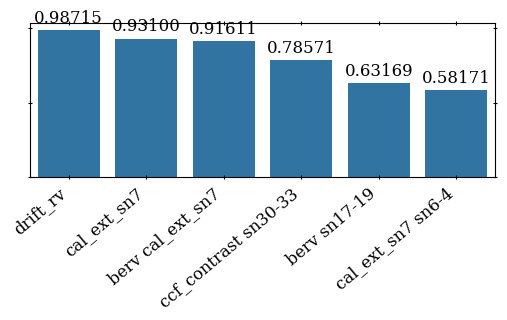

In [ ]:
#sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(6,2))
ax = sns.barplot(x=list(sorted_coef.keys())[0:6], y=list(sorted_coef.values())[0:6])
for p in ax.patches:
  ax.annotate(format(p.get_height()*1000, '.5f'),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha='center', va='center',
              xytext=(0,9),
              textcoords='offset points')
ax.set(yticklabels=[])
#ax.set_ylim(0,0.0016)
plt.xticks(rotation='vertical')
# plt.yscale('log')
# ax.set_yticklabels([4e-4,6e-4,1e-3])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.savefig('drive/MyDrive/Tesis/coeficientes_lasso.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
print(pr.n_iter_)
#print(pr.n_features_in_)
print(poly.n_output_features_)

94
301


## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# #rfr = RandomForestRegressor(n_estimators=156, max_depth=13, max_leaf_nodes=15, random_state=40)
# #rfr = RandomForestRegressor(n_estimators=162, max_depth=15, max_leaf_nodes=10, random_state=40)
# rfr = RandomForestRegressor(random_state=40)

# rfr.fit(X_train_, t_, sample_weight=weight_)
# y_train_ = rfr.predict(X_train_)

# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train_))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train_, sample_weight=weight_))))
# print('labels(std) : {:.4f} m/s'.format(1e3*t_.std()))
# print('SCORE [R2]: {:.3f}'.format(rfr.score(X_train_, t_,sample_weight=weight_))) #R2 scoring

In [ ]:
# plt.figure(figsize=(10,3))
# feat_imp = pd.Series(rfr.feature_importances_, X_.columns).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Feature Importances in RANDOM FOREST')
# plt.ylabel('Feature Importance Score')
# #plt.savefig('drive/MyDrive/Tesis/feature_importances_rfr.png',dpi=400,bbox_inches='tight')
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# #max depth y max_leaf_nodes no van juntos, probar variando ambos por separado
# rf = RandomForestRegressor()
# param_grid = {'n_estimators': [162],
#               'max_depth': [15],
#               'min_samples_leaf': [1],
#               'min_samples_split': [2],
#               'max_features': ['auto'],
#               'max_leaf_nodes': [None],
#               'bootstrap': [True],
#               'random_state': [40]
#               }

# # rfgs = GridSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring=neg_wmse_train)
# rfgs = GridSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# rfgs.fit(X_train_, t_train_, sample_weight=w_train_)
# print(rfgs.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, rfgs.predict(X_train_),sample_weight=w_train_))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, rfgs.predict(X_test_),sample_weight=w_test_))))
# print('CV SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-rfgs.best_score_)))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# random_grid = {'n_estimators': randint(100,500),
#                'max_features': ['auto','sqrt'],
#                'max_depth': randint(2,100),
#                'min_samples_split': randint(2,10),
#                'bootstrap': [True, False],
#                'min_samples_leaf': randint(1,10)}

# rf = RandomForestRegressor(random_state=42)
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
#                                cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# rf_random.fit(X_train,t_train)
# print(rf_random.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, rf_random.predict(X_train)))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, rf_random.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-rf_random.score(X_test,t_test))))

## Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression(fit_intercept=False).fit(X_train_, t_, sample_weight=weight_)

# y_train = reg.predict(X_train_)
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(reg.score(X_train_,t_,sample_weight=weight_)))

In [ ]:
# len(X_train_)

## Extra Trees

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor

# extra = ExtraTreesRegressor(random_state=42)
# # extra = ExtraTreesRegressor(bootstrap=True, max_samples=408, n_estimators=190, max_leaf_nodes=16,
# #                             max_depth=9, min_samples_leaf=1, min_samples_split=3, random_state=42)

# extra.fit(X_train_, t_train_, sample_weight=w_train_)
# y_train = extra.predict(X_train_)
# y_test =  extra.predict(X_test_)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, y_train))))
# print('RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, y_test))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, y_train, sample_weight=w_train_))))
# print('WRMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, y_test, sample_weight=w_test_))))
# print('labels(std) : {:.4f} m/s'.format(1e3*t_.std()))
# print('SCORE [R2]: {:.3f}'.format(extra.score(X_test_, t_test_,sample_weight=w_test_))) # R2 scoring

In [ ]:
# from sklearn.model_selection import GridSearchCV

# extra_reg = ExtraTreesRegressor()
# param_grid = [{'n_estimators': [190],
#                'bootstrap': [True],
#                'max_features': ['auto'],
#                'max_samples': [408],
#                'max_depth': [9],
#                'min_samples_split': [3],
#                'min_samples_leaf': [1],
#                'max_leaf_nodes': np.arange(90,110),
#                'random_state': [42]
#                }]

# gset = GridSearchCV(extra_reg, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# gset.fit(X_train_, t_train_, sample_weight=w_train_)
# print(gset.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, gset.predict(X_train_),sample_weight=w_train_))))
# print('Best WRMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, gset.predict(X_test_),sample_weight=w_test_))))
# print('CV SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-gset.best_score_)))


## **XGBOOST**

In [ ]:
# import xgboost
# from xgboost import XGBRegressor
# # to control overfitting: max_depth, min_child_weight, min_split_loss
# # xgb_model = XGBRegressor(objective="reg:squarederror", booster='gbtree', colsample_bytree=0.86,
# #                              learning_rate=0.05, max_depth=1, min_child_weight=1, min_split_loss=1e-6,
# #                              reg_alpha=0, reg_lambda=1, subsample=0.81, n_estimators=200,
# #                               colsample_bynode=1, colsample_bylevel=1, random_state=42)
# xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# xgb_model.fit(X_train_, t_, eval_metric='rmse', verbose=False, sample_weight=weight_)


# y_train = xgb_model.predict(X_train_)
# # y_test = xgb_model.predict(X_test_)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('WRMSE (train) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(xgb_model.score(X_train_, t_, sample_weight=weight_)))

In [ ]:
# from sklearn.model_selection import cross_val_predict, cross_val_score
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=3)
# predict = cross_val_score(xgb_model, X_train_, t_, cv=skf.split(X_, dataset_final_.teff), scoring='neg_mean_squared_error', fit_params={'sample_weight':weight_})
# print(np.sqrt(-np.mean(predict))*1e3)

In [ ]:
# print(xgb_model)

In [ ]:
# eval_result = xgb_model.evals_result()
# x_axis = range(0,len(eval_result['validation_0']['rmse']))
# plt.plot(x_axis, np.asarray(eval_result['validation_0']['rmse'])*1000, label='Train')
# plt.plot(x_axis, np.asarray(eval_result['validation_1']['rmse'])*1000, label='Test')
# plt.ylabel('RMSE [m/s]')
# plt.xlabel('iterations')
# plt.ylim(1,4)
# #plt.xlim(50,200)
# plt.title('XGBoost RMSE')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=5)
# xgb_reg = XGBRegressor()
# params = {'min_child_weight': [1],
#           'booster': ['gbtree'],
#           'objective': ['reg:squarederror'],
#           'n_estimators': [200],
#           'learning_rate': [0.05],
#           'reg_lambda': [1],
#           'reg_alpha': [0],
#           'min_split_loss': [1e-6],
#           'subsample': [0.81],
#           'colsample_bytree': [0.86],
#           'colsample_bynode': [1],
#           'colsample_bylevel': [1],
#           'max_depth': [4],
#           'random_state': [42]}

# xgbs = GridSearchCV(xgb_reg, params, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# fit_params={'early_stopping_rounds': 5,
#             'eval_metric': 'rmse',
#             'verbose': False,
#             'sample_weight': weight_}

# xgbs.fit(X_train_, t_, **fit_params)
# print(xgbs.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, xgbs.predict(X_train_), sample_weight=weight_))))
# print('Best WRMSE (train) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, xgbs.predict(X_train_), sample_weight=weight_))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-xgbs.score(X_train_,t_))))

In [ ]:

# gradb_s = GridSearchCV(gradb, param_grid, cv=skf.split(X_, dataset_final_.teff), n_jobs=-1, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)
# gradb_s.fit(X_, t_, sample_weight=weight_)
# print(gradb_s.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, gradb_s.predict(X_),sample_weight=weight_))))

## ADA Boost

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# #overfitea mucho
# params = {'base_estimator': DecisionTreeRegressor(max_depth=8),
#           'n_estimators': 300,
#           'loss': 'square',
#           'learning_rate': 1.0,
#           'random_state': 10
#           }
# adab = AdaBoostRegressor(**params)

# adab.fit(X_train_, t_train_, sample_weight=w_train_)
# y_train = adab.predict(X_train_)
# y_test = adab.predict(X_test_)
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, y_train, sample_weight=w_train_))))
# print('WRMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, y_test, sample_weight=w_test_))))
# print('SCORE [R2]: {:.3f}'.format(adab.score(X_test_,t_test_)))  # R2 scoring

In [ ]:
# test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
# train_score= np.zeros((params['n_estimators'],), dtype=np.float64)
# for i, y_pred in enumerate(adab.staged_predict(X_test_)):
#     test_score[i] = np.sqrt(mse(t_test_, y_pred, sample_weight=w_test_))
# for i, y_pred in enumerate(adab.staged_predict(X_train_)):
#     train_score[i] = np.sqrt(mse(t_train_,y_pred,sample_weight=w_train_))

# fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
# plt.plot(np.arange(params['n_estimators']) + 1, 1e3*train_score, 'b-',
#          label='Training Set Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, 1e3*test_score, 'r-',
#          label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Iterations')
# plt.ylabel('RMSE [m/s]')
# fig.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(12,4))
# feat_imp = pd.Series(adab.feature_importances_, X.columns).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Feature Importances')
# plt.ylabel('Feature Importance Score')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# adab_cv = AdaBoostRegressor()

# param_grid = [{'n_estimators': [100],
#                'learning_rate': np.arange(0.1,1.05,0.05),
#                'loss': ['square'],
#                'base_estimator': [DecisionTreeRegressor(max_depth=1),
#                                   DecisionTreeRegressor(max_depth=2),
#                                   DecisionTreeRegressor(max_depth=3),
#                                   DecisionTreeRegressor(max_depth=4),
#                                   DecisionTreeRegressor(max_depth=5),
#                                   DecisionTreeRegressor(max_depth=6),
#                                   DecisionTreeRegressor(max_depth=7),
#                                   DecisionTreeRegressor(max_depth=8),
#                                   DecisionTreeRegressor(max_depth=9),
#                                   DecisionTreeRegressor(max_depth=10)]
#                }]

# adags = GridSearchCV(adab_cv, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_mean_squared_error', verbose=2)
# adags.fit(X_train_, t_train_, sample_weight=w_train_)
# print(adags.best_params_)
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train_, adags.predict(X_train_),sample_weight=w_train_))))
# print('WRMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test_, adags.predict(X_test_), sample_weight=w_test_))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-adags.score(X_test_,t_test_))))

In [ ]:
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# base_estimator = [DecisionTreeRegressor(max_depth=9, min_samples_split=2, min_samples_leaf=3)]

# random_grid = {'n_estimators': randint(50,1500),
#                'learning_rate': np.logspace(-5,1,1000),
#                'loss': ['linear','square'],
#                'base_estimator': base_estimator}

# adars = AdaBoostRegressor()
# ada_random = RandomizedSearchCV(estimator = adars, param_distributions = random_grid,
#                                 n_iter = 100, cv = 5, verbose=2, random_state=40, n_jobs = -1, scoring='neg_mean_squared_error')
# ada_random.fit(X_train,t_train)
# print(ada_random.best_params_)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, ada_random.predict(X_train)))))
# print('RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, ada_random.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-ada_random.score(X_test,t_test))))

## **Linear LassoLars Regression**

In [ ]:
# from sklearn.linear_model import LassoLars

# #lars = LassoLars(fit_intercept=False, alpha=5.540540540540541e-05, max_iter=500) #final
# lars = LassoLars(fit_intercept=False, alpha=5.869634817408704e-05, max_iter=500)
# lars.fit(X_train_, t_)

# y_train = lars.predict(X_train_)

# print('WRMSE(train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(lars.score(X_train_, t_, sample_weight=weight_)))

In [ ]:
# from sklearn.model_selection import cross_val_predict, cross_val_score
# from sklearn.model_selection import StratifiedKFold

# cvs = StratifiedKFold(n_splits=7).split(X_train_, dataset_final_.teff)

# predict = cross_val_score(lars, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error')
# #predict = cross_val_score(gradb, X_train_, t_, cv=cvs, fit_params={'sample_weight':weight_})
# print(np.sqrt(-np.mean(predict))*1e3)
# print(np.sqrt(-predict.min())*1e3, np.sqrt(-predict.max())*1e3)
# print(np.sqrt(-predict)*1e3)

In [ ]:
# for i in np.abs(lars.coef_).argsort()[-20:]:
#   print('{:.6f}'.format(np.abs(lars.coef_[i])),'  '+X_.columns[i])

In [ ]:
# plt.figure(figsize=(8,3))
# feat_coef = pd.Series(np.abs(lars.coef_), X_.columns).sort_values(ascending=False)
# feat_coef.plot(kind='bar', title='Features Coefficients')
# plt.ylabel('Feature Coefficients')
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)
# lars = LassoLars()
# params = [{'alpha': np.linspace(0.000001,0.0001,2000),
#            'random_state': [10],
#            'fit_intercept': [False]
#            }]

# lars = GridSearchCV(lars, params, cv=cvs, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# lars.fit(X_train_, t_)
# print(lars.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, lars.predict(X_train_),sample_weight=weight_))))
# print(1e3*np.sqrt(-lars.best_score_))

## **Huber Regressor**

In [ ]:
# from sklearn.linear_model import HuberRegressor

# huber = HuberRegressor(fit_intercept=False, alpha=1.0280732238308647e-06)
# huber.fit(X_train_, t_, sample_weight=weight_)
# y_train = huber.predict(X_train_)

# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(huber.score(X_train_, t_, sample_weight=weight_)))  # R2 scoring
# print('Dispersion del set:', (1e3*t_).std())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)
# huber_s = HuberRegressor()
# params = [{'alpha': np.logspace(-6,-3,500),
#            'fit_intercept': [False],
#            }]

# hubercv = GridSearchCV(huber_s, params, cv=cvs, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# hubercv.fit(X_train_, t_, sample_weight = weight_)
# print(hubercv.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, hubercv.predict(X_train_), sample_weight=weight_))))
# print(1e3*np.sqrt(-hubercv.best_score_))

In [ ]:
# print(1e3*np.sqrt(-hubercv.best_score_))

In [ ]:
# from sklearn.linear_model import HuberRegressor
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(interaction_only=True, degree=2)
# huber = HuberRegressor(fit_intercept=False, alpha=0.0004735334922917116)

# X_train_poly = poly.fit_transform(X_train_)
# huber.fit(X_train_poly, t_, sample_weight=weight_)
# y_train = huber.predict(X_train_poly)

# print(huber.score(X_train_poly, t_, sample_weight=weight_))
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(huber.score(X_train_poly, t_, sample_weight=weight_)))
# print('Dispersion del set:', (1e3*t_).std())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5)
# modelo = Pipeline([('poly', PolynomialFeatures()),
#                     ('regression', HuberRegressor(fit_intercept=False))
#                     ])

# params = {'poly__degree': [2], 'poly__interaction_only': [True], 'regression__alpha': np.logspace(-6,-3,500)}

# hubercv = GridSearchCV(modelo, params, cv=skf.split(X_, dataset_final_.teff), verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# hubercv.fit(X_train_, t_, regression__sample_weight=weight_)
# print(hubercv.best_params_)
# print('Best WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, hubercv.predict(X_train_), sample_weight=weight_))))
# print(1e3*np.sqrt(-hubercv.best_score_))

In [ ]:
# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

# modelo = Pipeline([('poly', PolynomialFeatures(interaction_only=True, degree=2)),
#                     ('regression', HuberRegressor(fit_intercept=False, alpha=0.0004735334922917116))
#                     ])

# predict = cross_val_score(modelo, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error', fit_params={'regression__sample_weight':weight_})
# #predict = cross_val_score(modelo, X_train_, t_, cv=cvs, fit_params={'regression__sample_weight':weight_})
# print(np.sqrt(-np.mean(predict))*1e3)
# #print(np.mean(predict))

## **LassoLarsCV**

In [ ]:
# from sklearn.linear_model import LassoLarsCV
# skf = StratifiedKFold(n_splits=3)
# modelo = LassoLarsCV(fit_intercept=False,
#                      cv=skf.split(X_, dataset_final_.teff))
# _ = modelo.fit(X_train_, t_)
# y_train = modelo.predict(X_train_)

In [ ]:
# _.score(X_train_, t_)

In [ ]:
# _.alpha_

In [ ]:
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('WRMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train, sample_weight=weight_))))
# print('SCORE [R2]: {:.3f}'.format(modelo.score(X_train_,t_, sample_weight=weight_)))

## **Ridge**

In [ ]:
# # Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# # ==============================================================================
# # Por defecto RidgeCV utiliza el mean squared error
# from sklearn.linear_model import RidgeCV

# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)
# modelo = RidgeCV(
#             alphas          = np.logspace(-15, 2, 1000),
#             fit_intercept   = False,
#             cv=cvs,
#          )

# modelo.fit(X = X_train_, y = t_, sample_weight=weight_)
# print('SCORE [R2]: {:.3f}'.format(modelo.best_score_))
# print(modelo.alpha_)

In [ ]:
# from sklearn.model_selection import cross_val_predict, cross_val_score
# from sklearn.model_selection import StratifiedKFold

# cvs = StratifiedKFold(n_splits=7).split(X_, dataset_final_.teff)

# predict = cross_val_score(modelo, X_train_, t_, cv=cvs, scoring='neg_mean_squared_error', fit_params={'sample_weight':weight_})
# print(np.sqrt(-np.mean(predict))*1e3)

## **Decision Tree**

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree
# from sklearn.tree import export_graphviz

# dt = DecisionTreeRegressor(max_features='auto', max_depth=5, min_samples_split=2,
#                            min_samples_leaf=10, max_leaf_nodes=19, random_state=42)

# dt.fit(X_train_, t_)
# y_train = dt.predict(X_train_)

# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, y_train))))
# print('SCORE [R2]: {:.3f}'.format(dt.score(X_train_, t_))) # R2 scoring

In [ ]:
# data = dataset_final_.sort_values(by='airm_start')
# dt_x = data['airm_start']
# dt_t = data['tel_alt']

In [ ]:
# dt_x = dt_x.values.reshape(-1,1)

In [ ]:
# dt = DecisionTreeRegressor(max_features='auto', max_depth=2, min_samples_split=2,
#                            min_samples_leaf=1, max_leaf_nodes=None, random_state=42)

# # dt2 = DecisionTreeRegressor(max_features='auto', max_depth=4, min_samples_split=2,
# #                            min_samples_leaf=1, max_leaf_nodes=None, random_state=42)

# dt.fit(dt_x, dt_t)
# dt2.fit(dt_x, dt_t)
# y = dt.predict(dt_x)
# y2 = dt2.predict(dt_x)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(dt_t, y))))
# print('SCORE [R2]: {:.3f}'.format(dt.score(dt_x, dt_t))) # R2 scoring

In [ ]:
# plt.rcParams['figure.figsize'] = [3, 3]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.0)

# plt.figure(figsize=(5,5))
# plot_tree(dt, rounded=True, filled=True, feature_names=['airm_start'], proportion=True, label='all')
# plt.tight_layout()
# plt.show()

In [ ]:
# import cv2
# plt.rcParams['figure.figsize'] = [6, 3]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.8)

# export_graphviz(
# dt,
# out_file="tree.dot",
# feature_names=['airm_start'],
# rounded=True,
# filled=True,
# proportion=True,
# fontname='sans serif'
# )

# #Convierto el dot a png
# ! dot -Tpng tree.dot -o tree.png

# #Ploteamos el png
# img = cv2.imread('tree.png')
# plt.figure(figsize = (8, 8))
# plt.imshow(img)
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
# #plt.savefig('drive/MyDrive/Tesis/tree_structure.png', dpi=300, bbox_inches='tight')

In [ ]:
# plt.rcParams['figure.figsize'] = [6, 3]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.8)

# fig, axs = plt.subplots(1, 2, sharey=True, figsize=(8,4))
# plt.subplots_adjust(wspace=0)

# axs[0].plot(dt_x['airm_start'], dt_t, 'o', markersize=1)
# axs[0].plot(dt_x['airm_start'], y, lw=1.5)
# axs[1].plot(dt_x['airm_start'], dt_t, 'o', markersize=1)
# axs[1].plot(dt_x['airm_start'], y2, lw=1.5)
# axs[1].tick_params(axis='both', which='both', right=False, left=False, top=False, bottom=True)
# axs[0].set_ylabel('Altura del telescopio')
# axs[1].set_ylabel('')
# axs[0].set_xlabel('Masa de aire')
# axs[1].set_xlabel('Masa de aire')
# axs[0].annotate('Profundidad = 2', xy=(1.5, 85), fontsize=10)
# axs[1].annotate('Profundidad = 4', xy=(1.5, 85), fontsize=10)
# #plt.savefig('drive/MyDrive/Tesis/tree_models.png', dpi=200, bbox_inches='tight')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# #max depth y max_leaf_nodes no van juntos, probar variando ambos por separado

# dt = DecisionTreeRegressor()
# param_grid = {'criterion': ['mse'],
#               'min_samples_split': np.arange(2,11),
#               'min_samples_leaf': np.arange(1,11),
#               'max_depth': np.arange(1,21),
#               'max_features': ['auto'],
#               'random_state': [42],
#               'min_weight_fraction_leaf': [0.],
#               'min_impurity_decrease': [0.],
#               #'max_leaf_nodes': [19],
#               }


# gscv = GridSearchCV(dt, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# gscv.fit(X_train, t_train)
# print(gscv.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, gscv.predict(X_train)))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, gscv.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-gscv.score(X_test,t_test))))

## Support Vector Machines

In [ ]:
# from sklearn.svm import SVR

# svr_reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.0007, C=0.018, epsilon=0.0008,
#               shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

# svr_reg.fit(X_train, t_train)
# y_train = svr_reg.predict(X_train)
# y_test =  svr_reg.predict(X_test)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, y_train))))
# print('RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, y_test))))
# print('y_train(std): {:.4f} m/s'.format(1e3*y_train.std()))
# print('y_test(std) : {:.4f} m/s'.format(1e3*y_test.std()))
# print('SCORE [R2]: {:.3f}'.format(svr_reg.score(X_test, t_test)))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# svr_reg = SVR()
# param_grid = {'kernel': ['rbf','linear','poly'],
#               'degree': [3,4],
#               'gamma': ['scale'],
#               'tol': np.logspace(-4),
#               'C': [0.018],
#               'epsilon': np.arange(0.0001,0.01,0.0001)
#               }

# svr_reg_gs = GridSearchCV(svr_reg, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# svr_reg_gs.fit(X_train, t_train)
# print(svr_reg_gs.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, svr_reg_gs.best_estimator_.predict(X_train)))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, svr_reg_gs.best_estimator_.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-svr_reg_gs.score(X_test,t_test))))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# svr_reg = SVR()
# random_grid = {'kernel': ['rbf','linear','poly'],
#               'degree': [3],
#               'gamma': ['scale'],
#               'tol': np.logspace(-6,-3,1000),
#               'C': np.arange(0.1,1.6,0.01),
#               'epsilon': [0.0015]
#               }

# svr_random = RandomizedSearchCV(estimator = svr_reg, param_distributions = random_grid,
#                                 n_iter = 100, cv = 5, verbose=2, random_state=40, n_jobs = -1, scoring='neg_mean_squared_error')
# svr_random.fit(X_train,t_train)
# print(svr_random.best_params_)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, svr_random.predict(X_train)))))
# print('RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, svr_random.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-svr_random.score(X_test,t_test))))

In [ ]:
# from sklearn.svm import NuSVR

# nusvr_reg = NuSVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=0.05, nu=0.08, shrinking=True,
#               cache_size=200, verbose=False, max_iter=- 1)

# nusvr_reg.fit(X_train, t_train)
# y_train = nusvr_reg.predict(X_train)
# y_test =  nusvr_reg.predict(X_test)
# print('RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, y_train))))
# print('RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, y_test))))
# print('y_train(std): {:.4f} m/s'.format(1e3*y_train.std()))
# print('y_test(std) : {:.4f} m/s'.format(1e3*y_test.std()))
# print('SCORE [R2]: {:.3f}'.format(nusvr_reg.score(X_test, t_test)))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# nusvr_reg = NuSVR()

# param_grid = {'kernel': ['rbf'],
#               'degree': [3],
#               'gamma': ['scale'],
#               'tol': [0.001],
#               'C': [0.05],
#               'nu': [0.08]
#               }

# svr_reg_gs = GridSearchCV(nusvr_reg, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
# svr_reg_gs.fit(X_train, t_train)
# print(svr_reg_gs.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mse(t_train, svr_reg_gs.predict(X_train)))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, svr_reg_gs.predict(X_test)))))
# print('SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-svr_reg_gs.score(X_test,t_test))))

## Visualizacion resultados

In [ ]:
# # IMPORTANCES PARA TESIS
# ll_imp = pd.Series(np.abs(lars.coef_), X_.columns).sort_values(ascending=False)
# lp_imp = pd.DataFrame(sort)

# plt.rcParams['figure.figsize'] = [6, 3]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : False, 'axes.spines.top': False, 'axes.spines.right': False})
# sns.set_context("paper", font_scale=0.8)

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
# plt.subplots_adjust(wspace=0.5)
# #sns.barplot(x=ll_imp.values[:10], y=ll_imp.keys()[:10], color='red', edgecolor='black', linewidth=0.5, orient='h', palette='summer', ax=axs[0])
# sns.barplot(x=lp_imp[1].values, y=lp_imp[0].values, color='blue', edgecolor='black', linewidth=0.5, orient='h', palette='autumn', ax=axs[0])
# sns.barplot(x=feat_imp.values[:10], y=feat_imp.keys()[:10], color='green', edgecolor='black', linewidth=0.5, orient='h', palette='winter', ax=axs[1])

# axs[0].tick_params(axis='y', which='both', left=False, bottom=True, top=False, right=False, pad=-1)
# axs[1].tick_params(axis='y', which='both', left=False, bottom=True, top=False, right=False, pad=-1)
# #axs[2].tick_params(axis='y', which='both', left=False, bottom=True, top=False, right=False, pad=-1)

# axs[0].set_xlabel('Coeficiente')
# #axs[1].set_xlabel('Valor absoluto del coeficiente')
# axs[1].set_xlabel('Importancia de GB')
# axs[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# #axs[0].set_title('LassoLars')
# axs[0].set_title('LassoLars Polinomial')
# axs[1].set_title('Gradient Boosting')
# #plt.savefig('drive/MyDrive/Tesis/importancias.png', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# SMALL_SIZE = 12
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
# # # visualización del modelo
# # modelo = pr
# # X_poly = poly.fit_transform(X_train_)
# # predicciones = modelo.predict(X_poly)

# modelo = gradb
# predicciones = modelo.predict(X_train_)

# plt.plot(dataset_final_.bjd-2400000, 1e3*t_, 'o',
#          markersize=5.5, label='labels')
# plt.plot(dataset_final_.bjd-2400000, 1e3*predicciones, 'o',
#          markersize=4.5, markerfacecolor='None', markeredgecolor='red', label='model')
# plt.xlabel('BJD-2400000')
# plt.title('DATASET COMPLETO')
# plt.ylabel('VR [m/s]')
# plt.legend(loc='best')
# #plt.savefig('drive/MyDrive/Tesis/targets_models.png',dpi=400,bbox_inches='tight')
# plt.show()
# #print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, modelo.predict(X_poly), sample_weight=weight_))))
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t_, modelo.predict(X_train_), sample_weight=weight_))))
# print('t_ (std) : {:.4f} m/s'.format(1e3*t_.std()))

In [ ]:
# sns.set(font_scale=1.1)
# predicciones1 = modelo.predict(poly.fit_transform(scaler.transform(X_)))
# plt.plot(dataset_final_test.bjd-2400000, 1e3*t_test, 'o', markersize=5, markerfacecolor='#0485d1',
#          markeredgecolor='#0485d1', lw=2, alpha=0.5, label='datos')
# plt.errorbar(dataset_final_test.bjd-2400000, 1e3*t_test, yerr=dataset_final_test.ccf_rv_error,
#              fmt=' ', ecolor='#0485d1', elinewidth=1, capsize=2, alpha=0.5)
# plt.plot(dataset_final_test.bjd-2400000, 1e3*predicciones1, 'x',
#          markersize=6, markerfacecolor='None', markeredgecolor='red', label='modelo')
# plt.xlabel('BJD-2400000')
# plt.ylabel('VR [m/s]')
# plt.legend(loc='lower left', title='HD 185144', shadow=True)
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd185144.png',dpi=400,bbox_inches='tight')
# plt.show()
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, modelo.predict(scaler.transform(X_test)), sample_weight=w_test))))
# #print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t_test, modelo.predict(poly.fit_transform(scaler.transform(X_test))), sample_weight=w_test))))
# print('t (std) : {:.4f} m/s'.format(1e3*t.std()))
# print('SCORE: {:.3f}'.format(modelo.score(poly.fit_transform(scaler.transform(X_test)), t_test, sample_weight=w_test)))
# print('Dispersion de los datos de testeo:', (1e3*t_test).std())
# print('Dispersion de los datos de testeo corregidos:', ((1e3*t_test-1e3*predicciones1).std()))

In [ ]:
# test1 = dataset_final_test.bjd-2400000
# test1_1 = dataset_final_test.ccf_rv_error
# test11 = pd.concat([test1, 1e3*t_test, test1_1], axis=1)
# test11['modelo'] = 1e3*predicciones1
# test11['estrella'] = 'HD 185144'

In [ ]:
# sns.set(font_scale=1.1)
# ax2 = sns.scatterplot(data=test11, x='bjd', y='ccf_rv', marker='o', s=40, edgecolor='k', alpha=0.8, legend=False, palette='bright', label='datos')
# ax = sns.scatterplot(data=test11, x='bjd', y='modelo', marker='+', alpha=1, s=50, edgecolor='k', legend=False, linewidth=1.3, color='red', label='modelo')
# plt.errorbar(dataset_final_test.bjd-2400000, 1e3*t_test, yerr=dataset_final_test.ccf_rv_error,
#              fmt=' ', ecolor='#047495', elinewidth=1, capsize=2, alpha=0.7)
# plt.xlabel('BJD-2400000')
# plt.ylabel('$\Delta_{VR} \ [m~s^{-1}]$')
# plt.legend(loc='lower left', title='HD 185144', shadow=True)
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd185144_2.png',dpi=400,bbox_inches='tight')

In [ ]:
# #predicciones2 = modelo.predict(scaler.transform(X2_test))
# predicciones2 = modelo.predict(poly.fit_transform(scaler.transform(X2_test)))
# plt.plot(dataset2_final_test.bjd-2400000, 1e3*t2_test, 'o',
#          markersize=5.5)
# plt.plot(dataset2_final_test.bjd-2400000, 1e3*predicciones2, 'o',
#          markersize=4.5, markerfacecolor='None', markeredgecolor='red')
# plt.xlabel('BJD-2400000', fontname='sans-serif')
# plt.ylabel('VR [m/s]')
# plt.legend(loc='upper left', title='HD 89269')
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd89269.png',dpi=400,bbox_inches='tight')
# plt.show()
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t2_test, modelo.predict(poly.fit_transform(scaler.transform(X2_test))), sample_weight=w2_test))))
# print('t2 (std) : {:.4f} m/s'.format(1e3*t2.std()))
# print('SCORE: {:.3f}'.format(modelo.score(poly.fit_transform(scaler.transform(X2_test)), t2_test, sample_weight=w2_test)))
# print('Dispersion de los datos de testeo:', (1e3*t2_test).std())
# print('Dispersion de los datos de testeo corregidos:', ((1e3*t2_test-1e3*predicciones2).std()))

In [ ]:
# test2=dataset2_final_test.bjd-2400000
# test2_1 = dataset2_final_test.ccf_rv_error
# test22 = pd.concat([test2, 1e3*t2_test, test2_1], axis=1)
# test22['modelo'] = 1e3*predicciones2
# test22['estrella'] = 'HD 89269'

In [ ]:
# ax2 = sns.scatterplot(data=test22, x='bjd', y='ccf_rv', marker='o', s=40, edgecolor='k', alpha=0.8, legend=False, palette='bright')
# ax = sns.scatterplot(data=test22, x='bjd', y='modelo', marker='+', alpha=1, s=50, edgecolor='k', legend=False, linewidth=1.3, color='red')
# plt.errorbar(dataset2_final_test.bjd-2400000, 1e3*t2_test, yerr=dataset2_final_test.ccf_rv_error,
#              fmt=' ', ecolor='#047495', elinewidth=1, capsize=2, alpha=0.7)
# plt.xlabel('BJD-2400000')
# plt.ylabel('$\Delta_{VR} \ [m~s^{-1}]$')
# plt.legend(loc='lower left', title='HD 89269', shadow=True)
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd89269_2.png', dpi=400,bbox_inches='tight')

In [ ]:
# # predicciones4 = modelo.predict(scaler.transform(X4_test))
# predicciones4 = modelo.predict(poly.fit_transform(scaler.transform(X4_test)))
# plt.plot(dataset4_final_test.bjd-2400000, 1e3*t4_test, 'o',
#          markersize=5.5)
# plt.plot(dataset4_final_test.bjd-2400000, 1e3*predicciones4, 'o',
#          markersize=4.5, markerfacecolor='None', markeredgecolor='red')
# plt.xlabel('BJD-2400000')
# plt.ylabel('VR [m/s]')
# plt.legend(loc='lower left', title='HD 9407')
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd9407.png',dpi=400,bbox_inches='tight')
# plt.show()
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t4_test, modelo.predict(poly.fit_transform(scaler.transform(X4_test))), sample_weight=w4_test))))
# print('t4 (std) : {:.4f} m/s'.format(1e3*t4.std()))
# # print('SCORE: {:.3f}'.format(modelo.score(scaler.transform(X4_test), t4_test, sample_weight=w4_test)))
# print('SCORE: {:.3f}'.format(modelo.score(poly.fit_transform(scaler.transform(X4_test)), t4_test, sample_weight=w4_test)))
# print('Dispersion de los datos de testeo:', (1e3*t4_test).std())
# print('Dispersion de los datos de testeo corregidos:', ((1e3*t4_test-1e3*predicciones4).std()))

In [ ]:
# test4 = dataset4_final_test.bjd-2400000
# test4_1 = dataset4_final_test.ccf_rv_error
# test44 = pd.concat([test4, 1e3*t4_test, test4_1], axis=1)
# test44['modelo'] = 1e3*predicciones4
# test44['estrella'] = 'HD 9407'

In [ ]:
# ax2 = sns.scatterplot(data=test44, x='bjd', y='ccf_rv', marker='o', s=40, edgecolor='k', alpha=0.8, legend=False, palette='bright')
# ax = sns.scatterplot(data=test44, x='bjd', y='modelo', marker='+', alpha=1, s=50, edgecolor='k', legend=False, linewidth=1.3, color='red')
# plt.errorbar(dataset4_final_test.bjd-2400000, 1e3*t4_test, yerr=dataset4_final_test.ccf_rv_error,
#              fmt=' ', ecolor='#047495', elinewidth=1, capsize=2, alpha=0.7)
# plt.xlabel('BJD-2400000')
# plt.ylabel('$\Delta_{VR} \ [m~s^{-1}]$')
# plt.legend(loc='lower left', title='HD 9407', shadow=True)
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd9407_2.png',dpi=400,bbox_inches='tight')

In [ ]:
# test_visual = pd.concat([test11, test22, test44], ignore_index=True)

In [ ]:
# ax2 = sns.scatterplot(data=test_visual, x='bjd', y='ccf_rv', hue='estrella', marker='o', s=40, edgecolor='k', alpha=0.6, legend=False, palette='bright')
# ax = sns.scatterplot(data=test_visual, x='bjd', y='modelo', hue='estrella', marker='X', alpha=0.9, s=20, edgecolor='k', legend=False, linewidth=0.5, palette='bright')
# plt.xlabel('BJD-2400000')
# plt.ylabel('RV [m/s]')
# plt.title('Conjunto de test y predicciones')
# #plt.savefig('drive/MyDrive/Tesis/test_conjunto.png',dpi=400,bbox_inches='tight')

## Add Feature

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
def add_featur2(X_train__, X_feature, t_train, weights, estimator, limite):
    skf = StratifiedKFold(n_splits=5)
    # X_train__: X_train split segmentado sin escalear
    # X_feature: feature a agregar, split segmentado sin escalear
    # t_train: t_train, split segmentado
    # estimator: estimador
    # limite: valor limite del VIF, si al agregar el feat hay 2 con
    # vif > limite, no se considera ese feature.

    # nuevo dataframe
    X_nuevo = pd.concat([X_train__, X_feature], axis=1)
    # veamos el vif del nuevo dataset
    # si hay dos valores mayores a límite entonces no agregamos el feature
    vifs = vif(X_nuevo)
    keys = vifs[0].keys()
    values = vifs[0].values()
    salida = {}
    count = 0
    for v,k in zip(values, keys):
        if v > limite:
            count += 1
            salida[k] = v
    if count >= 1:
        return None #print('No se agregó el feature (v2.1) (VIF > '+str(limite)+')', salida)
    else:
      # drop de X_feature y score sin el feature
      X_train_old = X_nuevo.drop(labels=X_feature.name,axis=1)
      # scaling de los dos X
      scaler2 = StandardScaler()
      X_train_old = scaler2.fit_transform(X_train_old)
      X_train = scaler2.fit_transform(X_nuevo)
      # polinomial features de los dos X
      poly2 = PolynomialFeatures(interaction_only=True, degree=2)
      X_train_old_poly = poly2.fit_transform(X_train_old)
      X_train_poly = poly2.fit_transform(X_train)
      # scores cv=skf.split(X_train_old_poly, dataset_final_.teff)
      # tuve que sacar fit_params={'sample_weight': weights} porque el metodo fit de lassolars no lo tiene
      scores_1 = -cross_val_score(estimator, X_train_old_poly, t_train, cv=skf.split(X_train_old_poly, dataset_final_.teff), scoring='neg_mean_squared_error')
      scores_2 = -cross_val_score(estimator, X_train_poly, t_train, cv=skf.split(X_train_poly, dataset_final_.teff), scoring='neg_mean_squared_error')

      return scores_1.mean(), scores_2.mean(), X_feature.name+','+str(round(v,4))

In [ ]:
scores = {}
for c in columnas_no_2:
    out = add_featur2(X_, X_feature[c], t_, weight_, pr, 0.95)
    #print(out)
    if out != None:
      if out[0]-out[1] > 0: # va a imprimir sólo los casos en que mejoró el score
        #print('scores: {:.6f}, {:.6f}, mejora: {:.6f},'.format(1e3*out[0], 1e3*out[1], 1e3*out[0]-1e3*out[1]), 'feature: '+out[2])
        scores[out[2]] = 1e3*out[0]-1e3*out[1]

print(max(scores, key=scores.get))
print(len(scores))

sn14/16,0.8947
14


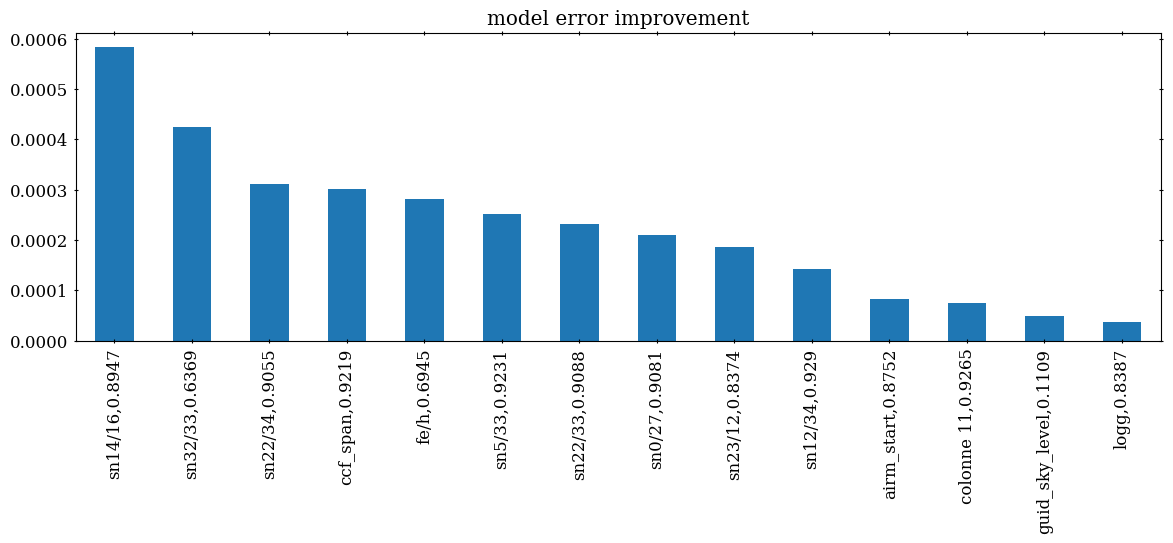

In [ ]:
plt.figure(figsize=(14,4))
scores_ = pd.Series(scores).sort_values(ascending=False)
scores_.plot(kind='bar', title='model error improvement')
plt.show()

# Master zero point correction


In [ ]:
# lectura de tablas
# isa_1 = pd.read_table('drive/MyDrive/Tesis/master_corrections/master_from_ohp.txt', sep='\s+')
# hara_1 = pd.read_table('drive/MyDrive/Tesis/master_corrections/constantes_dat.rdb', sep='\s+')
master_old = pd.read_table('drive/MyDrive/Tesis/master_corrections/vrconstantes.rdb', sep='\s+')
master_new = pd.read_table('drive/MyDrive/Tesis/master_corrections/vrconstantes_update.rdb', sep='\s+')

(-17.0, 12.0)

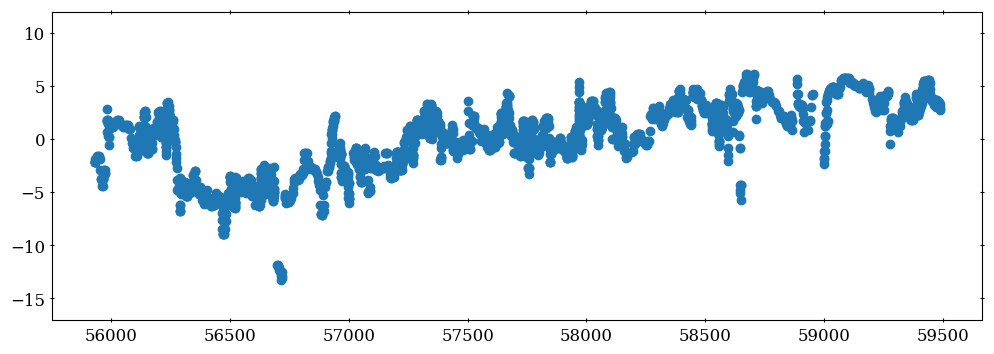

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(master_new['date'], master_new['vrmoy'], 'o')
ax.set_ylim(-17,12)

In [ ]:
print(master_new['date'].min(), master_new['date'].max(), len(master_new['date']))

55930.117 59489.5452 2881


In [ ]:
from scipy.signal import medfilt
from scipy import interpolate
#filtered = medfilt(master_new['vrmoy'])
#interpol = interpolate.interp1d(master_new['date'], filtered)


In [ ]:
# ahora como lo hacen en courcol et al, promediando cada 15 medidas
from skimage.measure import block_reduce

filtered2 = block_reduce(master_new['vrmoy'], block_size=(15,), func=np.median, cval=np.median(master_new['vrmoy']))
filtered2_date = block_reduce(master_new['date'], block_size=(15,), func=np.median, cval=np.median(master_new['date']))
interpol2 = interpolate.interp1d(filtered2_date, filtered2)

# hagamos lo mismo con las rv de entrenamiento
#ordeno primero en tiempo
ordenado = dataset_final_.sort_values(by=['bjd'])
train_master_sindrift = block_reduce(ordenado.ccf_rv-ordenado.drift_rv, block_size=(15,), func=np.mean, cval=np.mean(ordenado.ccf_rv-ordenado.drift_rv))
train_master = block_reduce(ordenado.ccf_rv, block_size=(15,), func=np.mean, cval=np.mean(ordenado.ccf_rv))
train_master_date = block_reduce(ordenado.bjd, block_size=(15,), func=np.mean, cval=np.mean(ordenado.bjd))
interpol_train = interpolate.interp1d(train_master_date, train_master)
interpol_train_sindrift = interpolate.interp1d(train_master_date, train_master_sindrift)

In [ ]:
k=0
asd = []
for i in filtered2_date[1:]:
  asd.append(i-filtered2_date[k])
  k=k+1

k=0
asd2 = []
for i in train_master_date[1:]:
  asd2.append(i-train_master_date[k])
  k=k+1

print(np.array(asd).mean())
print(np.array(asd2).mean())

9.03669583333336
17.459332618748164


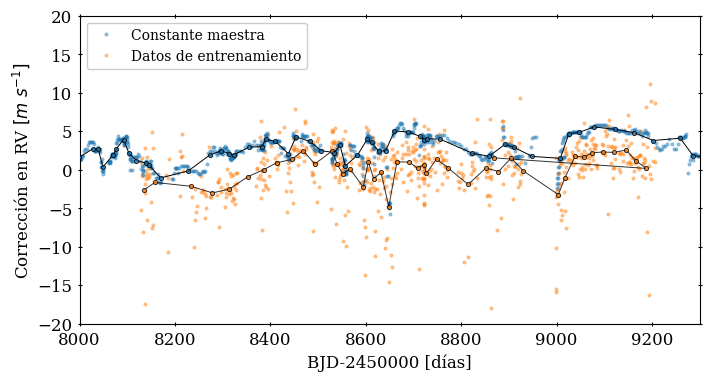

In [ ]:
# plt.rcParams['figure.figsize'] = [4, 2]
# plt.rcParams['figure.dpi'] = 300
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=0.6)
date2 = np.arange(58000, 59400, 0.01)

plt.figure(figsize=(8,4))
plt.plot(master_new['date']-50000, master_new['vrmoy'], 'o', alpha=0.4, markersize=2, label='Constante maestra', zorder=-300)
plt.plot(filtered2_date-50000, filtered2, 'o', color='C0', mec='k', mew=0.7, markersize=3, alpha=0.8, zorder=900)
plt.plot(date2-50000, interpol2(date2), color='k', lw=0.7, alpha=1, zorder=500)
#plt.plot(dataset_final_.bjd, dataset_final_.ccf_rv, 'o', color='blue', mec='k', mew=0.5, markersize=2.5, alpha=0.6, label='Entrenamiento', zorder=300)
plt.plot(dataset_final_.bjd, dataset_final_.ccf_rv, 'o', markersize=2, alpha=0.4, label='Datos de entrenamiento', zorder=-400)
plt.plot(train_master_date, train_master, 'o', color='C1', mec='k', mew=0.7, markersize=3, alpha=0.8, zorder=700)
plt.plot(train_master_date, interpol_train(train_master_date), color='k', lw=0.7, alpha=0.8, zorder=600)
#plt.plot(train_master_date, interpol_train_sindrift(train_master_date), color='green', lw=1, alpha=0.8, label='Interpolación entrenamiento')
#plt.hlines(0, 800, 9300, colors='k', linestyles='--', lw=1, alpha=0.3)
plt.xlim(8000, 9300)
plt.ylim(-20,20)
plt.legend(loc='upper left', frameon=True, facecolor='white', framealpha=1.0, fontsize=10)
plt.xlabel('BJD-2450000 [días]')
plt.ylabel('Corrección en RV$~[m~s^{-1}]$')
#plt.savefig('drive/MyDrive/Tesis/master_correction_and_train.png', facecolor='white', dpi=300, bbox_inches='tight')
plt.show()

# Prueba del modelo: HD207897 (K0)

## Lectura de datos

In [ ]:
corrected_207897 = pd.read_table('drive/MyDrive/Tesis/dataset_heidari_hd207897.dat', sep='\s+', header=0)
ccf_207897 = pd.read_table('drive/MyDrive/Tesis/dataset_ccf_hd207897.dat', sep='\s+', names=names)
e2ds_207897 = pd.read_table('drive/MyDrive/Tesis/dataset_e2ds_hd207897.dat', sep='\s+', names=columnas_e2ds)
print(len(corrected_207897))
print(len(e2ds_207897))
print(len(ccf_207897))

64
24
24


In [ ]:
e2ds_207897_drop = e2ds_207897.drop(columns=['target', 'bjd'])
ccf_207897_drop = ccf_207897.drop(columns=['date_start'])
dataset_preliminar_207897 = pd.concat([ccf_207897_drop, e2ds_207897_drop],axis=1)

In [ ]:
corrected_207897.columns = ['bjd', 'rv', 'sigma_rv', 'fwhm',
       'bis', 'halfa', 'sigma_halfa', 'crx', 'sigma_crx']

In [ ]:
offset_207897 = corrected_207897['rv'].mean()
offset_207897

-6.328532812500001

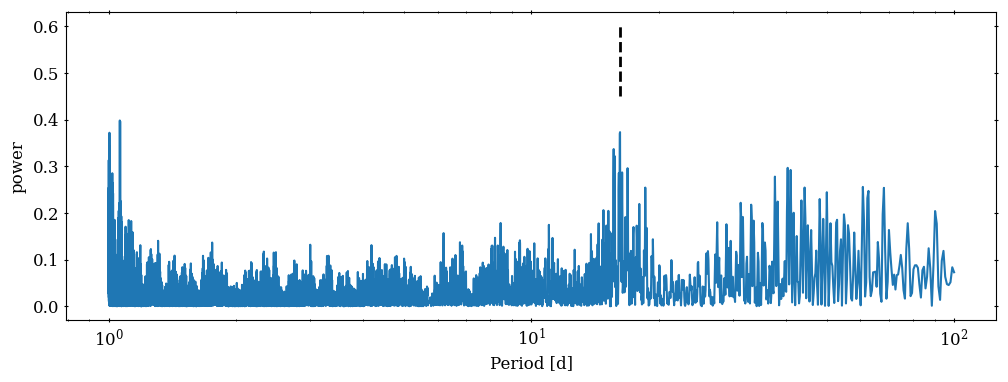

In [ ]:
from astropy.timeseries import LombScargle
# periodograma sin corregir
frequency = np.linspace(0.01, 1, 10000)
power = LombScargle(corrected_207897.bjd, corrected_207897.rv, corrected_207897.sigma_rv).power(frequency)
plt.figure(figsize=(12,4))
plt.plot(1/frequency, power)
plt.vlines(x=[16.2], ymin=0.45, ymax=0.6, label='16.2d', linestyles='dashed', lw=2, colors='k')
#plt.xlim(1,100)
plt.xscale('log')
plt.ylabel('power')
plt.xlabel('Period [d]')
#plt.title('VRs sin corregir')
#plt.savefig('drive/MyDrive/Tesis/periodograma_correg.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
temperaturas5 = pd.read_csv('drive/MyDrive/Tesis/temperaturas_extraidas_hd207897.csv')
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']
temperaturas5_drop = temperaturas5.drop(labels=no_sirven,axis=1)
#temperaturas5_drop.info()

In [ ]:
# #sacamos los datos de 2021 por ahora. (no tenemos las temperaturas tampoco)
# print(len(dataset_preliminar_9407))
# cond = dataset_preliminar_9407.date_start.str.contains('2021', regex=False)
# dataset_9407_no2021 = dataset_preliminar_9407.loc[-cond]
# print(len(dataset_9407_no2021))

In [ ]:
from sklearn.impute import SimpleImputer

temperaturas5_drop_2 = temperaturas5_drop.replace(to_replace=0,value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(temperaturas5_drop_2)
X_7 = imputer.transform(temperaturas5_drop_2)
temperaturas5_drop_limpio= pd.DataFrame(X_7, columns=temperaturas5_drop.columns,index=temperaturas5_drop.index)

In [ ]:
dataset5 = pd.concat([temperaturas5_drop_limpio,dataset_preliminar_207897.set_index(temperaturas5_drop.index)],axis=1)
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 112 entries, colonne 2 to drift_rflux
dtypes: float64(98), int64(8), object(6)
memory usage: 21.1+ KB


In [ ]:
dataset5_HR = dataset5.loc[dataset4['modo'] == 'HR']
dataset5_HE = dataset5.loc[dataset4['modo'] == 'HE']
print(len(dataset5_HR),len(dataset5_HE))

19 5


## Targets y outliers

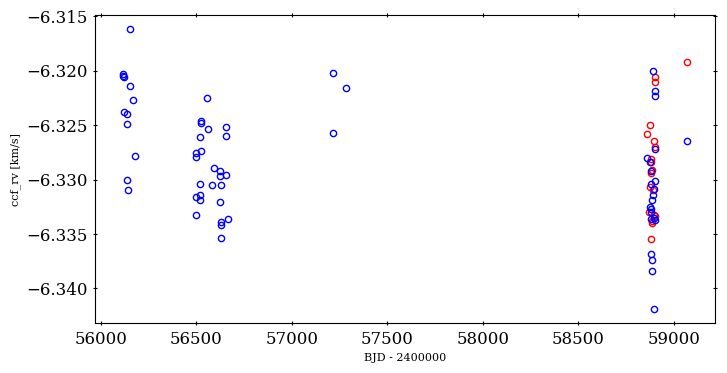

In [ ]:
# visualizemos los datos de vr
plt.figure(figsize=(8,4))
plt.plot(dataset5_HR.bjd - 2400000, dataset5_HR.ccf_rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='red')
plt.plot(corrected_207897.bjd, corrected_207897.rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='blue')
plt.xlabel('BJD - 2400000', fontsize=8)
plt.ylabel('ccf_rv [km/s]', fontsize=8)
plt.show()

In [ ]:
# descartamos las VR del paper que son anteriores a los datos de entrenamiento bjd = 58129
print(len(corrected_207897))
#cond = corrected_207897.bjd > 58850
cond = corrected_207897.bjd > 58129
corrected_207897_2020 = corrected_207897.loc[cond]
print(len(corrected_207897_2020))
print(len(dataset5_HR))

64
23
19


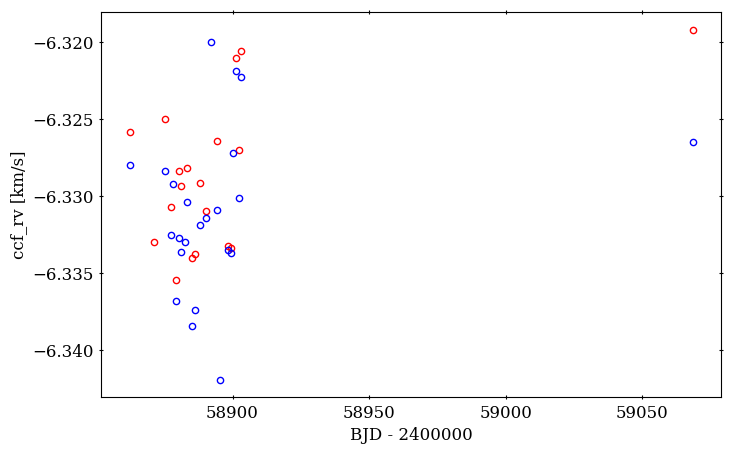

In [ ]:
# visualizemos los datos de vr
plt.figure(figsize=(8,5))
plt.plot(dataset5_HR.bjd - 2400000, dataset5_HR.ccf_rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='red')
plt.plot(corrected_207897_2020.bjd, corrected_207897_2020.rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='blue')
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv [km/s]', fontsize=12)
plt.show()

In [ ]:
corrected_207897_2020.loc[44]

bjd            58878.3249
rv                -6.3292
sigma_rv           0.0019
fwhm               6.7894
bis               -0.0000
halfa              0.1437
sigma_halfa        0.0009
crx               57.8937
sigma_crx         28.6864
Name: 44, dtype: float64

In [ ]:
dataset5_HE['bjd']-2400000

14    58878.324876
15    58882.685282
18    58895.257038
21    58900.270515
22    58892.259324
Name: bjd, dtype: float64

In [ ]:
# hay 5 puntos que no coinciden entre los datasets, los sacamos, quedan 18. SON LAS OBSERVACIONES EN HE
#c=0
#for i in np.sort(np.asarray(dataset5_HR.bjd-2400000)):
#  for j in np.sort(np.asarray(corrected_207897_2020.bjd)):
#    if np.abs(i-j) < 0.01:
#      print(i)
#      c=c+1
#print(c)

In [ ]:
corrected_207897_2020_match = corrected_207897_2020.drop([44,48,54,56,59])
dataset5_HR_drop_ = dataset5_HR.drop(5)
dataset5_HR_drop = dataset5_HR_drop_.sort_values(by=['bjd'])
print(len(corrected_207897_2020_match))
print(len(dataset5_HR_drop.bjd))

18
18


In [ ]:
for i, j in zip(corrected_207897_2020_match['bjd'], (dataset5_HR_drop.bjd-2400000)):
  print(i,'---', j)

58862.3082 --- 58862.308199100196
58875.3024 --- 58875.30235461006
58877.3789 --- 58877.3789413902
58879.3132 --- 58879.313204170205
58880.2542 --- 58880.254172599874
58881.2536 --- 58881.25363436993
58883.2559 --- 58883.2558900998
58885.2949 --- 58885.294879490044
58886.2969 --- 58886.296874229796
58888.2703 --- 58888.27030821005
58890.292 --- 58890.292026579846
58894.2567 --- 58894.256654830184
58898.2952 --- 58898.295246889815
58899.2728 --- 58899.27284108009
58901.278 --- 58901.27800410986
58902.2708 --- 58902.270770910196
58903.2734 --- 58903.273398340214
59068.5491 --- 59068.54906392982


In [ ]:
#reset indexes y defino correccion heidari
corrected_207897_2020_match = corrected_207897_2020_match.reset_index(drop=True)
dataset5_HR_drop = dataset5_HR_drop.reset_index(drop=True)

correccion_heidari = dataset5_HR_drop.ccf_rv - corrected_207897_2020_match.rv

In [ ]:
correccion_heidari

0     0.002159
1     0.003407
2     0.001775
3     0.001353
4     0.004308
5     0.004221
6     0.002236
7     0.004397
8     0.003630
9     0.002748
10    0.000413
11    0.004457
12    0.000287
13    0.000306
14    0.000854
15    0.003058
16    0.001674
17    0.007284
dtype: float64

In [ ]:
sigma_sophie = dataset5_HR_drop.ccf_rv.std()*1e3
sigma_corrected_h = corrected_207897_2020_match.rv.std()*1e3
print(sigma_sophie)
print(sigma_corrected_h)

4.816327725996416
4.544809579910479


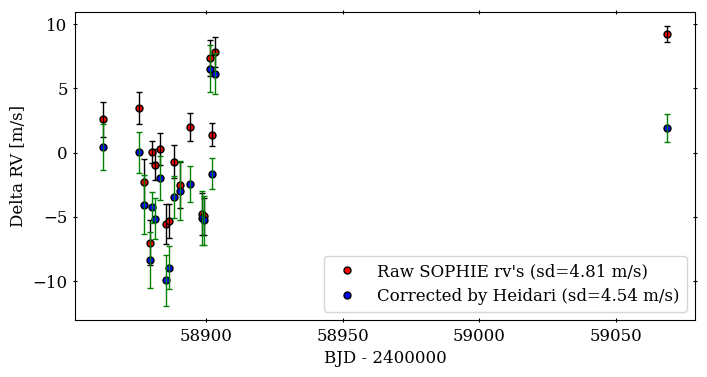

In [ ]:
radvel = dataset5_HR_drop.ccf_rv.mean()
plt.figure(figsize=(8,4))
plt.plot(dataset5_HR_drop.bjd - 2400000, 1e3*(dataset5_HR_drop.ccf_rv-radvel), 'o',
         ms=5.0, mfc='red', mec='black', label='Raw SOPHIE rv\'s (sd=4.81 m/s)')
plt.errorbar(dataset5_HR_drop.bjd - 2400000, 1e3*(dataset5_HR_drop.ccf_rv-radvel),
             yerr=dataset5_HR_drop.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.plot(corrected_207897_2020_match.bjd, 1e3*(corrected_207897_2020_match.rv-radvel), 'o',
         ms=5.0, mfc='blue', mec='black', label='Corrected by Heidari (sd=4.54 m/s)')
plt.errorbar(corrected_207897_2020_match.bjd, 1e3*(corrected_207897_2020_match.rv-radvel),
             yerr=corrected_207897_2020_match.sigma_rv*1e3, fmt=' ', ecolor='green', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('Delta RV [m/s]', fontsize=12)
plt.legend(loc='lower right')
#plt.savefig('drive/MyDrive/Tesis/hd207897.png',dpi=200,bbox_inches='tight')
plt.show()

In [ ]:
# guardemos la correccion de heidari en m/s
corr_heidari = 1e3*(dataset5_HR_drop.ccf_rv-corrected_207897_2020_match.rv)
corr_heidari

0     2.159388
1     3.407246
2     1.774608
3     1.353133
4     4.307868
5     4.221352
6     2.235993
7     4.397269
8     3.629886
9     2.747542
10    0.413078
11    4.456903
12    0.287300
13    0.305777
14    0.853948
15    3.058108
16    1.674468
17    7.283904
dtype: float64

In [ ]:
columnas_nop = ['file_ccf','target','date_start','date_end','file_e2ds',
               'modo','senti_seeing','colonne 23', 'colonne 24']
dataset5_2 = dataset5_HR_drop.drop(labels=columnas_nop,axis=1)

## Feature engineering

In [ ]:
dataset5_2.loc[dataset5_2.guid_sky_level <= 0, 'guid_sky_level'] = 0
cleaning = dataset5_2.replace(to_replace={'guid_sky_level':0},value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(cleaning)
X_8 = imputer.transform(cleaning)
dataset5_22= pd.DataFrame(X_8, columns=dataset5_2.columns,index=dataset5_2.index)
dataset5_new = dataset5_22.copy()
dataset5_HR_limpio_2 = dataset5_new.copy()

In [ ]:
# print(len(dataset4_HR_limpio_2))
# dataset4_HR_limpio_2 = dataset4_HR_limpio_2.loc[dataset4_HR_limpio_2['senti_humi'] < 1000]
# print(len(dataset4_HR_limpio_2))
# dataset4_HR_limpio_2 = dataset4_HR_limpio_2.loc[dataset4_HR_limpio_2['senti_tciel'] < 1000]
# print(len(dataset4_HR_limpio_2))

In [ ]:
# columnas que van a reemplazar a las max
temp1 = dataset5_HR_limpio_2.temp1_max-dataset5_HR_limpio_2.temp1_min
temp2 = dataset5_HR_limpio_2.temp3_max-dataset5_HR_limpio_2.temp3_min
temp3 = dataset5_HR_limpio_2.pres1_max-dataset5_HR_limpio_2.pres1_min
temp4 = dataset5_HR_limpio_2.pres2_max-dataset5_HR_limpio_2.pres2_min
temp5 = dataset5_HR_limpio_2.airm_end-dataset5_HR_limpio_2.airm_start
# hago el reemplazo pero en una copia del dataframe
dataset5_final = dataset5_HR_limpio_2.copy()
dataset5_final.temp1_max = temp1
dataset5_final.temp3_max = temp2
dataset5_final.pres1_max = temp3
dataset5_final.pres2_max = temp4
dataset5_final.airm_end = temp5
# y modifico los nombres de esas columnas
dataset5_final.rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'},inplace=True)
# NO CORRER DOS VECES
log_sky=np.log(dataset5_final['guid_sky_level'])
dataset5_final['guid_sky_level'] = log_sky

In [ ]:
# nuevas nuevas
dataset5_final['sn0/2'] = dataset5_final['cal_ext_sn0']/dataset5_final['cal_ext_sn2']
dataset5_final['sn7-8'] = dataset5_final['cal_ext_sn7'] - dataset5_final['cal_ext_sn8']
dataset5_final['sn14/16'] = dataset5_final['cal_ext_sn14']/dataset5_final['cal_ext_sn16']
dataset5_final['sn0-1'] = dataset5_final['cal_ext_sn0']-dataset5_final['cal_ext_sn1']
dataset5_final['sn8/9'] = dataset5_final['cal_ext_sn8']/dataset5_final['cal_ext_sn9']
dataset5_final['sn6-4'] = dataset5_final['cal_ext_sn6']-dataset5_final['cal_ext_sn4']
dataset5_final['sn0/27'] = dataset5_final['cal_ext_sn0']/dataset5_final['cal_ext_sn27']

dataset5_final['sn11-2'] = dataset5_final['cal_ext_sn11']-dataset5_final['cal_ext_sn2']
dataset5_final['sn23/12'] = dataset5_final['cal_ext_sn23']/dataset5_final['cal_ext_sn12']
dataset5_final['sn26-37'] = dataset5_final['cal_ext_sn26']-dataset5_final['cal_ext_sn37']
dataset5_final['sn22/34'] = dataset5_final['cal_ext_sn22']/dataset5_final['cal_ext_sn34']
dataset5_final['sn17-19'] = dataset5_final['cal_ext_sn17']-dataset5_final['cal_ext_sn19']
dataset5_final['sn2-8'] = dataset5_final['cal_ext_sn2'] - dataset5_final['cal_ext_sn8']
dataset5_final['sn32/33'] = dataset5_final['cal_ext_sn32']/dataset5_final['cal_ext_sn33']
dataset5_final['sn12/34'] = dataset5_final['cal_ext_sn12']/dataset5_final['cal_ext_sn34']
dataset5_final['sn13-38'] = dataset5_final['cal_ext_sn13'] - dataset5_final['cal_ext_sn38']
dataset5_final['sn5/33'] = dataset5_final['cal_ext_sn5']/dataset5_final['cal_ext_sn33']
dataset5_final['sn30-33'] = dataset5_final['cal_ext_sn30'] - dataset5_final['cal_ext_sn33']
dataset5_final['sn22/33'] = dataset5_final['cal_ext_sn22']/dataset5_final['cal_ext_sn33']
dataset5_final['airm_ratio'] = dataset5_HR_limpio_2['airm_end']/dataset5_HR_limpio_2['airm_start']
dataset5_final.head()

,colonne 2,colonne 3,colonne 4,colonne 5,colonne 6,colonne 7,colonne 8,colonne 9,colonne 10,colonne 11,...,sn22/34,sn17-19,sn2-8,sn32/33,sn12/34,sn13-38,sn5/33,sn30-33,sn22/33,airm_ratio
0,20.460,20.210,19.538,20.510,19.349,19.009,20.481,20.393,20.698,20.269,...,0.731253,-3.886750,-9.263979,1.019690,0.410402,-34.892409,0.242168,-1.927270,0.763778,1.007042
1,20.457,20.211,19.576,20.511,19.412,19.020,20.483,20.402,20.699,20.268,...,0.723185,-5.533709,-11.004982,1.018248,0.351360,-45.291710,0.143925,-2.857009,0.754115,1.006897
2,20.451,20.212,19.287,20.513,19.386,19.032,20.485,20.396,20.699,20.269,...,0.765211,-2.797015,-6.641052,1.022140,0.447040,-22.461987,0.274176,-0.959942,0.796939,1.013158
3,20.454,20.211,19.342,20.510,19.384,19.027,20.481,20.413,20.699,20.264,...,0.732601,-4.149485,-7.671943,1.020949,0.348628,-33.077837,0.137814,-1.868838,0.763048,1.013605
4,20.461,20.211,19.419,20.511,19.444,19.024,20.483,20.431,20.698,20.268,...,0.716590,-7.581383,-16.316370,1.018162,0.359562,-64.356591,0.159716,-4.600497,0.748254,1.007042


## Features estelares

In [ ]:
# Heidari et al 2022
dataset5_final['teff'] = 5070
dataset5_final['fe/h'] = -0.042
dataset5_final['logg'] = 4.55

In [ ]:
dataset5_final = dataset5_final[dataset_final.columns]

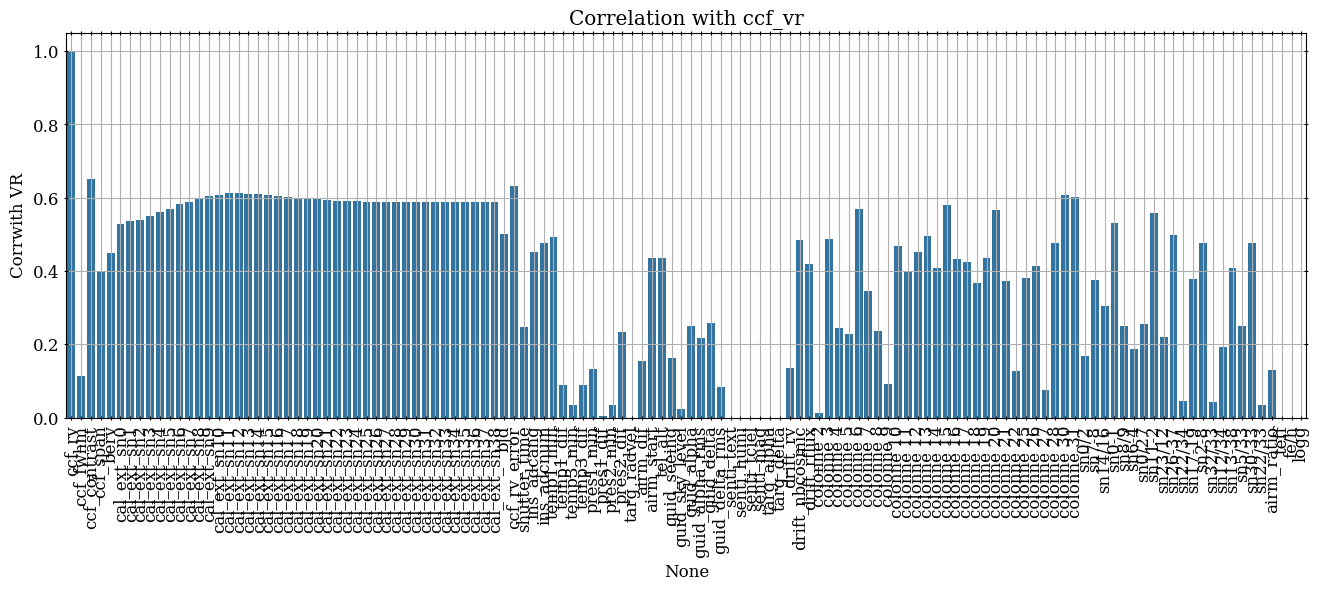

In [ ]:
corr_HR_VR_5 = dataset5_final.corrwith(other=dataset5_final.ccf_rv)
asd5=corr_HR_VR_5.abs()
f, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x=asd5.index, y=asd5.values)
plt.xticks(rotation='vertical')
plt.ylabel('Corrwith VR')
plt.title('Correlation with ccf_vr')
plt.grid(True)
#plt.savefig('drive/MyDrive/Tesis/corr_vr.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
corr = dataset5_final.drop(labels=columnas_no_1,axis=1).corrwith(other=dataset5_final.ccf_rv)
print('Pearson')
print(corr.abs().sort_values(ascending=False)[0:33])

Pearson
ccf_contrast    0.650884
cal_ext_sn11    0.612029
cal_ext_sn12    0.611697
cal_ext_sn13    0.610160
cal_ext_sn14    0.609555
cal_ext_sn10    0.608648
cal_ext_sn15    0.607128
colonne 30      0.606580
cal_ext_sn16    0.605872
cal_ext_sn9     0.605019
cal_ext_sn17    0.603326
colonne 31      0.603258
cal_ext_sn19    0.599457
cal_ext_sn18    0.599376
cal_ext_sn20    0.595778
cal_ext_sn8     0.595329
cal_ext_sn21    0.593612
cal_ext_sn23    0.591580
cal_ext_sn22    0.591480
cal_ext_sn24    0.591160
cal_ext_sn35    0.589545
cal_ext_sn38    0.589518
cal_ext_sn25    0.589416
cal_ext_sn26    0.589131
cal_ext_sn30    0.588961
cal_ext_sn27    0.588820
cal_ext_sn37    0.588481
cal_ext_sn7     0.588243
cal_ext_sn34    0.588237
cal_ext_sn33    0.588175
cal_ext_sn32    0.588104
cal_ext_sn28    0.588089
cal_ext_sn36    0.587974
dtype: float64


## Drop final

In [ ]:
dataset5_final_drop = dataset5_final.drop(labels=columnas_no_1 + columnas_no_2,axis=1)
# dataset4_final_drop = dataset4_final.drop(labels=columnas_no_1,axis=1)

t5_ = dataset5_final.ccf_rv
t5 = t5_ #- radvel
X5 = dataset5_final_drop.copy()

weight5 = 1/(dataset5_final.ccf_rv_error/1e3)**2

# features que quedaron
print(X5.columns)
print(len(X5.columns))
print(len(t5))

Index(['ccf_contrast', 'berv', 'cal_ext_sn7', 'shutter_time', 'ins_adcnum',
       'pres1_dif', 'airm_dif', 'guid_seeing', 'guid_alpha_rms', 'drift_rv',
       'drift_rflux', 'colonne 3', 'colonne 7', 'colonne 16', 'colonne 17',
       'colonne 18', 'colonne 19', 'colonne 25', 'colonne 26', 'colonne 27',
       'colonne 30', 'sn6-4', 'sn17-19', 'sn30-33'],
      dtype='object')
24
18


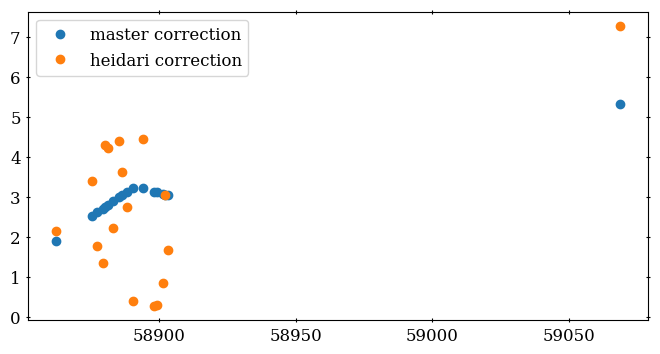

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dataset5_final.bjd-2400000, interpol2(dataset5_final.bjd-2400000), 'o', label='master correction')
ax.plot(dataset5_final.bjd-2400000, dataset5_HR_drop.ccf_rv*1e3-corrected_207897_2020_match.rv*1e3,'o', label='heidari correction')
#plt.plot(dataset5_final.bjd-2400000, dataset5_HR_drop.ccf_rv*1e3-dataset5_HR_drop.drift_rv - dataset5_HR_drop.ccf_rv.mean()*1e3,'o', label='sophie rvs')
#plt.plot(dataset5_final.bjd-2400000, corrected_207897_2020_match.rv*1e3-corrected_207897_2020_match.rv.mean()*1e3,'o', label='corrected rvs')
plt.legend(loc='best')

## Pair plots

(-2.0, 2.0)

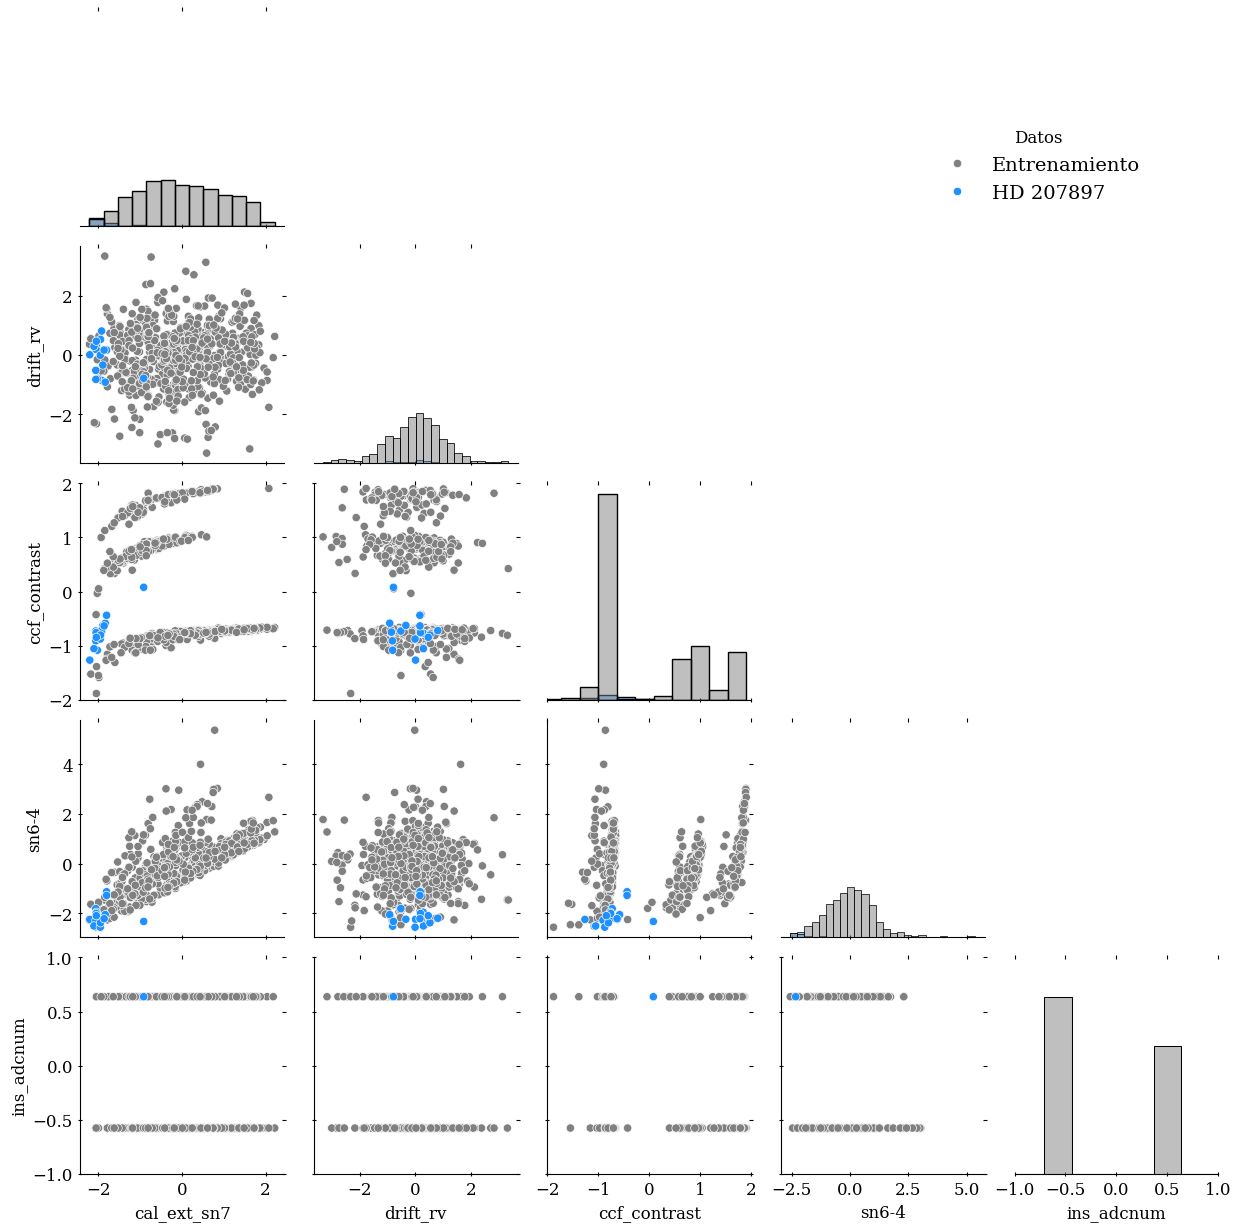

In [ ]:
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.rcParams['figure.dpi'] = 300
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.4)
# entrena = grid1.copy()
# nueva = X5.copy()
entrena = pd.DataFrame(X_train_, columns=X_.columns)
x555 = scaler.transform(X5)
nueva = pd.DataFrame(x555, columns=X5.columns)

entrena['Datos'] = 'Entrenamiento'
nueva['Datos'] = 'HD 207897'
colu = entrena.columns.tolist()
colu.remove('Datos')

most_important = list(pd.Series(gradb.feature_importances_, X_.columns).sort_values(ascending=False).keys())[0:5]

pair_df = pd.concat([entrena, nueva], axis=0, ignore_index=True)
g = sns.PairGrid(pair_df, vars=most_important, hue='Datos', layout_pad=0.2, palette={'Entrenamiento': 'gray','HD 207897': 'dodgerblue'}, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend(title='Datos', loc='upper right', bbox_to_anchor=(0.8, 0.9), fontsize=14, title_fontsize=28)
g.axes[4,0].set_ylim(-1.,1.)
g.axes[4,4].set_xlim(-1.,1.)
g.axes[4,2].set_xlim(-2.,2.)
g.axes[2,0].set_ylim(-2.,2.)
#plt.savefig('drive/MyDrive/Tesis/pair_HD207897.png', dpi=200, bbox_inches='tight')

In [ ]:
# #lo mismo pero con los features polynomiales
# entrena2 = poly.transform(X_)
# nueva2 = poly.transform(X5)
# entrena2 = pd.DataFrame(entrena2, columns=poly.get_feature_names_out(X_.columns))
# nueva2 = pd.DataFrame(nueva2, columns=poly.get_feature_names_out(X5.columns))
# entrena2['dataset'] = 'estrellas de entrenamiento'
# nueva2['dataset'] = 'estrella de test: HD 207897'
# colu2 =  entrena2.columns.tolist()
# colu2.remove('dataset')
# n_grids2=8
# colu2_split = np.array_split(colu2, n_grids2)
# pair_df2 = pd.concat([entrena2, nueva2], axis=0, ignore_index=True)

# # for i in range(n_grids2):
# #   g = sns.PairGrid(pair_df2, vars=colu2_split[i], hue='dataset', corner=True)
# #   g.map_diag(sns.histplot)
# #   g.map_lower(sns.scatterplot)
# #   g.add_legend()
# #   #plt.savefig('drive/MyDrive/Tesis/pair_'+str(i)+'.png',dpi=200,bbox_inches='tight')

In [ ]:
# best = poly.get_feature_names_out(X_.columns)[np.abs(pr.coef_).argsort()[-5:]]
# best2 = entrena2.loc[:,[*best,'dataset']]
# best2

In [ ]:
# best3 = nueva2.loc[:,[*best, 'dataset']]
# asd = pd.concat([best2,best3], axis=0, ignore_index=True)
# g = sns.PairGrid(asd, hue='dataset', corner=True)
# g.map_diag(sns.histplot)
# g.map_lower(sns.scatterplot)
# #plt.savefig('drive/MyDrive/Tesis/pairplot_5_masimportantes.png',dpi=200,bbox_inches='tight')

## Tests

In [ ]:
# #Polynomial LassoLars
# modelo = pr
# X5_ = scaler.transform(X5)
# X5_poly = poly.transform(X5_)
# predicciones5 = modelo.predict(X5_poly)

# #Linear LassoLars
# modelo = lars
# X5_ = scaler.transform(X5)
# predicciones5 = modelo.predict(X5_)

#Gradient Boosting
X5_ = scaler.transform(X5)
modelo = gradb
predicciones5 = modelo.predict(X5_)

In [ ]:
predicciones5.mean()*1e3

-6.7606820217774874

In [ ]:
sigma_sophie = dataset5_HR_drop.ccf_rv.std()*1e3
sigma_correccion_h = corrected_207897_2020_match.rv.std()*1e3
sigma_correccion_nuestra = (t5_-predicciones5).std()*1e3
print('dispersion SOPHIE:', sigma_sophie)
print('dispersion con correc Heidari:', sigma_corrected_h)
print('dispersion con correc nuestra:', sigma_correccion_nuestra)
print('dispersion datos completos de Heidari:', corrected_207897.rv.std()*1e3)

dispersion SOPHIE: 4.816327725996416
dispersion con correc Heidari: 4.544809579910479
dispersion con correc nuestra: 3.951942791197284
dispersion datos completos de Heidari: 5.16904875002727


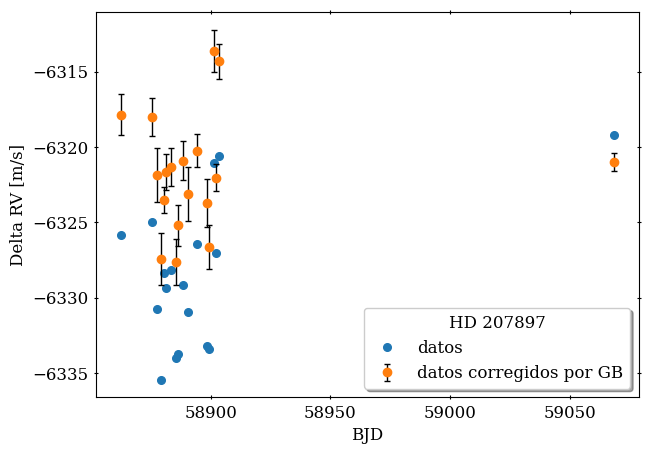

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(dataset5_final.bjd-2400000, 1e3*t5, 'o', markersize=5.5, label='datos')
plt.errorbar(x=dataset5_final.bjd - 2400000, y=1e3*(dataset5_final.ccf_rv-predicciones5),
             yerr=dataset5_final.ccf_rv_error, fmt='o', ecolor='black', elinewidth=1, capsize=2, label='datos corregidos por GB')

plt.xlabel('BJD')
plt.ylabel('Delta RV [m/s]')
plt.legend(loc='best', title='HD 207897', shadow=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#plt.text(58970, 0, metrics, bbox=props)
#plt.savefig('drive/MyDrive/Tesis/predicciones_hd207897.png',dpi=200,bbox_inches='tight')
plt.show()

# #LassoLars
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t5, predicciones5, sample_weight=weight5))))
# print('SCORE [R2]: {:.3f}'.format(pr.score(X5_poly, t5, sample_weight=weight5)))  # R2 scoring
# print('Dispersion del test set:', (1e3*t5).std())
# print('Dispersion del test set corregido:', (1e3*(t5-predicciones5).std()))

# #Gradb
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t5, predicciones5, sample_weight=weight5))))
# print('SCORE [R2]: {:.3f}'.format(gradb.score(X5_, t5, sample_weight=weight5)))
# print('Dispersion del test set:', (1e3*t5).std())
# print('Dispersion del test set corregido:', (1e3*(t5-predicciones5).std()))

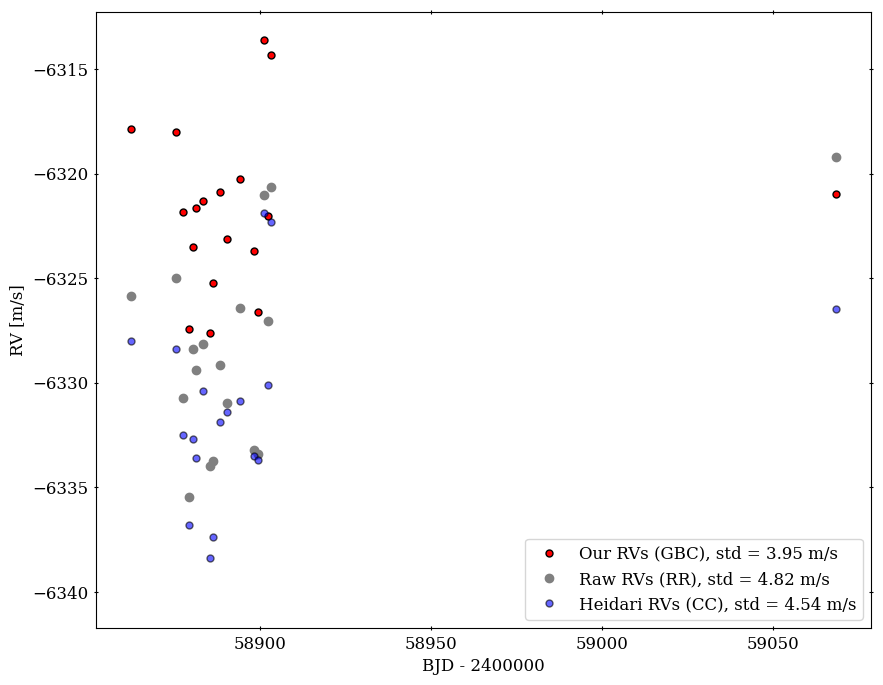

In [ ]:
plt.figure(figsize=(10,8))

plt.errorbar(dataset5_HR_drop.bjd - 2400000, 1e3*(dataset5_HR_drop.ccf_rv), yerr=dataset5_HR_drop.ccf_rv_error, color='gray',
             fmt='o', ecolor='black', elinewidth=0, capsize=0, label='Raw RVs (RR), std = {:.2f} m/s'.format(sigma_sophie))

plt.errorbar(corrected_207897_2020_match.bjd, 1e3*(corrected_207897_2020_match.rv), yerr=corrected_207897_2020_match.sigma_rv*1e3, fmt='o',
             ms=5.0, mfc='blue', mec='black', alpha=0.6, label='Heidari RVs (CC), std = {:.2f} m/s'.format(sigma_correccion_h), elinewidth=0, capsize=0)

plt.plot(dataset5_final.bjd-2400000, 1e3*(t5-predicciones5), 'o', ms=5.0, mfc='red', mec='black', alpha=1,
         label='Our RVs (GBC), std = {:.2f} m/s'.format(sigma_correccion_nuestra))

plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('RV [m/s]', fontsize=12)
plt.legend(loc='lower right')
#plt.savefig('drive/MyDrive/Tesis/hd207897.png',dpi=200,bbox_inches='tight')
plt.show()

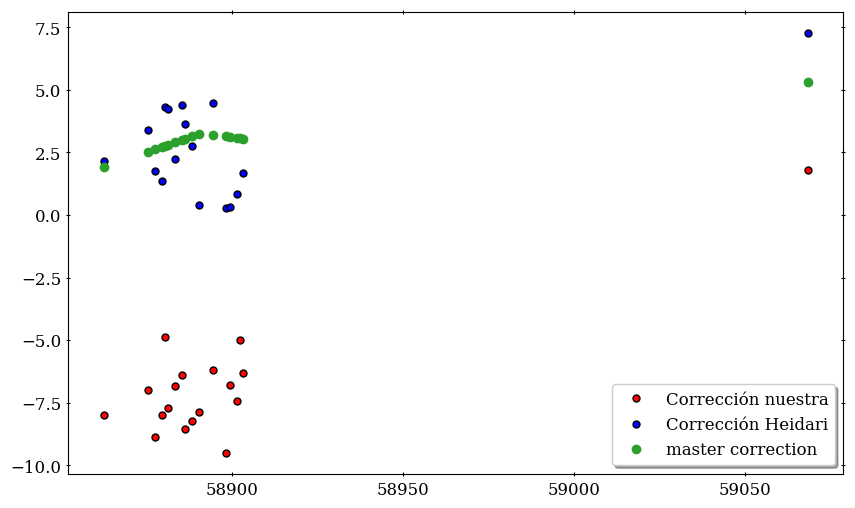

mean correction heidari: 2.6982094349173007
mean correction nuestra: -6.7606820217774874


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dataset5_final.bjd-2400000, 1e3*predicciones5, 'o',
           markersize=5.0, mfc='red', mec='black', label='Corrección nuestra')

plt.plot(corrected_207897_2020_match.bjd, 1e3*correccion_heidari, 'o',
         ms=5.0, mfc='blue', mec='black', label='Corrección Heidari')

plt.plot(dataset5_final.bjd-2400000, interpol2(dataset5_final.bjd-2400000), 'o', label='master correction')

plt.legend(loc='lower right', shadow=True)
plt.show()
print('mean correction heidari:', correccion_heidari.mean()*1e3)
print('mean correction nuestra:', predicciones5.mean()*1e3)

## Planeta

In [ ]:
# !pip install exoplanet

In [ ]:
# !pip install pymc3_ext

In [ ]:
# # probemos removiendo el planeta primero
# import exoplanet as xo
# import pymc3 as pm
# import pymc3_ext as pmx

In [ ]:
# x_rv = np.linspace(dataset5_final.bjd.min() - 5, dataset5_final.bjd.max() + 5, 3000)
# rv_jitter = 3.16
# with pm.Model() as model:
#   P = 16.202157
#   rp = 2.50
#   mp_1 = 14.4
#   mp_2 = 15.9
#   t0 = 2458926.10942
#   incl = 1.5489797
#   ecc = 0.047
#   omega = -1.74533
#   m_star = 0.80
#   r_star = 0.779
#   k1 = 4.24
#   k2 = 4.65

#   orbit = xo.orbits.KeplerianOrbit(period=P, t0=t0, ecc=ecc, incl=incl, omega=omega, m_planet=mp_1, m_star=m_star, r_star=r_star)
#   #rv_model = orbit.get_radial_velocity(dataset5_final.bjd)
#   pm.Deterministic("rv_model", orbit.get_radial_velocity(dataset5_final.bjd, K=k1))
#   pm.Deterministic("rv_curve", orbit.get_radial_velocity(x_rv, K=k1))

In [ ]:
# x_fold = (dataset5_final.bjd - t0 + 0.5 * P) % P - 0.5 * P
# x_fold_hei = (corrected_207897_2020_match.bjd-(t0-2400000)+0.5 * P) % P - 0.5 * P

# # atencion que no coinciden los x

In [ ]:
# # heidari rvs (corrected)
# hei = (corrected_207897_2020_match.rv-offset_207897)*1e3
# # crude rvs
# cru = (t5-t5.mean())*1e3
# # corrected by us
# gbp = 1e3*(t5-predicciones5-(t5-predicciones5).mean())
# # # master correction
# # mco = interpol2(dataset5_final.bjd-2400000)
# # # heidari correction
# # hco = cru-hei
# # # diferencia de correccion
# # difco = hei - mco
# # # gb corregido
# # gco = gbp+difco

In [ ]:
# plt.figure(figsize=(7,5))
# with model:
#     plana = pmx.eval_in_model(model.rv_curve)
#     predicted = pmx.eval_in_model(model.rv_model)
#     x_rv_fold = (x_rv - t0 + 0.5 * P) % P - 0.5 * P
#     #plt.plot(x_fold, cru, 'o', ms=4, color='yellow', markeredgecolor='black', label='Raw RVs (RR)')
#     plt.errorbar(x_fold, cru, yerr=np.sqrt(dataset5_final.ccf_rv_error**2+rv_jitter**2), fmt='o', ms=5, mfc='lightgray', mec='k', mew=0.5, ecolor='k', alpha=1, label='Raw RVs (RR)', elinewidth=0.5, capsize=1)
#     plt.plot(x_rv_fold, plana, 'o', color='k', markersize=1, label="Planet model")
#     #plt.plot(x_fold, gbp, 'o', ms=3, color='red', label='GB correction (GBC)')
#     plt.errorbar(x_fold, gbp, yerr=np.sqrt(dataset5_final.ccf_rv_error**2+rv_jitter**2), fmt='o', ms=4, mfc='red', mec='k', mew=0.5, ecolor='red', alpha=1, label='GB correction (GBC)', elinewidth=0.5, capsize=1)
#    #plt.plot(x_fold_hei, hei, 'o', ms=3, color='k', label='Courcol correction (CC)')
#     plt.errorbar(x_fold, hei, yerr=np.sqrt((corrected_207897_2020_match.sigma_rv*1e3)**2+rv_jitter**2), fmt='o', ms=4, mfc='blue', mec='k', mew=0.5, ecolor='blue', alpha=1, label='Courcol correction (CC)', elinewidth=0.5, capsize=1)
#     plt.text(-8, -13, 'Residuals dispersion, RR = {:.2f} m/s'.format(np.std(cru-predicted)), fontsize='small')
#     plt.text(-8, -16, 'Residuals dispersion, GBC = {:.2f} m/s'.format(np.std(gbp-predicted)), fontsize='small')
#     plt.text(-8, -19, 'Residuals dispersion, CC = {:.2f} m/s'.format(np.std(hei-predicted)), fontsize='small')

# plt.ylim(-22,22)
# plt.xlim(x_fold.min()-1, x_fold.max()+1)
# plt.xlabel('Phase [days]')
# plt.ylabel('RV [m/s]')
# plt.legend(loc='upper right', fontsize='small')
# #plt.savefig('drive/MyDrive/Tesis/planeta_207897.png', facecolor='white', dpi=400, bbox_inches='tight')
# plt.show()

In [ ]:
# plt.figure(figsize=(7,5))
# plt.plot(dataset5_final.bjd-2400000, 1e3*t5, 'o', markersize=5.5, label='datos')
# plt.errorbar(dataset5_final.bjd - 2400000, 1e3*t5,
#              yerr=dataset5_final.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
# with model:
#     planeta = pmx.eval_in_model(model.rv_model)#-t5_.mean()
#     plt.plot(dataset5_final.bjd-2400000, planeta, 'o',
#          markersize=4.5, markerfacecolor='green', markeredgecolor='green', label="modelo planeta")
# plt.xlabel('BJD')
# plt.ylabel('Delta RV [m/s]')
# plt.legend(loc='best', title='HD 207897', shadow=True)

# plt.show()

In [ ]:
# # residuos
# plt.figure(figsize=(7,5))
# plt.plot(dataset5_final.bjd-2400000, 1e3*t5-planeta, 'o',markersize=4.5, label="datos-modelo planeta")

# # plt.plot(dataset5_final.bjd-2400000, 1e3*t5-planeta-1e3*predicciones5, 'x', markersize=4.5, label="datos-modelo planeta-predicciones")
# plt.errorbar(dataset5_final.bjd - 2400000, 1e3*t5-planeta,
#              yerr=dataset5_final.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

# plt.plot(dataset5_final.bjd-2400000, 1e3*predicciones5, 'o', markersize=4.5, markerfacecolor='None', markeredgecolor='red', label='predicciones')

# plt.xlabel('BJD')
# plt.ylabel('Residuos - Delta RV [m/s]')
# plt.legend(loc='best', title='HD 207897', shadow=True)
# metrics = 'WRMSE: {:.2f} m/s'.format(1e3*np.sqrt(mse(t5-planeta/1e3, predicciones5, sample_weight=weight5))) + '\n' + 'SCORE [R2]: {:.3f}'.format(gradb.score(X5_, t5-planeta/1e3, sample_weight=weight5))
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# plt.text(58970, 0, metrics, bbox=props)
# #plt.savefig('drive/MyDrive/Tesis/predicciones_hd207897_sacando_planeta.png',dpi=200,bbox_inches='tight')
# plt.show()
# # Gradb
# print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t5-planeta/1e3, predicciones5, sample_weight=weight5))))
# print('SCORE [R2]: {:.3f}'.format(gradb.score(X5_, t5-planeta/1e3, sample_weight=weight5)))  # R2 scoring
# print('Dispersion del test set:', (1e3*t5-planeta).std())
# print('Dispersion del test set corregido:', (1e3*(t5-planeta/1e3-(predicciones5)).std()))

# # # LassoLars
# # print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t5-planeta/1e3, predicciones5, sample_weight=weight5))))
# # print('SCORE [R2]: {:.3f}'.format(pr.score(X5_poly, t5-planeta/1e3, sample_weight=weight5)))  # R2 scoring
# # print('Dispersion del test set:', (1e3*t5-planeta).std())
# # print('Dispersion del test set corregido:', (1e3*(t5-planeta/1e3-(predicciones5)).std()))

In [ ]:
# plt.figure(figsize=(7,5))

# plt.plot(dataset5_final.bjd-2400000, 1e3*t5-planeta-1e3*predicciones5, 'o',
#            markersize=5.0, mfc='red', mec='black', label='Datos-planeta-corrección')
# plt.errorbar(dataset5_final.bjd - 2400000, 1e3*t5-planeta-1e3*predicciones5,
#                yerr=dataset5_final.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

# plt.plot(corrected_207897_2020_match.bjd, 1e3*(corrected_207897_2020_match.rv-radvel)-planeta, 'o',
#          ms=5.0, mfc='blue', mec='black', label='Datos-planeta-corrección de Heidari')
# plt.errorbar(corrected_207897_2020_match.bjd, 1e3*(corrected_207897_2020_match.rv-radvel)-planeta,
#              yerr=corrected_207897_2020_match.sigma_rv*1e3, fmt=' ', ecolor='black', elinewidth=1, capsize=2)

# plt.xlabel('BJD')
# plt.ylabel('Delta RV [m/s]')
# plt.legend(loc='best', title='HD 207897', shadow=True)
# metrics = 'STD: {:.2f} m/s'.format((1e3*t5-planeta-1e3*predicciones5).std()) + '\n' + 'STD (Heidari): {:.2f} m/s'.format((1e3*(corrected_207897_2020_match.rv-radvel)-planeta).std())
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# plt.text(58970, 0, metrics, bbox=props)
# # plt.savefig('drive/MyDrive/Tesis/predicciones_hd207897_sacando_planeta_offset.png',dpi=200,bbox_inches='tight')
# plt.show()

# # # LassoLars
# # print('WRMSE: {:.4f} m/s'.format(1e3*np.sqrt(mse(t5-planeta/1e3, (predicciones5+offset2), sample_weight=weight5))))
# # print('SCORE [R2]: {:.3f}'.format(pr.score(X5_poly, (t5-planeta/1e3)-offset2, sample_weight=weight5)))  # R2 scoring
# # print('Dispersion del test set:', (1e3*t5-planeta).std())
# # print('Dispersion del test set corregido:', (1e3*(t5-planeta/1e3-(predicciones5+offset2)).std()))

In [ ]:
# corrected_207897_2020_match.sigma_rv.mean()*1e3

In [ ]:
# # periodograma correccion heidari, 64 puntos
# frequency = np.linspace(0.01, 1, 10000)
# power = LombScargle(corrected_207897.bjd, corrected_207897.rv-radvel, corrected_207897.sigma_rv).power(frequency)
# plt.figure(figsize=(12,4))
# plt.plot(1/frequency, power)
# plt.vlines(x=[16.2], ymin=0.45, ymax=0.6, label='16.2d', linestyles='dashed', lw=2, colors='k')
# #plt.xlim(1,100)
# plt.xscale('log')
# plt.ylabel('power')
# plt.xlabel('Period [d]')
# #plt.title('VRs sin corregir')
# #plt.savefig('drive/MyDrive/Tesis/periodograma_correg.png',dpi=400,bbox_inches='tight')
# plt.show()

In [ ]:
# # periodograma sin ninguna correccion, 18 puntos
# frequency = np.linspace(0.01, 1, 10000)
# power = LombScargle(dataset5_final.bjd, t5_, dataset5_final.ccf_rv_error*1e-3).power(frequency)
# plt.figure(figsize=(12,4))
# plt.plot(1/frequency, power)
# plt.vlines(x=[16.2], ymin=0.45, ymax=0.6, label='16.2d', linestyles='dashed', lw=2, colors='k')
# #plt.xlim(1,100)
# plt.xscale('log')
# plt.ylabel('power')
# plt.xlabel('Period [d]')
# #plt.title('VRs sin corregir')
# #plt.savefig('drive/MyDrive/Tesis/periodograma_correg.png',dpi=400,bbox_inches='tight')
# plt.show()

In [ ]:
# # periodograma correccion heidari, 18 puntos
# frequency = np.linspace(0.01, 1, 10000)
# power = LombScargle(corrected_207897_2020_match.bjd, corrected_207897_2020_match.rv-radvel, corrected_207897_2020_match.sigma_rv).power(frequency)
# plt.figure(figsize=(12,4))
# plt.plot(1/frequency, power)
# plt.vlines(x=[16.2], ymin=0.45, ymax=0.6, label='16.2d', linestyles='dashed', lw=2, colors='k')
# #plt.xlim(1,100)
# plt.xscale('log')
# plt.ylabel('power')
# plt.xlabel('Period [d]')
# #plt.title('VRs sin corregir')
# #plt.savefig('drive/MyDrive/Tesis/periodograma_correg.png',dpi=400,bbox_inches='tight')
# plt.show()

In [ ]:
# # periodograma correccion nuestra, 18 puntos
# frequency = np.linspace(0.01, 1, 10000)
# power = LombScargle(dataset5_final.bjd, t5-predicciones5).power(frequency)
# plt.figure(figsize=(12,4))
# plt.plot(1/frequency, power)
# plt.vlines(x=[16.2], ymin=0.45, ymax=0.6, label='16.2d', linestyles='dashed', lw=2, colors='k')
# #plt.xlim(1,100)
# plt.xscale('log')
# plt.ylabel('power')
# plt.xlabel('Period [d]')
# #plt.title('VRs sin corregir')
# #plt.savefig('drive/MyDrive/Tesis/periodograma_correg.png',dpi=400,bbox_inches='tight')
# plt.show()

# Prueba del modelo: HD173701 (G8V)

## Preprocesado

In [ ]:
ccf_173701 = pd.read_table('drive/MyDrive/Tesis/dataset_ccf_hd173701.dat', sep='\s+', names=names)
e2ds_173701 = pd.read_table('drive/MyDrive/Tesis/dataset_e2ds_hd173701.dat', sep='\s+', names=columnas_e2ds)
print(len(ccf_173701), len(ccf_173701))

83 83


In [ ]:
e2ds_173701_drop = e2ds_173701.drop(columns=['target', 'bjd'])
ccf_173701_drop = ccf_173701.drop(columns=['date_start'])
dataset_preliminar_173701 = pd.concat([ccf_173701_drop, e2ds_173701_drop],axis=1)

In [ ]:
temperaturas3 = pd.read_csv('drive/MyDrive/Tesis/temperaturas_extraidas_hd173701.csv')
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']
temperaturas3_drop = temperaturas3.drop(labels=no_sirven,axis=1)

In [ ]:
#sacamos los datos de 2021 por ahora. (no tenemos las temperaturas tampoco)
cond = dataset_preliminar_173701.date_start.str.contains('2021', regex=False)
dataset_173701_no2021 = dataset_preliminar_173701.loc[-cond]

In [ ]:
from sklearn.impute import SimpleImputer

temperaturas3_drop_2 = temperaturas3_drop.replace(to_replace=0,value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(temperaturas3_drop_2)
X_4 = imputer.transform(temperaturas3_drop_2)
temperaturas3_drop_limpio= pd.DataFrame(X_4, columns=temperaturas3_drop.columns,index=temperaturas3_drop.index)
#temperaturas2_drop_limpio

In [ ]:
dataset3 = pd.concat([temperaturas3_drop_limpio,dataset_173701_no2021.set_index(temperaturas3_drop.index)],axis=1)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 112 entries, colonne 2 to drift_rflux
dtypes: float64(98), int64(8), object(6)
memory usage: 54.4+ KB


In [ ]:
dataset3_HR = dataset3.loc[dataset3['modo'] == 'HR']
dataset3_HE = dataset3.loc[dataset3['modo'] == 'HE']
print(len(dataset3_HR),len(dataset3_HE))

62 0


## Targets y outliers

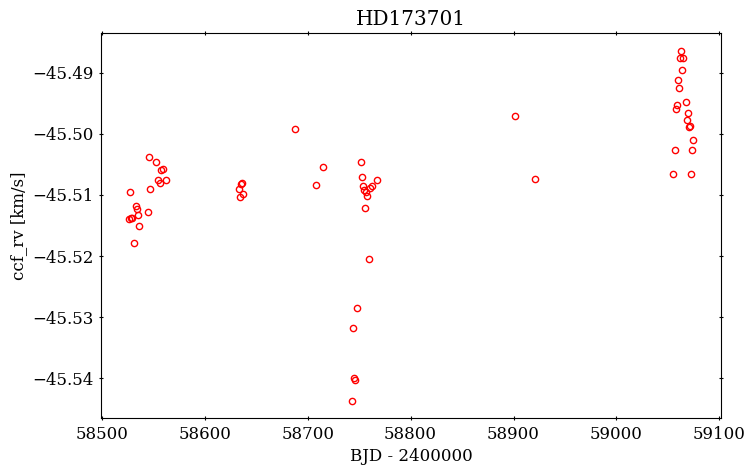

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset3_HR.bjd - 2400000, dataset3_HR.ccf_rv, 'o',
         markersize=4.5, markerfacecolor='None', markeredgecolor='red')
plt.title('HD173701')
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv [km/s]', fontsize=12)
plt.show()

In [ ]:
# print(len(dataset3_HR))
# cond2 = np.abs(dataset3_HR.ccf_rv - dataset3_HR.ccf_rv.mean()) < 0.1
dataset3_HR_limpio = dataset3_HR.copy()
# print(len(dataset3_HR_limpio))

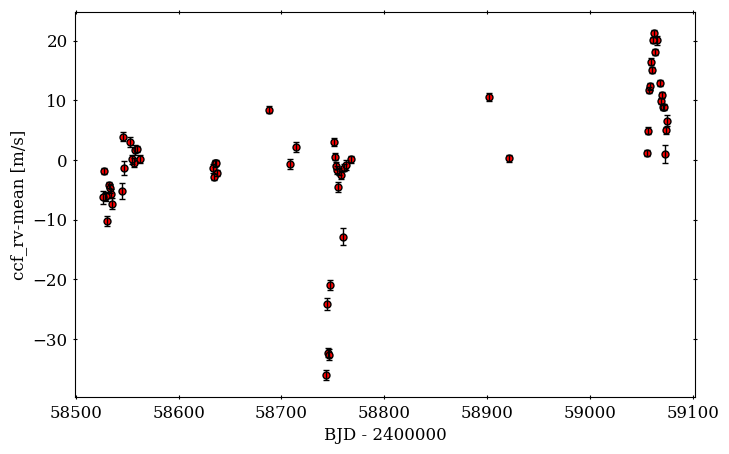

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset3_HR_limpio.bjd - 2400000, 1e3*(dataset3_HR_limpio.ccf_rv-dataset3_HR_limpio.ccf_rv.mean()), 'o',
         ms=5.0, mfc='red', mec='black')
plt.errorbar(dataset3_HR_limpio.bjd - 2400000, 1e3*(dataset3_HR_limpio.ccf_rv-dataset3_HR_limpio.ccf_rv.mean()),
             yerr=dataset3_HR_limpio.ccf_rv_error, fmt=' ', ecolor='black', elinewidth=1, capsize=2)
plt.xlabel('BJD - 2400000', fontsize=12)
plt.ylabel('ccf_rv-mean [m/s]', fontsize=12)
plt.show()

In [ ]:
columnas_no = ['file_ccf','target','date_start','date_end','file_e2ds',
               'modo','senti_seeing','colonne 23', 'colonne 24']
dataset3_HR_limpio_drop = dataset3_HR_limpio.drop(labels=columnas_no,axis=1)

## Feature engineering

In [ ]:
dataset3_HR_limpio_drop.loc[dataset3_HR_limpio_drop.guid_sky_level <= 0, 'guid_sky_level'] = 0
cleaning = dataset3_HR_limpio_drop.replace(to_replace={'guid_sky_level':0},value=np.nan)
imputer = SimpleImputer(strategy='median')
imputer.fit(cleaning)
X_5 = imputer.transform(cleaning)
dataset3_HR_limpio_2= pd.DataFrame(X_5, columns=dataset3_HR_limpio_drop.columns,index=dataset3_HR_limpio_drop.index)
#dataset2_HR_limpio_2 = dataset2_HR_limpio_drop.copy()

In [ ]:
# columnas que van a reemplazar a las max
temp1 = dataset3_HR_limpio_2.temp1_max-dataset3_HR_limpio_2.temp1_min
temp2 = dataset3_HR_limpio_2.temp3_max-dataset3_HR_limpio_2.temp3_min
temp3 = dataset3_HR_limpio_2.pres1_max-dataset3_HR_limpio_2.pres1_min
temp4 = dataset3_HR_limpio_2.pres2_max-dataset3_HR_limpio_2.pres2_min
temp5 = dataset3_HR_limpio_2.airm_end-dataset3_HR_limpio_2.airm_start
# hago el reemplazo pero en una copia del dataframe
dataset3_final = dataset3_HR_limpio_2.copy()
dataset3_final.temp1_max = temp1
dataset3_final.temp3_max = temp2
dataset3_final.pres1_max = temp3
dataset3_final.pres2_max = temp4
dataset3_final.airm_end = temp5
# y modifico los nombres de esas columnas
dataset3_final.rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'},inplace=True)
# NO CORRER DOS VECES
log_sky=np.log(dataset3_final['guid_sky_level'])
dataset3_final['guid_sky_level'] = log_sky

In [ ]:
dataset3_final['sn0/2'] = dataset3_final['cal_ext_sn0']/dataset3_final['cal_ext_sn2']
dataset3_final['sn7-8'] = dataset3_final['cal_ext_sn7'] - dataset3_final['cal_ext_sn8']
dataset3_final['sn14/16'] = dataset3_final['cal_ext_sn14']/dataset3_final['cal_ext_sn16']
dataset3_final['sn0-1'] = dataset3_final['cal_ext_sn0']-dataset3_final['cal_ext_sn1']
dataset3_final['sn8/9'] = dataset3_final['cal_ext_sn8']/dataset3_final['cal_ext_sn9']
dataset3_final['sn6-4'] = dataset3_final['cal_ext_sn6']-dataset3_final['cal_ext_sn4']
dataset3_final['sn0/27'] = dataset3_final['cal_ext_sn0']/dataset3_final['cal_ext_sn27']

dataset3_final['sn11-2'] = dataset3_final['cal_ext_sn11']-dataset3_final['cal_ext_sn2']
dataset3_final['sn23/12'] = dataset3_final['cal_ext_sn23']/dataset3_final['cal_ext_sn12']
dataset3_final['sn26-37'] = dataset3_final['cal_ext_sn26']-dataset3_final['cal_ext_sn37']
dataset3_final['sn22/34'] = dataset3_final['cal_ext_sn22']/dataset3_final['cal_ext_sn34']
dataset3_final['sn17-19'] = dataset3_final['cal_ext_sn17']-dataset3_final['cal_ext_sn19']
dataset3_final['sn2-8'] = dataset3_final['cal_ext_sn2'] - dataset3_final['cal_ext_sn8']
dataset3_final['sn32/33'] = dataset3_final['cal_ext_sn32']/dataset3_final['cal_ext_sn33']
dataset3_final['sn12/34'] = dataset3_final['cal_ext_sn12']/dataset3_final['cal_ext_sn34']
dataset3_final['sn13-38'] = dataset3_final['cal_ext_sn13'] - dataset3_final['cal_ext_sn38']
dataset3_final['sn5/33'] = dataset3_final['cal_ext_sn5']/dataset3_final['cal_ext_sn33']
dataset3_final['sn30-33'] = dataset3_final['cal_ext_sn30'] - dataset3_final['cal_ext_sn33']
dataset3_final['sn22/33'] = dataset3_final['cal_ext_sn22']/dataset3_final['cal_ext_sn33']
dataset3_final['airm_ratio'] = dataset3_HR_limpio_2['airm_end']/dataset3_HR_limpio_2['airm_start']
dataset3_final.head()

,colonne 2,colonne 3,colonne 4,colonne 5,colonne 6,colonne 7,colonne 8,colonne 9,colonne 10,colonne 11,...,sn22/34,sn17-19,sn2-8,sn32/33,sn12/34,sn13-38,sn5/33,sn30-33,sn22/33,airm_ratio
0,20.446,20.192,20.239,20.499,20.125,19.001,20.474,20.389,20.686,20.231,...,0.798567,-6.163170,-12.646168,1.030331,0.547833,-42.671553,0.399187,-2.263694,0.833098,1.010000
1,20.453,20.199,19.544,20.506,19.296,18.229,20.478,20.394,20.683,20.265,...,0.784700,-5.299639,-11.267018,1.033628,0.534680,-35.026519,0.380824,-1.430218,0.827726,0.973451
2,20.449,20.203,19.383,20.507,19.336,18.324,20.478,20.387,20.685,20.264,...,0.771981,-6.129133,-13.161048,1.030754,0.515835,-43.273102,0.359147,-2.055931,0.813865,0.973913
3,20.428,20.186,20.745,20.493,20.418,18.970,20.465,20.392,20.679,20.257,...,0.739480,-8.573300,-15.667073,1.026551,0.382763,-55.572663,0.177827,-4.590858,0.769795,1.048611
4,20.462,20.212,19.112,20.512,18.847,18.208,20.481,20.387,20.690,20.275,...,0.760228,-12.904195,-25.228769,1.036226,0.395405,-75.489087,0.168203,-1.390009,0.799861,0.951389


## Features estelares

In [ ]:
dataset3_final['teff'] = 5415 # morel et al 2021
dataset3_final['fe/h'] = 0.35
dataset3_final['logg'] = 4.497

In [ ]:
dataset3_final = dataset3_final[dataset_final.columns]

## Drop final

In [ ]:
dataset3_final_drop = dataset3_final.drop(labels=columnas_no_1 + columnas_no_2,axis=1)

t3_ = dataset3_final.ccf_rv
t3 = t3_ - t3_.mean()
X3 = dataset3_final_drop.copy()

weight3 = 1/(dataset3_final.ccf_rv_error/1e3)**2

# features que quedaron
print(X3.columns)
print(len(X3.columns))
print(len(t3))

Index(['ccf_contrast', 'berv', 'cal_ext_sn7', 'shutter_time', 'ins_adcnum',
       'pres1_dif', 'airm_dif', 'guid_seeing', 'guid_alpha_rms', 'drift_rv',
       'drift_rflux', 'colonne 3', 'colonne 7', 'colonne 16', 'colonne 17',
       'colonne 18', 'colonne 19', 'colonne 25', 'colonne 26', 'colonne 27',
       'colonne 30', 'sn6-4', 'sn17-19', 'sn30-33'],
      dtype='object')
24
62


## Tests

In [ ]:
#Gradient Boosting
X3_ = scaler.transform(X3)
modelo = gradb
predicciones3 = modelo.predict(X3_)

# #Polynomial LassoLars
# modelo = pr
# X3_ = scaler.transform(X3)
# X3_poly = poly.transform(X3_)
# predicciones3 = modelo.predict(X3_poly)

In [ ]:
predicciones3.mean()

-0.0006267309131392763

In [ ]:
sigma_sophie = dataset3_final.ccf_rv.std()*1e3
sigma_corrected_interpol = (dataset3_final.ccf_rv*1e3 - interpol2(dataset3_final.bjd-2400000)).std()
sigma_correccion_nuestra = (t3_-predicciones3).std()*1e3
sigma_correc_interpol = (t3-interpol2(dataset3_final.bjd-2400000)/1000).std()*1e3
print('dispersion SOPHIE:', sigma_sophie)
print('dispersion con correc interpol:', sigma_corrected_interpol)
print('dispersion con correc nuestra:', sigma_correccion_nuestra)

dispersion SOPHIE: 11.637133137309625
dispersion con correc interpol: 11.238756568963565
dispersion con correc nuestra: 10.364642612297054


In [ ]:
# plt.figure(figsize=(10,7))
# plt.plot(dataset3_final.bjd-2400000, (dataset3_final.ccf_rv-dataset3_final.ccf_rv.mean())*1e3, 'o', label='rvs')
# plt.plot(dataset3_final.bjd-2400000, predicciones3*1e3, 'o', label='modelo')
# plt.plot(dataset3_final.bjd-2400000, interpol2(dataset3_final.bjd-2400000), 'o', label='master correction')
# plt.legend(loc='best')
# plt.show()

## Pair plots

(-2.0, 2.0)

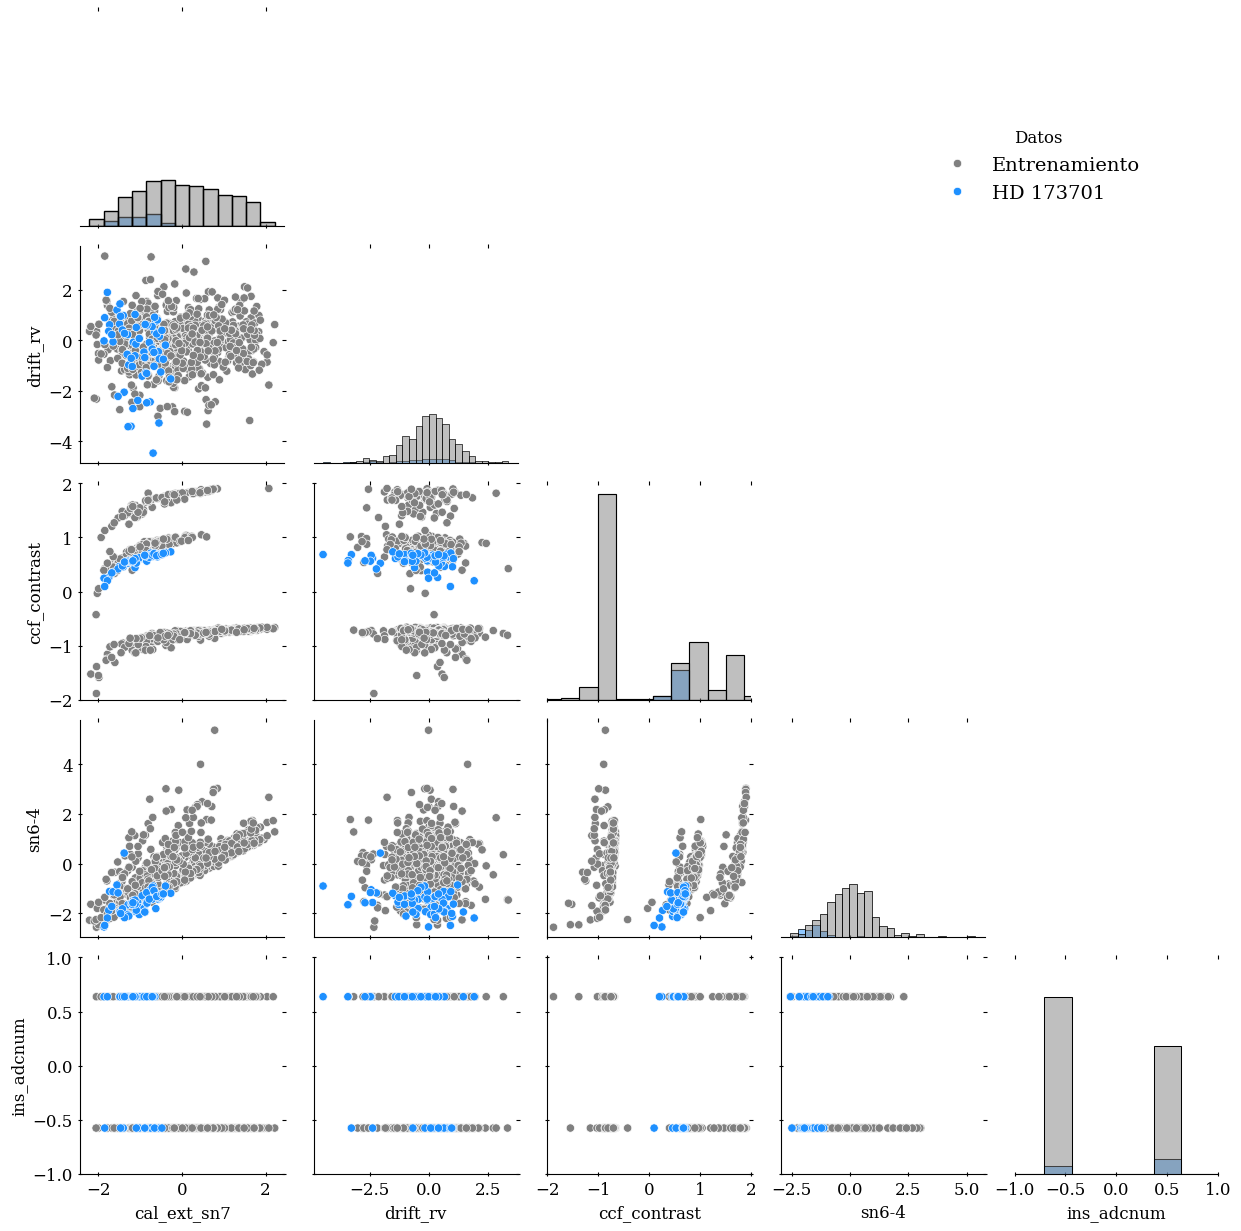

In [ ]:
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.rcParams['figure.dpi'] = 300
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.4)

entrena = pd.DataFrame(X_train_, columns=X_.columns)
x333 = scaler.transform(X3)
nueva = pd.DataFrame(x333, columns=X3.columns)

entrena['Datos'] = 'Entrenamiento'
nueva['Datos'] = 'HD 173701'
colu = entrena.columns.tolist()
colu.remove('Datos')

most_important = list(pd.Series(gradb.feature_importances_, X_.columns).sort_values(ascending=False).keys())[0:5]

pair_df = pd.concat([entrena, nueva], axis=0, ignore_index=True)
g = sns.PairGrid(pair_df, vars=most_important, hue='Datos', layout_pad=0.2, palette={'Entrenamiento': 'gray','HD 173701': 'dodgerblue'}, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend(title='Datos', loc='upper right', bbox_to_anchor=(0.8, 0.9), fontsize=14, title_fontsize=28)
g.axes[4,0].set_ylim(-1.,1.)
g.axes[4,4].set_xlim(-1.,1.)
g.axes[4,2].set_xlim(-2.,2.)
g.axes[2,0].set_ylim(-2.,2.)
#plt.savefig('drive/MyDrive/Tesis/pair_HD173701.png', dpi=200, bbox_inches='tight')

# Test final 39 estrellas

In [ ]:
list_of_targets = ['HD73344', 'HD163183', 'HD161284', 'Kepler16', 'TOI1718',
       'TOI1273', 'TOI2134', 'J2006+59', 'J0543+30',
       'TOI1736', 'J0723+79', 'J2359+44', 'J0515+42', 'J0128+39',
       'J0002+47', 'J0410+37', 'HD9939', 'TOI-1386',
       'J1840+34', 'HD13974', 'J0610+31', 'J2343+29',
       'J1909+29', 'J1930+28', 'J2338+29', 'HD195987',
       'J2315+23', 'J1321+32', 'J1250+26', 'TOI1471', 'J0602+27',
       'TOI1710', 'J0316+40', 'J2233+43', 'TOI-1259', 'J1238+31',
       'J1640+49', 'J0626+29', 'J1555+26']
print(len(list_of_targets))
# drop las que tienen muchas columnas con todos nans que son 6
remove = ['Kepler16', 'J0543+30', 'J1909+29', 'J2338+29', 'J2315+23', 'J0602+27', 'J2233+43', 'J0626+29']
for i in remove:
  list_of_targets.remove(i)
print(len(list_of_targets))

# muchos nans?

# for i in targets.keys():
#   for j in targets[i].columns:
#     asd = targets[i][j].isna().sum()
#     if asd == len(targets[i]):
#       #print(j)
#       print(i)

39
31


In [ ]:
from scipy import stats
from sklearn.impute import SimpleImputer
targets = {}
stars = ['HD73344', 'HD163183', 'HD161284', 'TOI-1386']
no_sirven = ['Unnamed: 0', 'fecha', 'hora', 'colonne 29']

for i in list_of_targets:
  ccf = pd.read_table('drive/MyDrive/Tesis/new_data/dataset_ccf_'+i+'.dat', sep='\s+', names=names).drop(columns=['date_start'])
  e2ds = pd.read_table('drive/MyDrive/Tesis/new_data/dataset_e2ds_'+i+'.dat', sep='\s+', names=columnas_e2ds).drop(columns=['target', 'bjd'])
  #targets["dataset_prel_{0}".format(i)] = pd.concat([ccf,e2ds], axis=1)
  ccf_e2ds = pd.concat([ccf, e2ds], axis=1)
  cond = ccf_e2ds.date_start.str.contains('2021', regex=False)
  ccf_e2ds_no21 = ccf_e2ds.loc[-cond]
  dataset_HR = ccf_e2ds_no21.copy()
  #print(dataset_HR.ccf_rv.std())
  if dataset_HR.ccf_rv.std() < 1:
    lens = len(dataset_HR)
    print(lens, dataset_HR.ccf_rv.std())
    if 'HD73344' in i:
      temperatur = pd.read_csv('drive/MyDrive/Tesis/new_data/temperaturas_extraidas_HD73344.csv').drop(labels=no_sirven, axis=1)
      temperatur_ = temperatur.replace(to_replace=0, value=np.nan)
      imputer = SimpleImputer(strategy='median')
      imputer.fit(temperatur_)
      temperatur_ = imputer.transform(temperatur_)
      temperaturs = pd.DataFrame(temperatur_, columns=temperatur.columns, index=temperatur.index)
      dataset_HR = pd.concat([temperaturs, dataset_HR.set_index(temperatur.index)], axis=1)
    elif 'HD163183' in i:
      temperatur = pd.read_csv('drive/MyDrive/Tesis/new_data/temperaturas_extraidas_HD163183.csv').drop(labels=no_sirven, axis=1)
      temperatur_ = temperatur.replace(to_replace=0, value=np.nan)
      imputer = SimpleImputer(strategy='median')
      imputer.fit(temperatur_)
      temperatur_ = imputer.transform(temperatur_)
      temperaturs = pd.DataFrame(temperatur_, columns=temperatur.columns, index=temperatur.index)
      dataset_HR = pd.concat([temperaturs, dataset_HR.set_index(temperatur.index)], axis=1)
    elif 'HD161284' in i:
      temperatur = pd.read_csv('drive/MyDrive/Tesis/new_data/temperaturas_extraidas_HD161284.csv').drop(labels=no_sirven, axis=1)
      temperatur_ = temperatur.replace(to_replace=0, value=np.nan)
      imputer = SimpleImputer(strategy='median')
      imputer.fit(temperatur_)
      temperatur_ = imputer.transform(temperatur_)
      temperaturs = pd.DataFrame(temperatur_, columns=temperatur.columns, index=temperatur.index)
      dataset_HR = pd.concat([temperaturs, dataset_HR.set_index(temperatur.index)], axis=1)
    elif 'TOI-1386' in i:
      temperatur = pd.read_csv('drive/MyDrive/Tesis/new_data/temperaturas_extraidas_TOI-1386.csv').drop(labels=no_sirven, axis=1)
      temperatur_ = temperatur.replace(to_replace=0, value=np.nan)
      imputer = SimpleImputer(strategy='median')
      imputer.fit(temperatur_)
      temperatur_ = imputer.transform(temperatur_)
      temperaturs = pd.DataFrame(temperatur_, columns=temperatur.columns, index=temperatur.index)
      dataset_HR = pd.concat([temperaturs, dataset_HR.set_index(temperatur.index)], axis=1)
    else:
      dataset_HR['colonne 2'] = 0  # NO USAR NINGUNA COLONNE
      dataset_HR['colonne 3'] = 0
      dataset_HR['colonne 4'] = 0
      dataset_HR['colonne 5'] = 0
      dataset_HR['colonne 6'] = 0
      dataset_HR['colonne 7'] = 0
      dataset_HR['colonne 8'] = 0
      dataset_HR['colonne 9'] = 0
      dataset_HR['colonne 10'] = 0
      dataset_HR['colonne 11'] = 0
      dataset_HR['colonne 12'] = 0
      dataset_HR['colonne 13'] = 0
      dataset_HR['colonne 14'] = 0
      dataset_HR['colonne 15'] = 0
      dataset_HR['colonne 16'] = 0
      dataset_HR['colonne 17'] = 0
      dataset_HR['colonne 18'] = 0
      dataset_HR['colonne 19'] = 0
      dataset_HR['colonne 20'] = 0
      dataset_HR['colonne 21'] = 0
      dataset_HR['colonne 22'] = 0
      dataset_HR['colonne 25'] = 0
      dataset_HR['colonne 26'] = 0
      dataset_HR['colonne 27'] = 0
      dataset_HR['colonne 28'] = 0
      dataset_HR['colonne 30'] = 0
      dataset_HR['colonne 31'] = 0

    dataset_HR = dataset_HR.loc[dataset_HR['modo'] == 'HR']
    dataset_HR = dataset_HR[(np.abs(stats.zscore(dataset_HR['ccf_rv'])) < 3)]
    columnas_no_ = ['file_ccf','target','date_start','date_end','file_e2ds','modo','senti_seeing']
    dataset_HR['senti_text'] = 0  # NO USAR ESTA COLUMNA
    dataset_HR['senti_mag'] = 0  # NO USAR ESTA COLUMNA
    dataset_HR = dataset_HR.drop(labels=columnas_no_, axis=1)
    if lens >= 20:
      dataset_HR.loc[dataset_HR.guid_sky_level < 0, 'guid_sky_level'] = 0
      cleaning = dataset_HR.replace(to_replace={'guid_sky_level':0, 'senti_text': 9999, 'senti_mag': 9999, 'temp1_min': 0,'temp1_max': 0,
                                              'temp3_min': 0,'temp3_max': 0,'pres2_min': 0,'pres2_max': 0,'pres1_min': 0,'pres1_max': 0}, value = np.nan)
      imputer = SimpleImputer(missing_values=np.nan, strategy='median')
      imputer.fit(cleaning)
      Xn = imputer.transform(cleaning)
      temp = pd.DataFrame(Xn, columns=dataset_HR.columns, index=dataset_HR.index)
      targets["dataset_{0}".format(i)] = temp

322 0.03863888803202007
146 0.03737662561689807
94 0.016075444840680853
34 0.010333457638767429
31 0.03679621021247056
29 0.009912694250382489
30 0.022470069728721266
24 0.022890204476829136
20 0.014145476071544068
23 0.012835316261099041
21 0.06225667288314821


In [ ]:
targets.keys()

dict_keys(['dataset_HD73344', 'dataset_HD163183', 'dataset_HD161284', 'dataset_TOI1718', 'dataset_TOI1273', 'dataset_TOI2134', 'dataset_TOI1736', 'dataset_TOI-1386', 'dataset_TOI1471', 'dataset_TOI1710', 'dataset_TOI-1259'])

In [ ]:
tests = {}
rvs = {}
wgs = {}
lens = {}

for i in targets.keys():
  # columnas que van a reemplazar a las max
  cp = targets[i].copy()
  temp1 = targets[i].temp1_max-targets[i].temp1_min
  temp2 = targets[i].temp3_max-targets[i].temp3_min
  temp3 = targets[i].pres1_max-targets[i].pres1_min
  temp4 = targets[i].pres2_max-targets[i].pres2_min
  temp5 = targets[i].airm_end-targets[i].airm_start
  # hago el reemplazo
  targets[i].temp1_max = temp1
  targets[i].temp3_max = temp2
  targets[i].pres1_max = temp3
  targets[i].pres2_max = temp4
  targets[i].airm_end = temp5
  # y modifico los nombres de esas columnas
  targets[i].rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'}, inplace=True)
  # NO CORRER DOS VECES
  log_sky=np.log(targets[i]['guid_sky_level'])
  targets[i]['guid_sky_level'] = log_sky
  # nuevas nuevas
  targets[i]['sn0/2'] = targets[i]['cal_ext_sn0']/targets[i]['cal_ext_sn2']
  targets[i]['sn7-8'] = targets[i]['cal_ext_sn7'] - targets[i]['cal_ext_sn8']
  targets[i]['sn14/16'] = targets[i]['cal_ext_sn14']/targets[i]['cal_ext_sn16']
  targets[i]['sn0-1'] = targets[i]['cal_ext_sn0']-targets[i]['cal_ext_sn1']
  targets[i]['sn8/9'] = targets[i]['cal_ext_sn8']/targets[i]['cal_ext_sn9']
  targets[i]['sn6-4'] = targets[i]['cal_ext_sn6']-targets[i]['cal_ext_sn4']
  targets[i]['sn0/27'] = targets[i]['cal_ext_sn0']/targets[i]['cal_ext_sn27']
  targets[i]['sn11-2'] = targets[i]['cal_ext_sn11']-targets[i]['cal_ext_sn2']
  targets[i]['sn23/12'] = targets[i]['cal_ext_sn23']/targets[i]['cal_ext_sn12']
  targets[i]['sn26-37'] = targets[i]['cal_ext_sn26']-targets[i]['cal_ext_sn37']
  targets[i]['sn22/34'] = targets[i]['cal_ext_sn22']/targets[i]['cal_ext_sn34']
  targets[i]['sn17-19'] = targets[i]['cal_ext_sn17']-targets[i]['cal_ext_sn19']
  targets[i]['sn2-8'] = targets[i]['cal_ext_sn2'] - targets[i]['cal_ext_sn8']
  targets[i]['sn32/33'] = targets[i]['cal_ext_sn32']/targets[i]['cal_ext_sn33']
  targets[i]['sn12/34'] = targets[i]['cal_ext_sn12']/targets[i]['cal_ext_sn34']
  targets[i]['sn13-38'] = targets[i]['cal_ext_sn13'] - targets[i]['cal_ext_sn38']
  targets[i]['sn5/33'] = targets[i]['cal_ext_sn5']/targets[i]['cal_ext_sn33']
  targets[i]['sn30-33'] = targets[i]['cal_ext_sn30'] - targets[i]['cal_ext_sn33']
  targets[i]['sn22/33'] = targets[i]['cal_ext_sn22']/targets[i]['cal_ext_sn33']
  targets[i]['airm_ratio'] = cp['airm_end']/cp['airm_start']
  if 'HD73344' in i:
    targets[i]['teff'] = 6243
    targets[i]['fe/h'] = 0.08
    targets[i]['logg'] = 4.36
  elif 'HD163183' in i:
    targets[i]['teff'] = 5847
    targets[i]['fe/h'] = -0.10
    targets[i]['logg'] = 4.28
  elif 'HD161284' in i:
    targets[i]['teff'] = 5011
    targets[i]['fe/h'] = 0.12
    targets[i]['logg'] = 4.50
  elif 'TOI-1386' in i:
    targets[i]['teff'] = 5724
    targets[i]['fe/h'] = -0.016
    targets[i]['logg'] = 4.36
  else:
    targets[i]['teff'] = 5586  # ACA HAY QUE BUSCAR LOS VALORES REALES, NO PORQUE NO LAS USAMOS IGUAL
    targets[i]['fe/h'] = -0.20  # ACA HAY QUE BUSCAR LOS VALORES REALES
    targets[i]['logg'] = 4.440  # ACA HAY QUE BUSCAR LOS VALORES REALES

  targets[i] = targets[i][dataset_final.columns]
  print(targets[i].drift_rv.mean(), targets[i].drift_rv.std(), i)
  if targets[i].drift_rv.mean() != 0.0:
    #DROP FINAL
    targets_drop = targets[i].drop(labels = columnas_no_1 + columnas_no_2, axis = 1)
    tests["{0}".format(i)] = targets_drop
    rvs["{0}".format(i)] = targets[i].ccf_rv - targets[i].ccf_rv.mean()
    wgs["{0}".format(i)] = 1/(targets[i].ccf_rv_error/1e3)**2
    lens["{0}".format(i)] = len(targets[i])

-2.6283325728749083 2.623721817811545 dataset_HD73344
-0.639414103908928 1.667470330593977 dataset_HD163183
-1.0898495800204722 1.8996778986600014 dataset_HD161284
0.0 0.0 dataset_TOI1718
0.0 0.0 dataset_TOI1273
0.0 0.0 dataset_TOI2134
0.0 0.0 dataset_TOI1736
-1.2847804635926112 1.2529812212155451 dataset_TOI-1386
0.0 0.0 dataset_TOI1471
0.0 0.0 dataset_TOI1710
0.0 0.0 dataset_TOI-1259


In [ ]:
tests.keys()

dict_keys(['dataset_HD73344', 'dataset_HD163183', 'dataset_HD161284', 'dataset_TOI-1386'])

## Test

In [ ]:
#Gradient Boosting
std_1 = {}
std_2 = {}
std_3 = {}

# agreguemos primero las estrellas que ya tenemos
std_1['dataset_HD207897'] = (dataset5_final.ccf_rv - dataset5_final.ccf_rv.mean()).std()*1e3
std_1['dataset_HD173701'] = (dataset3_final.ccf_rv - dataset3_final.ccf_rv.mean()).std()*1e3

std_2['dataset_HD207897'] = (dataset5_final.ccf_rv - predicciones5).std()*1e3
std_2['dataset_HD173701'] = (dataset3_final.ccf_rv - predicciones3).std()*1e3

std_3['dataset_HD207897'] = (dataset5_final.ccf_rv - interpol2(dataset5_final.bjd-2400000)/1000).std()*1e3
std_3['dataset_HD173701'] = (dataset3_final.ccf_rv - interpol2(dataset3_final.bjd-2400000)/1000).std()*1e3

plot_bjd = {}
plot_gb = {}
plot_rv = {}
plot_master = {}

for i in tests.keys():
  testing = scaler.transform(tests[i])
  modelo = gradb
  predict = modelo.predict(testing)

  # modelo = pr
  # X5_ = scaler.transform(X5)
  # testing_poly = poly.transform(testing)
  # predict = modelo.predict(testing_poly)
  master = interpol2(targets[i].bjd-2400000)/1000
  std1 = rvs[i].std()*1e3
  std_1["{0}".format(i)] = std1

  std2 = (rvs[i]-predict).std()*1e3
  std_2["{0}".format(i)] = std2

  std3 = (rvs[i]-master).std()*1e3
  std_3["{0}".format(i)] = std3

  plot_bjd["{0}".format(i)] = targets[i].bjd-2450000
  plot_gb["{0}".format(i)] = predict*1e3
  plot_rv["{0}".format(i)] = rvs[i]*1e3
  plot_master["{0}".format(i)] = master*1e3

  print(predict.mean()*1e3, master.mean()*1e3)
  if std1 > std2:
    print('std1:', std1, 'std2:', std2, '------- dif:', std1-std2, ', master correction:', std1-std3)
  else:
    print('std1:', std1, 'no improvement:', std1-std2, ', master correction:', std1-std3)
  # plt.rcParams['figure.figsize'] = [5, 5]
  # plt.rcParams['figure.dpi'] = 300
  # sns.set_style("ticks", {'axes.grid' : False})
  # sns.set_context("paper", font_scale=1.4)

  entrena = pd.DataFrame(X_train_, columns=X_.columns)
  x555 = scaler.transform(tests[i])
  nueva = pd.DataFrame(x555, columns=tests[i].columns)
  entrena['Datos'] = 'Entrenamiento'
  nueva['Datos'] = i[8:]
  colu = entrena.columns.tolist()
  colu.remove('Datos')

  most_important = list(pd.Series(gradb.feature_importances_, X_.columns).sort_values(ascending=False).keys())[0:5]

  # pair_df = pd.concat([entrena, nueva], axis=0, ignore_index=True)
  # g = sns.PairGrid(pair_df, vars=most_important, hue='Datos', layout_pad=0.2, palette={'Entrenamiento': 'gray', i[8:]: 'dodgerblue'}, corner=True)
  # g.map_diag(sns.histplot)
  # g.map_lower(sns.scatterplot)
  # g.add_legend(title='Datos', loc='upper right', bbox_to_anchor=(0.8, 0.9), fontsize=14, title_fontsize=28)
  # g.axes[4,0].set_ylim(-1.,1.)
  # g.axes[4,4].set_xlim(-1.,1.)
  # g.axes[4,2].set_xlim(-2.,2.)
  # g.axes[2,0].set_ylim(-2.,2.)
  # #plt.savefig('drive/MyDrive/Tesis/pair_'+str(i[8:])+'.png', dpi=200, bbox_inches='tight')

-0.5874311541350798 2.7965856225964134
std1: 20.33494600488568 std2: 20.216240977755742 ------- dif: 0.11870502712993769 , master correction: -0.034184315360118234
-2.591699701838259 3.9235440768279304
std1: 34.99848621477634 std2: 34.853329122445565 ------- dif: 0.145157092330777 , master correction: 0.021520280246100754
-4.804210455153492 3.786977696626984
std1: 16.075444840680856 no improvement: -0.1279371707654171 , master correction: 0.10903721364688046
-8.785549451314823 3.034605186395842
std1: 18.211728899655853 no improvement: -0.9745198677980689 , master correction: -0.6399939698901882


In [ ]:
for i in tests.keys():
  print(i[8:])

HD73344
HD163183
HD161284
TOI-1386


In [ ]:
# SUMEMOS A LOS DICT LAS ANTERIORES
plot_bjd['dataset_HD207897'] = dataset5_final.bjd-2450000
plot_bjd['dataset_HD173701'] = dataset3_final.bjd-2450000
plot_gb['dataset_HD207897'] = predicciones5*1e3
plot_gb['dataset_HD173701'] = predicciones3*1e3
plot_rv['dataset_HD207897'] = (dataset5_final.ccf_rv - dataset5_final.ccf_rv.mean())*1e3
plot_rv['dataset_HD173701'] = (dataset3_final.ccf_rv - dataset3_final.ccf_rv.mean())*1e3
plot_master['dataset_HD207897'] = interpol2(dataset5_final.bjd-2400000)
plot_master['dataset_HD173701'] = interpol2(dataset3_final.bjd-2400000)

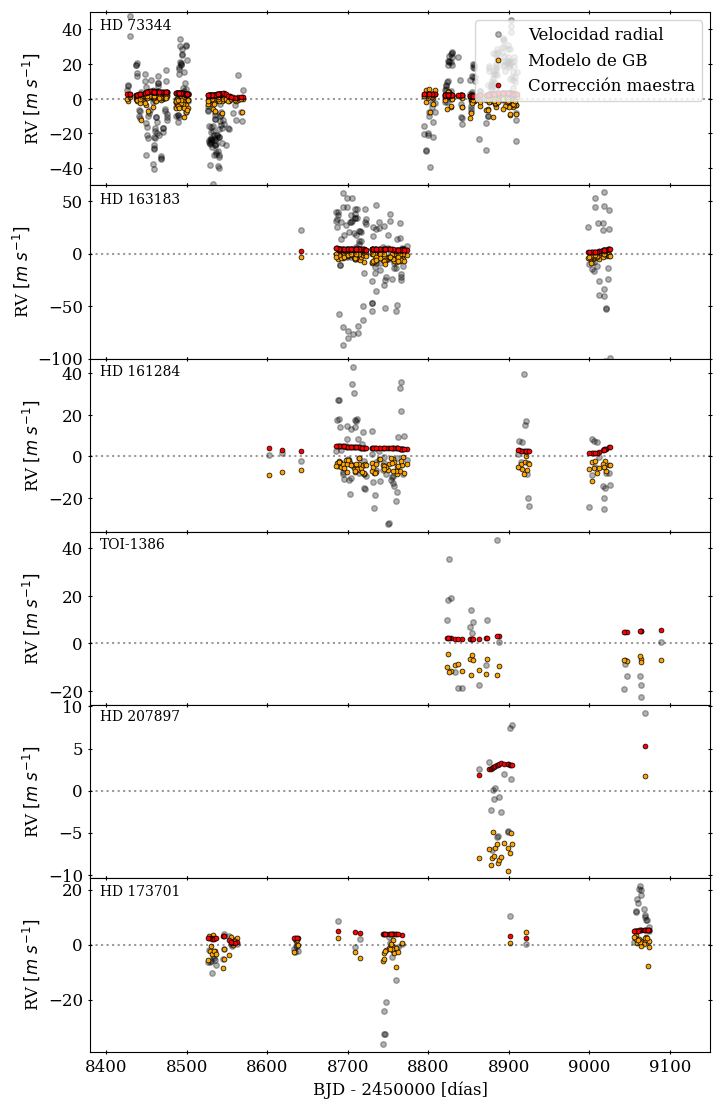

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 13.5]
# plt.rcParams['figure.dpi'] = 150
# sns.set_style("ticks", {'axes.grid' : False})
# sns.set_context("paper", font_scale=1.0)

targ = list(plot_bjd.keys())
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(8,13.5))
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0)

axs[0].plot(plot_bjd[targ[0]], plot_rv['dataset_HD73344'], ".", color='k',mec='k', alpha=0.3, markersize=8, label='Velocidad radial')
axs[0].plot(plot_bjd[targ[0]], plot_gb['dataset_HD73344'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1, label='Modelo de GB')
axs[0].plot(plot_bjd[targ[0]], plot_master['dataset_HD73344'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1, label='Corrección maestra')
axs[0].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[0].legend(loc='upper right')
axs[0].annotate('HD 73344', xy=(8392,40), size=10)#, bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))

axs[1].plot(plot_bjd['dataset_HD163183'], plot_rv['dataset_HD163183'], ".", color='k',mec='k', alpha=0.3, markersize=8)
axs[1].plot(plot_bjd['dataset_HD163183'], plot_gb['dataset_HD163183'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[1].plot(plot_bjd['dataset_HD163183'], plot_master['dataset_HD163183'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[1].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[1].annotate('HD 163183', xy=(8392,47.9), size=10)#, bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))
#ax.tick_params(axis='both', which='both', left=False, bottom=False, top=False, right=False, pad=2)

axs[2].plot(plot_bjd['dataset_HD161284'], plot_rv['dataset_HD161284'], ".", color='k',mec='k', alpha=0.3, markersize=8)
axs[2].plot(plot_bjd['dataset_HD161284'], plot_gb['dataset_HD161284'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[2].plot(plot_bjd['dataset_HD161284'], plot_master['dataset_HD161284'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[2].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[2].annotate('HD 161284', xy=(8392,38.7), size=10)#, bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))

axs[3].plot(plot_bjd['dataset_TOI-1386'], plot_rv['dataset_TOI-1386'], '.', color='k',mec='k', alpha=0.3, markersize=8)
axs[3].plot(plot_bjd['dataset_TOI-1386'], plot_gb['dataset_TOI-1386'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[3].plot(plot_bjd['dataset_TOI-1386'], plot_master['dataset_TOI-1386'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[3].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[3].annotate('TOI-1386', xy=(8392,39.7), size=10)#, bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))

axs[4].plot(plot_bjd['dataset_HD207897'], plot_rv['dataset_HD207897'], '.', color='k',mec='k', alpha=0.3, markersize=8)
axs[4].plot(plot_bjd['dataset_HD207897'], plot_gb['dataset_HD207897'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[4].plot(plot_bjd['dataset_HD207897'], plot_master['dataset_HD207897'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[4].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[4].annotate('HD 207897', xy=(8392,8.25), size=10)#, bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))

axs[5].plot(plot_bjd['dataset_HD173701'], plot_rv['dataset_HD173701'], '.', color='k',mec='k', alpha=0.3, markersize=8)
axs[5].plot(plot_bjd['dataset_HD173701'], plot_gb['dataset_HD173701'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[5].plot(plot_bjd['dataset_HD173701'], plot_master['dataset_HD173701'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1)
axs[5].hlines(0, 8380,9150, colors='k', linestyles='dotted', alpha=0.4)
axs[5].annotate('HD 173701', xy=(8392,17.8), size=10)# bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1))

axs[0].set_xlim(8380,9150)
axs[0].set_ylim(-50,50)
axs[1].set_ylim(-100,65)

axs[0].set_ylabel('RV $[m~s^{-1}]$')
axs[1].set_ylabel('RV $[m~s^{-1}]$')
axs[2].set_ylabel('RV $[m~s^{-1}]$')
axs[3].set_ylabel('RV $[m~s^{-1}]$')
axs[4].set_ylabel('RV $[m~s^{-1}]$')
axs[5].set_ylabel('RV $[m~s^{-1}]$')
axs[5].set_xlabel('BJD - 2450000 [días]')
#plt.savefig('drive/MyDrive/Tesis/comparacion_modelo3.png', facecolor='white', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# plt.plot(plot_bjd[targ[0]], plot_rv['dataset_HD73344'], ".", color='k',mec='k', alpha=0.3, markersize=8, label='Velocidad radial')
# plt.plot(plot_bjd[targ[0]], plot_gb['dataset_HD73344'], 'o', color='orange', mec='k', mew=0.5, markersize=3.5, alpha=1, label='Modelo de GB')
# plt.plot(plot_bjd[targ[0]], plot_master['dataset_HD73344'], 'o', color='red', mec='k', mew=0.5, markersize=3.5, alpha=1, label='Corrección maestra')
for i in plot_master.keys():
  print(i)
  print(plot_master[i].mean())
  print(plot_gb[i].mean())
  print(plot_master[i].mean()-plot_gb[i].mean())
  #print(i)

dataset_HD73344
2.796585622596413
-0.5874311541350797
3.384016776731493
dataset_HD163183
3.9235440768279313
-2.591699701838258
6.515243778666189
dataset_HD161284
3.786977696626984
-4.804210455153493
8.591188151780477
dataset_TOI-1386
3.0346051863958414
-8.785549451314825
11.820154637710667
dataset_HD207897
3.035403506267363
-6.7606820217774874
9.79608552804485
dataset_HD173701
3.603356156571143
-0.6267309131392762
4.230087069710419


In [ ]:
# df_bjd = pd.concat([plot_bjd['dataset_HD73344'], plot_bjd['dataset_HD163183'], plot_bjd['dataset_HD161284'],
#                 plot_bjd['dataset_TOI-1386'], plot_bjd['dataset_HD207897'], plot_bjd['dataset_HD173701']], ignore_index=True)
# df_gb = pd.concat([pd.Series(plot_gb['dataset_HD73344']), pd.Series(plot_gb['dataset_HD163183']), pd.Series(plot_gb['dataset_HD161284']),
#                 pd.Series(plot_gb['dataset_TOI-1386']), pd.Series(plot_gb['dataset_HD207897']), pd.Series(plot_gb['dataset_HD173701'])], ignore_index=True)


# df_ = df_joint.sort_values(by='bjd')

# df_filt = block_reduce(df_[0], block_size=(15,), func=np.mean, cval=np.mean(df_[0]))
# df_filt_date = block_reduce(df_['bjd'], block_size=(15,), func=np.mean, cval=np.mean(df_['bjd']))
# df_interpol = interpolate.interp1d(df_filt_date, df_filt)

# fig, ax = plt.subplots(figsize=(6,3))

# ax.plot(df_bjd, df_gb, 'o')
# ax.plot(df_filt_date, df_filt, 'o', color='k')
# ax.plot(df_filt_date, df_interpol(df_filt_date), lw=1, color='red')

In [ ]:
std__1 = np.array(list(std_1.values()))
std__2 = np.array(list(std_2.values()))
std__3 = np.array(list(std_3.values()))

data = np.matrix((std__1, std__2, std__3))

data = pd.DataFrame(data.transpose(),
                    index=list(std_1.keys()),
                    columns=['std1', 'std2', 'std3'])

In [ ]:
orden_correcto = ['dataset_HD73344','dataset_HD163183','dataset_HD161284','dataset_HD173701','dataset_TOI-1386','dataset_HD207897']
names_ = ['HD 73344','HD 163183','HD 161284','HD 173701', 'TOI 1386', 'HD 207897']
data = data.reindex(orden_correcto)
data.rename(index={orden_correcto[0]:names_[0],orden_correcto[1]:names_[1],orden_correcto[2]:names_[2],orden_correcto[3]:names_[3],orden_correcto[4]:names_[4],orden_correcto[5]:names_[5]}, inplace=True)
list(data.index)

['HD 73344', 'HD 163183', 'HD 161284', 'HD 173701', 'TOI 1386', 'HD 207897']

In [ ]:
data['y2_coc'] = data.std1/data.std2
data['y3_coc'] = data.std1/data.std3
data['Estrella'] = names_

In [ ]:
data

,std1,std2,std3,y2_coc,y3_coc,Estrella
HD 73344,20.334946,20.216241,20.369130,1.005872,0.998322,HD 73344
HD 163183,34.998486,34.853329,34.976966,1.004165,1.000615,HD 163183
HD 161284,16.075445,16.203382,15.966408,0.992104,1.006829,HD 161284
HD 173701,11.637133,10.364643,11.238757,1.122772,1.035447,HD 173701
TOI 1386,18.211729,19.186249,18.851723,0.949207,0.966051,TOI 1386
HD 207897,4.816328,3.951943,4.621692,1.218724,1.042114,HD 207897


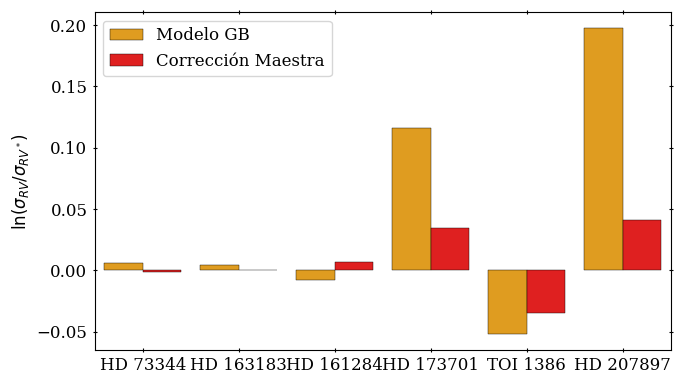

In [ ]:
# plt.rcParams['figure.figsize'] = [7, 4]
# plt.rcParams['figure.dpi'] = 200
# sns.set_style("ticks", {'axes.grid' : True})
# sns.set_context("paper", font_scale=1.0)

fig, axs = plt.subplots(figsize=(7, 4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None)
x = list(data.index)

#colors = ['green' if _y >=1 else 'red' for _y in y2_coc]
#colors = ['green' if _y >=1 else 'red' for _y in y3_coc]

df = pd.DataFrame({
    'Estrella': list(data.index),
    'Modelo GB': np.log(data.y2_coc),
    'Corrección Maestra': np.log(data.y3_coc)
})

tidy = df.melt(id_vars='Estrella').rename(columns=str.title)
sns.barplot(x='Estrella', y='Value', hue='Variable', edgecolor='k', lw=0.3, data=tidy, ax=axs, palette={'Modelo GB':'orange', 'Corrección Maestra':'red'})
axs.legend(loc='upper left', frameon=True)
axs.set_xlabel('')
axs.set_ylabel('$\ln(\sigma_{RV}/\sigma_{RV^*})$')
plt.tight_layout()
#plt.savefig('drive/MyDrive/Tesis/cocientes_dispersiones2.png', facecolor='white', dpi=300, bbox_inches='tight')

# Test planetas

In [ ]:
list_of_targets2 = ['HD224016', 'HD17820', 'BD+700503', 'TOI1273', 'TOI1736', 'TOI2134', 'TOI1710',
                  'TOI1296', 'TOI1298', 'HD88986', 'HD207897', 'J165631']


print(len(list_of_targets2))
# drop las que tienen muchas columnas con todos nans que son 6
# remove = ['Kepler16', 'J0543+30', 'J1909+29', 'J2338+29', 'J2315+23', 'J0602+27', 'J2233+43', 'J0626+29']
# for i in remove:
#   list_of_targets.remove(i)
# print(len(list_of_targets))

# muchos nans?

# for i in targets.keys():
#   for j in targets[i].columns:
#     asd = targets[i][j].isna().sum()
#     if asd == len(targets[i]):
#       #print(j)
#       print(i)

12


In [ ]:
targets2 = {}

for i in list_of_targets2:
  ccf = pd.read_table('drive/MyDrive/Tesis/with_planets/planets_dataset_ccf_'+i+'.dat', sep='\s+', names=names).drop(columns=['date_start'])
  e2ds = pd.read_table('drive/MyDrive/Tesis/with_planets/planets_dataset_e2ds_'+i+'.dat', sep='\s+', names=columnas_e2ds).drop(columns=['target', 'bjd'])
  #targets2["dataset_prel_{0}".format(i)] = pd.concat([ccf,e2ds], axis=1)
  ccf_e2ds = pd.concat([ccf, e2ds], axis=1)
  cond = ccf_e2ds.date_start.str.contains('2021', regex=False)
  ccf_e2ds_no21 = ccf_e2ds.loc[-cond]
  dataset_HR = ccf_e2ds_no21.copy()
  temperatur = pd.read_csv('drive/MyDrive/Tesis/with_planets/temperaturas_extraidas_nuevas'+i+'.csv').drop(labels=no_sirven, axis=1)
  temperatur_ = temperatur.replace(to_replace=0, value=np.nan)
  imputer = SimpleImputer(strategy='median')
  imputer.fit(temperatur_)
  temperatur_ = imputer.transform(temperatur_)
  temperaturs = pd.DataFrame(temperatur_, columns=temperatur.columns, index=temperatur.index)
  dataset_HR = pd.concat([temperaturs, dataset_HR.set_index(temperatur.index)], axis=1)
  print(i)
  print(len(dataset_HR))
  dataset_HR = dataset_HR.loc[dataset_HR['modo'] == 'HR'] # Acá se elimina J165631 porque tiene 19 obs. en HE mode y ninguna en HR
  print(len(dataset_HR))
  if len(dataset_HR) > 0:
    asd = dataset_HR.loc[np.abs((dataset_HR.ccf_rv-np.median((dataset_HR.ccf_rv))))<3*np.std(dataset_HR.ccf_rv)]
    dataset_HR = asd.loc[np.abs((asd.ccf_rv-np.median((asd.ccf_rv))))<3*np.std(asd.ccf_rv)]
    asd = dataset_HR
    columnas_no_ = ['file_ccf', 'target', 'date_start', 'date_end', 'file_e2ds', 'modo', 'senti_seeing']
    asd['senti_text'] = 0  # NO USAR ESTA COLUMNA
    asd['senti_mag'] = 0  # NO USAR ESTA COLUMNA
    asd = asd.drop(labels=columnas_no_, axis=1)
    asd.loc[asd.guid_sky_level < 0, 'guid_sky_level'] = 0
    cleaning = asd.replace(to_replace={'guid_sky_level':0, 'senti_text': 9999, 'senti_mag': 9999, 'temp1_min': 0,'temp1_max': 0,
                                              'temp3_min': 0,'temp3_max': 0,'pres2_min': 0,'pres2_max': 0,'pres1_min': 0,'pres1_max': 0}, value = np.nan)
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    print(len(cleaning))
    imputer.fit(cleaning)
    Xn = imputer.transform(cleaning)
    temp = pd.DataFrame(Xn, columns=asd.columns, index=asd.index)
    targets2["dataset_{0}".format(i)] = temp


HD224016
27
27
26
HD17820
38
38
35
BD+700503
45
45
45
TOI1273
31
31
31
TOI1736
30
30
30
TOI2134
29
29
29
TOI1710
23
23
22
TOI1296
18
18
15
TOI1298
18
18
18
HD88986
181
181
177
HD207897
24
24
24
J165631
19
0


In [ ]:
tests2 = {}
rvs2 = {}
wgs2 = {}
lens2 = {}

for i in targets2.keys():
  # columnas que van a reemplazar a las max
  cp = targets2[i].copy()
  temp1 = targets2[i].temp1_max-targets2[i].temp1_min
  temp2 = targets2[i].temp3_max-targets2[i].temp3_min
  temp3 = targets2[i].pres1_max-targets2[i].pres1_min
  temp4 = targets2[i].pres2_max-targets2[i].pres2_min
  temp5 = targets2[i].airm_end-targets2[i].airm_start
  # hago el reemplazo
  targets2[i].temp1_max = temp1
  targets2[i].temp3_max = temp2
  targets2[i].pres1_max = temp3
  targets2[i].pres2_max = temp4
  targets2[i].airm_end = temp5
  # y modifico los nombres de esas columnas
  targets2[i].rename(columns={'temp1_max': 'temp1_dif', 'temp3_max': 'temp3_dif', 'pres1_max': 'pres1_dif', 'pres2_max': 'pres2_dif', 'airm_end': 'airm_dif'}, inplace=True)
  # NO CORRER DOS VECES
  log_sky=np.log(targets2[i]['guid_sky_level'])
  targets2[i]['guid_sky_level'] = log_sky
  # nuevas nuevas
  targets2[i]['sn0/2'] = targets2[i]['cal_ext_sn0']/targets2[i]['cal_ext_sn2']
  targets2[i]['sn7-8'] = targets2[i]['cal_ext_sn7'] - targets2[i]['cal_ext_sn8']
  targets2[i]['sn14/16'] = targets2[i]['cal_ext_sn14']/targets2[i]['cal_ext_sn16']
  targets2[i]['sn0-1'] = targets2[i]['cal_ext_sn0']-targets2[i]['cal_ext_sn1']
  targets2[i]['sn8/9'] = targets2[i]['cal_ext_sn8']/targets2[i]['cal_ext_sn9']
  targets2[i]['sn6-4'] = targets2[i]['cal_ext_sn6']-targets2[i]['cal_ext_sn4']
  targets2[i]['sn0/27'] = targets2[i]['cal_ext_sn0']/targets2[i]['cal_ext_sn27']
  targets2[i]['sn11-2'] = targets2[i]['cal_ext_sn11']-targets2[i]['cal_ext_sn2']
  targets2[i]['sn23/12'] = targets2[i]['cal_ext_sn23']/targets2[i]['cal_ext_sn12']
  targets2[i]['sn26-37'] = targets2[i]['cal_ext_sn26']-targets2[i]['cal_ext_sn37']
  targets2[i]['sn22/34'] = targets2[i]['cal_ext_sn22']/targets2[i]['cal_ext_sn34']
  targets2[i]['sn17-19'] = targets2[i]['cal_ext_sn17']-targets2[i]['cal_ext_sn19']
  targets2[i]['sn2-8'] = targets2[i]['cal_ext_sn2'] - targets2[i]['cal_ext_sn8']
  targets2[i]['sn32/33'] = targets2[i]['cal_ext_sn32']/targets2[i]['cal_ext_sn33']
  targets2[i]['sn12/34'] = targets2[i]['cal_ext_sn12']/targets2[i]['cal_ext_sn34']
  targets2[i]['sn13-38'] = targets2[i]['cal_ext_sn13'] - targets2[i]['cal_ext_sn38']
  targets2[i]['sn5/33'] = targets2[i]['cal_ext_sn5']/targets2[i]['cal_ext_sn33']
  targets2[i]['sn30-33'] = targets2[i]['cal_ext_sn30'] - targets2[i]['cal_ext_sn33']
  targets2[i]['sn22/33'] = targets2[i]['cal_ext_sn22']/targets2[i]['cal_ext_sn33']
  targets2[i]['airm_ratio'] = cp['airm_end']/cp['airm_start']
  targets2[i]['teff'] = 6243 # NO USAR,
  targets2[i]['fe/h'] = 0.08 # NO USAR
  targets2[i]['logg'] = 4.36 # NO USAR

  targets2[i] = targets2[i][dataset_final.columns]
  print(targets2[i].ccf_rv.mean(), targets2[i].ccf_rv.median(), targets2[i].drift_rv.std(), i)
  targets2_drop = targets2[i].drop(labels = columnas_no_1 + columnas_no_2, axis = 1)
  tests2["{0}".format(i)] = targets2_drop
  rvs2["{0}".format(i)] = targets2[i].ccf_rv - targets2[i].ccf_rv.median()
  wgs2["{0}".format(i)] = 1/(targets2[i].ccf_rv_error/1e3)**2
  lens2["{0}".format(i)] = len(targets2[i])

-17.423467666678764 -17.39759206186205 0.0 dataset_HD224016
6.144993104198837 6.15129222358095 0.0 dataset_HD17820
17.963865504839703 17.9620647521845 0.0 dataset_BD+700503
-43.81677225114077 -43.8166224256469 0.0 dataset_TOI1273
-25.30590263535936 -25.3033235073569 0.0 dataset_TOI1736
-20.62926030649457 -20.6288649369308 0.0 dataset_TOI2134
-38.84828414736942 -38.84847032117595 0.0 dataset_TOI1710
25.02022457178627 25.0273193671349 0.0 dataset_TOI1296
-55.98552314195923 -55.9734432958853 0.0 dataset_TOI1298
29.092930344622868 29.0931156269188 2.2853184572895424 dataset_HD88986
-6.328560852544764 -6.32877229527104 1.0870926317232747 dataset_HD207897


In [ ]:
# Predict, correct and save.

for i in tests2.keys():
  testing2 = scaler.transform(tests2[i])
  modelo = gradb
  predict2 = modelo.predict(testing2)

  corrected_mc = rvs2[i]*1e3-interpol2(targets2[i].bjd-2400000)
  corrected_gb = (rvs2[i]-predict2)*1e3

  rjd = targets2[i].bjd-2450000
  vrad = rvs2[i]*1e3
  svrad = targets2[i].ccf_rv_error

  data = {'rjd': rjd, 'vrad': vrad, 'svrad': svrad, 'vrad_corr_gb': corrected_gb, 'vrad_corr_mc': corrected_mc}
  df_save = pd.DataFrame(data=data)
  df_save.to_csv(r'drive/MyDrive/Tesis/with_planets/rvs_'+i+'.csv')

In [ ]:
print(targets2.keys())

dict_keys(['dataset_HD224016', 'dataset_HD17820', 'dataset_BD+700503', 'dataset_TOI1273', 'dataset_TOI1736', 'dataset_TOI2134', 'dataset_TOI1710', 'dataset_TOI1296', 'dataset_TOI1298', 'dataset_HD88986', 'dataset_HD207897'])
